In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm, t

%matplotlib inline

pd.set_option ('display.max_columns', None)


Bad key text.latex.unicode in file c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 426 ('nbagg.tran

In [2]:
### import our dataset
df= pd.read_csv('stats_and_contracts.csv')
df= df.drop(columns='Unnamed: 0')
df['AAV']= df['AAV'].astype('float')
df= df[df['GP']>10]
df['PPG']= df['PTS']/df['GP']
df= df[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D',
       'Pos_G', 'GP', 'G', 'A', 'PTS', 'PPG', 'PlusMinus', 'ATOI', 'TOI(EV)', 'PIM',
       'PS', 'EV_A', 'PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW',
       'FOL', 'FO_Pct', 'CF', 'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA',
       'FF_Pct', 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct',
       'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored',
       'SOT_Saved', 'SOT_Pct', 'GS', 'W', 'L', 'TplusOTL', 'GA', 'SA', 'SV',
       'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'TYPE', 'LENGTH',
       'AAV']]

In [3]:
df.AGE= df.AGE.astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902 entries, 0 to 2996
Data columns (total 67 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2902 non-null   object 
 1   Season      2902 non-null   int64  
 2   AGE         2902 non-null   float64
 3   Pos_C       2902 non-null   int64  
 4   Pos_LW      2902 non-null   int64  
 5   Pos_RW      2902 non-null   int64  
 6   Pos_D       2902 non-null   int64  
 7   Pos_G       2902 non-null   int64  
 8   GP          2902 non-null   float64
 9   G           2902 non-null   float64
 10  A           2902 non-null   float64
 11  PTS         2902 non-null   float64
 12  PPG         2902 non-null   float64
 13  PlusMinus   2621 non-null   float64
 14  ATOI        2621 non-null   float64
 15  TOI(EV)     2619 non-null   float64
 16  PIM         2902 non-null   float64
 17  PS          2621 non-null   float64
 18  EV_A        2621 non-null   float64
 19  PP_A        2621 non-null  

In [5]:
df.head()

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
0       Wayne Simmonds    2021  32.0      0       1       1      0      0   
1  Ryan Nugent-Hopkins    2021  28.0      1       1       0      0      0   
2       Trent Frederic    2021  23.0      1       1       0      0      0   
3        Blake Lizotte    2021  23.0      1       0       0      0      0   
4           Matt Nieto    2021  28.0      0       1       1      0      0   

          GP          G          A        PTS       PPG  PlusMinus       ATOI  \
0  61.666667  10.666667  10.666667  21.333333  0.345946 -13.333333  14.188889   
1  66.333333  22.000000  33.000000  55.000000  0.829146  -5.333333  20.444444   
2  19.666667   1.333333   0.333333   1.666667  0.084746  -4.333333   9.027778   
3  35.666667   3.000000   8.000000  11.000000  0.308411  -1.000000  12.622222   
4  54.000000   5.666667  11.333333  17.000000  0.314815   1.333333  13.755556   

     TOI(EV)        PIM        PS       EV_A      PP_A      SH_A        GW  \
0  12.458333  70.000000  1.166667   6.333333  4.333333  0.000000  1.000000   
1  15.041667  27.000000  5.433333  13.666667  8.000000  0.333333  3.000000   
2   7.691667  26.666667 -0.200000   1.333333  0.000000  0.000000  1.000000   
3  11.516667  12.000000  0.700000   1.666667  0.666667  0.666667  0.000000   
4  10.966667   6.000000  1.066667   4.666667  0.000000  1.000000  1.333333   

            S      S_Pct        BLK         HIT         FOW         FOL  \
0  112.666667   9.600000  24.000000  115.333333   13.000000   21.333333   
1  171.666667  12.733333  37.666667   42.666667  219.000000  249.000000   
2   21.333333   3.033333   6.000000   29.000000   26.000000   24.333333   
3   43.333333   4.666667  14.666667   24.666667  165.333333  162.666667   
4   72.000000   8.400000  22.666667   37.333333    5.000000    4.666667   

      FO_Pct          CF          CA  CF_Pct  CF_Pct_rel          FF  \
0  37.566667  670.666667  716.333333    48.9   -0.533333  499.333333   
1  47.133333  893.000000  966.333333    48.6    0.500000  667.666667   
2  34.500000  150.666667  171.333333    35.2  -16.400000  113.333333   
3  50.333333  402.000000  348.333333    56.5   10.633333  302.666667   
4  50.000000  570.666667  568.333333    49.0   -0.800000  420.000000   

           FA     FF_Pct  FF_Pct_rel  oiSH_Pct   oiSV_Pct         PDO  \
0  519.000000  49.833333   -0.066667  6.500000  91.733333   98.233333   
1  718.000000  48.700000    0.366667  9.733333  90.600000  100.300000   
2  124.000000  34.366667  -19.300000  1.466667  91.233333   63.066667   
3  257.666667  56.633333   11.666667  4.633333  87.766667   92.366667   
4  414.666667  49.333333   -0.733333  8.033333  91.466667   99.500000   

     oZS_Pct    dZS_Pct         TK         GV  SAtt.   Thru_Pct   SOT_Att  \
0  49.300000  50.700000  22.333333  25.000000  231.5  59.566667  0.333333   
1  53.900000  46.100000  45.000000  42.666667  330.5  56.833333  3.000000   
2  49.400000  50.600000   4.666667   3.000000   12.5  79.300000  0.000000   
3  45.933333  54.066667   9.666667   9.000000   80.0  53.200000  0.000000   
4  43.266667  56.733333  15.000000  11.000000  139.5  66.700000  0.000000   

   SOT_Scored  SOT_Saved    SOT_Pct  GS   W   L  TplusOTL  GA  SA  SV  SV_Pct  \
0         0.0   0.333333   0.000000 NaN NaN NaN       NaN NaN NaN NaN     NaN   
1         1.0   2.000000  16.666667 NaN NaN NaN       NaN NaN NaN NaN     NaN   
2         0.0   0.000000   0.000000 NaN NaN NaN       NaN NaN NaN NaN     NaN   
3         0.0   0.000000   0.000000 NaN NaN NaN       NaN NaN NaN NaN     NaN   
4         0.0   0.000000   0.000000 NaN NaN NaN       NaN NaN NaN NaN     NaN   

   GAA  SUT  GPS  MIN  QS  RBS      TYPE  LENGTH        AAV  
0  NaN  NaN  NaN  NaN NaN  NaN  Standard       2   900000.0  
1  NaN  NaN  NaN  NaN NaN  NaN  Standard       8  5125000.0  
2  NaN  NaN  NaN  NaN NaN  NaN  Standard       2  1050000.0  
3  NaN  NaN  NaN  NaN NaN  NaN  Standard       1   800000.0  
4  NaN  NaN  N

In [6]:
df.columns

Index(['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D',
       'Pos_G', 'GP', 'G', 'A', 'PTS', 'PPG', 'PlusMinus', 'ATOI', 'TOI(EV)',
       'PIM', 'PS', 'EV_A', 'PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT',
       'FOW', 'FOL', 'FO_Pct', 'CF', 'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA',
       'FF_Pct', 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct',
       'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored',
       'SOT_Saved', 'SOT_Pct', 'GS', 'W', 'L', 'TplusOTL', 'GA', 'SA', 'SV',
       'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'TYPE', 'LENGTH',
       'AAV'],
      dtype='object')

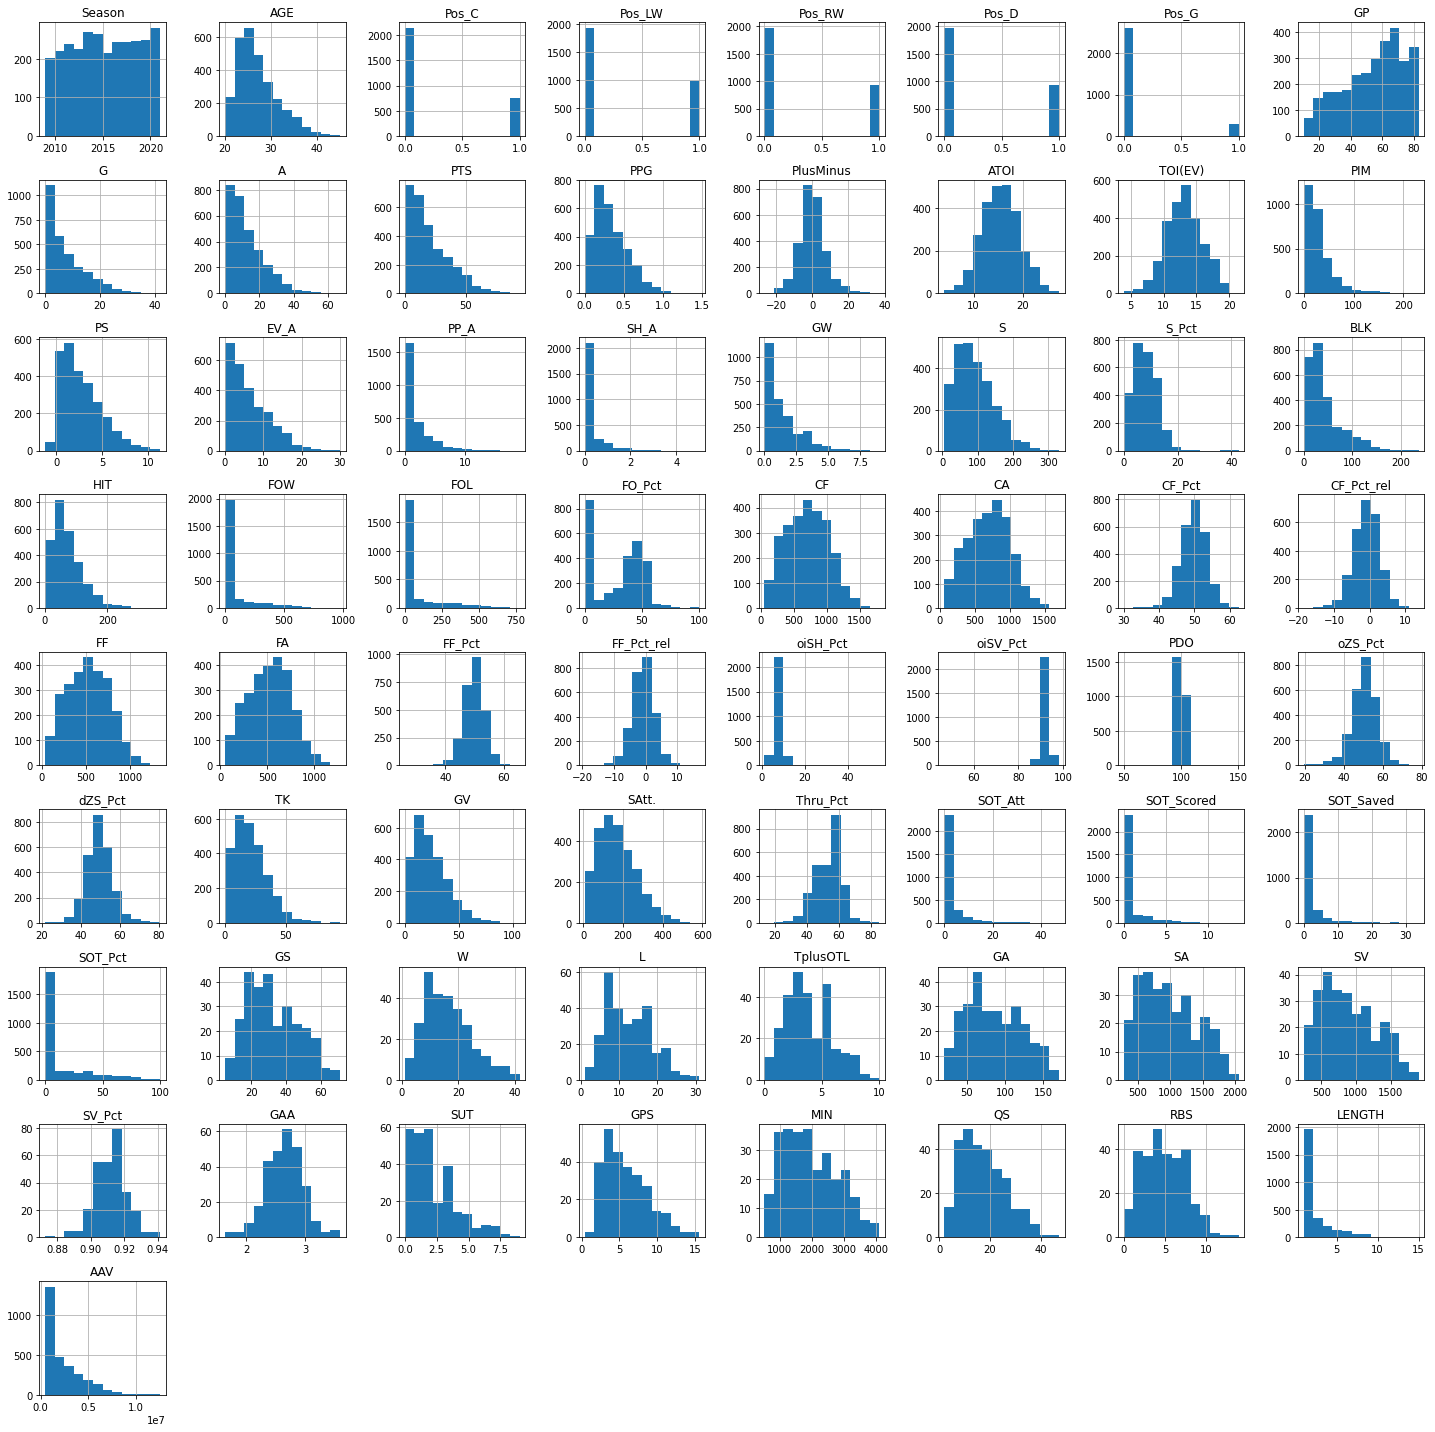

In [7]:
df.hist(bins=12, figsize=(20,20))
plt.tight_layout()

In [8]:
# create goalie df

gdf= df[df['Pos_G']==1]
gdf= gdf[['Player','Season','AGE','GP','GS', 'W', 'L', 'TplusOTL', 'GA','SA','SV', 'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'SOT_Att', 'SOT_Scored','SOT_Saved', 'SOT_Pct', 'PTS', 'TYPE', 'LENGTH', 'AAV']]
gdf= gdf.reset_index()
gdf= gdf.drop(columns= ['index', 'TYPE'])

<AxesSubplot:xlabel='AGE', ylabel='AAV'>

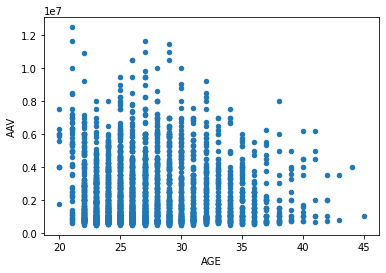

In [9]:
df.plot(kind='scatter', x='AGE', y='AAV', )

In [10]:
### to remove outliers, we want goalies who have played at minimum 10 games per year
### in doing this we only lose 16 data points, or 5% of our dataset

In [11]:
gdf

Player  Season   AGE         GP         GS     W          L  \
0       Thatcher Demko    2021  25.0  23.666667  22.666667  11.0  10.333333   
1    Jordan Binnington    2021  27.0  41.333333  40.333333  24.0  10.666667   
2       Cory Schneider    2021  34.0  26.000000  23.000000   6.0  13.000000   
3       Craig Anderson    2021  39.0  50.000000  47.000000  17.0  27.000000   
4      Anthony Stolarz    2021  27.0  13.000000   9.500000   4.0   4.000000   
..                 ...     ...   ...        ...        ...   ...        ...   
276     Craig Anderson    2009  28.0  31.000000  27.000000  15.0   7.000000   
277        Peter Budaj    2009  26.0  56.000000  55.000000  20.0  29.000000   
278  Curtis McElhinney    2009  26.0  14.000000   5.000000   1.0   6.000000   
279         Tim Thomas    2009  34.0  54.000000  53.000000  36.0  11.000000   
280   Niklas Backstrom    2009  31.0  71.000000  71.000000  37.0  24.000000   

     TplusOTL          GA           SA           SV    SV_Pct       GAA  \
0    1.333333   67.333333   758.000000   690.666667  0.911000  2.906667   
1    5.333333   97.666667  1145.666667  1048.000000  0.916333  2.366667   
2    4.000000   70.000000   718.000000   648.000000  0.903000  3.060000   
3    4.000000  163.000000  1676.000000  1513.000000  0.903000  3.510000   
4    1.500000   33.500000   366.500000   333.000000  0.913500  2.825000   
..        ...         ...          ...          ...       ...       ...   
276  5.000000   74.000000   977.000000   903.000000  0.924000  2.710000   
277  5.000000  154.000000  1531.000000  1377.000000  0.899000  2.860000   
278  1.000000   31.000000   280.000000   249.000000  0.889000  3.590000   
279  7.000000  114.000000  1694.000000  1580.000000  0.933000  2.100000   
280  8.000000  159.000000  2059.000000  1900.000000  0.923000  2.330000   

          SUT        GPS          MIN         QS        RBS    SOT_Att  \
0    0.333333   4.566667  1383.333333  13.333333   3.333333   8.333333   
1    2.666667   7.233333  2424.000000  23.000000   3.666667  12.000000   
2    1.000000   3.400000  1372.000000  10.000000   5.000000   9.000000   
3    2.000000   8.100000  2785.000000  19.000000   8.000000   2.000000   
4    1.000000   2.050000   666.500000   5.000000   1.500000   4.500000   
..        ...        ...          ...        ...        ...        ...   
276  3.000000   7.600000  1636.000000  16.000000   6.000000  11.000000   
277  2.000000   7.600000  3232.000000  27.000000  14.000000  35.000000   
278  0.000000   1.100000   518.000000   2.000000   2.000000   0.000000   
279  5.000000  14.700000  3259.000000  39.000000   3.000000  28.000000   
280  8.000000  15.600000  4088.000000  47.000000   9.000000  21.000000   

     SOT_Scored  SOT_Saved    SOT_Pct       PTS  LENGTH        AAV  
0      1.333333   7.000000  83.333333  0.333333       5  5000000.0  
1      3.333333   8.666667  73.633333  0.666667       6  6000000.0  
2      5.000000   4.000000  44.400000  0.000000       1   700000.0  
3      2.000000   0.000000   0.000000  2.000000       1   700000.0  
4      1.500000   3.000000  75.000000  0.500000       2   950000.0  
..          ...        ...        ...       ...     ...        ...  
276    7.000000   4.000000  36.400000  1.000000       2  1812500.0  
277   13.000000  22.000000  62.900000  1.000000       1  1250000.0  
278    0.000000   0.000000   0.000000  0.000000       2   535000.0  
279    9.000000  19.000000  67.900000  1.000000       4  5000000.0  
280    5.000000  16.000000  76.200000  0.000000       4  6000000.0  

[281 rows x 25 columns]

In [12]:
# create player df

pdf= df[df['Pos_G'] != 1]
pdf= pdf[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D', 'GP', 'G', 'A', 'PTS','PPG', 'PlusMinus', 'ATOI', 
          'TOI(EV)', 'PIM', 'PS', 'EV_A','PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'CF',
          'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA', "FF_Pct", 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct', 
          'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored', 'SOT_Saved', 'SOT_Pct', 'TYPE',
         'LENGTH', 'AAV']]
pdf= pdf.reset_index()
pdf= pdf.drop(columns=['index', 'TYPE'])

### filter for players with more than 10 games
pdf= pdf[pdf['GP']>10]

In [13]:
pdf

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  \
0          Wayne Simmonds    2021  32.0      0       1       1      0   
1     Ryan Nugent-Hopkins    2021  28.0      1       1       0      0   
2          Trent Frederic    2021  23.0      1       1       0      0   
3           Blake Lizotte    2021  23.0      1       0       0      0   
4              Matt Nieto    2021  28.0      0       1       1      0   
...                   ...     ...   ...    ...     ...     ...    ...   
2616        Andy McDonald    2009  31.0      1       0       0      0   
2617        George Parros    2009  29.0      0       0       1      0   
2618    Henrik Zetterberg    2009  28.0      1       0       0      0   
2619     Brendan Shanahan    2009  39.0      0       1       0      0   
2620         Jordan Staal    2009  20.0      1       1       0      0   

             GP          G          A        PTS       PPG  PlusMinus  \
0     61.666667  10.666667  10.666667  21.333333  0.345946 -13.333333   
1     66.333333  22.000000  33.000000  55.000000  0.829146  -5.333333   
2     19.666667   1.333333   0.333333   1.666667  0.084746  -4.333333   
3     35.666667   3.000000   8.000000  11.000000  0.308411  -1.000000   
4     54.000000   5.666667  11.333333  17.000000  0.314815   1.333333   
...         ...        ...        ...        ...       ...        ...   
2616  46.000000  15.000000  29.000000  44.000000  0.956522 -13.000000   
2617  74.000000   5.000000   5.000000  10.000000  0.135135   8.000000   
2618  77.000000  31.000000  42.000000  73.000000  0.948052  13.000000   
2619  34.000000   6.000000   8.000000  14.000000  0.411765  -2.000000   
2620  82.000000  22.000000  27.000000  49.000000  0.597561   5.000000   

           ATOI    TOI(EV)         PIM        PS       EV_A       PP_A  \
0     14.188889  12.458333   70.000000  1.166667   6.333333   4.333333   
1     20.444444  15.041667   27.000000  5.433333  13.666667   8.000000   
2      9.027778   7.691667   26.666667 -0.200000   1.333333   0.000000   
3     12.622222  11.516667   12.000000  0.700000   1.666667   0.666667   
4     13.755556  10.966667    6.000000  1.066667   4.666667   0.000000   
...         ...        ...         ...       ...        ...        ...   
2616  19.083333  14.700000   24.000000  4.400000   8.000000   6.000000   
2617   6.266667   6.183333  135.000000  1.000000   5.000000   0.000000   
2618  19.883333  14.316667   36.000000  8.100000  17.000000  12.000000   
2619  14.900000  10.883333   29.000000  1.100000   4.000000   2.000000   
2620  19.850000  13.950000   37.000000  4.500000  19.000000   2.000000   

          SH_A        GW           S      S_Pct        BLK         HIT  \
0     0.000000  1.000000  112.666667   9.600000  24.000000  115.333333   
1     0.333333  3.000000  171.666667  12.733333  37.666667   42.666667   
2     0.000000  1.000000   21.333333   3.033333   6.000000   29.000000   
3     0.666667  0.000000   43.333333   4.666667  14.666667   24.666667   
4     1.000000  1.333333   72.000000   8.400000  22.666667   37.333333   
...        ...       ...         ...        ...        ...         ...   
2616  1.000000  1.000000  128.000000  11.700000  18.000000   24.000000   
2617  0.000000  0.000000   47.000000  10.600000  14.000000   89.000000   
2618  2.000000  5.000000  309.000000  10.000000  31.000000   54.000000   
2619  0.000000  1.000000   77.000000   7.800000  21.000000   18.000000   
2620  1.000000  3.000000  166.000000  13.300000  55.000000  156.000000   

             FOW         FOL     FO_Pct           CF           CA  CF_Pct  \
0      13.000000   21.333333  37.566667   670.666667   716.333333    48.9   
1     219.000000  249.000000  47.133333   893.000000   966.333333    48.6   
2      26.000000   24.333333  34.500000   150.666667   171.333333    35.2   
3     165.333333  162.666667  50.333333   402.000000   348.333333    56.5   
4       5.000000    4.666667  50.000000   570.666667   568.333333    49.0   
...          ...         

In [14]:
df.AAV.describe()

count    2.902000e+03
mean     2.356751e+06
std      1.927268e+06
min      4.750000e+05
25%      8.505000e+05
50%      1.550000e+06
75%      3.350000e+06
max      1.250000e+07
Name: AAV, dtype: float64

array([[<AxesSubplot:title={'center':'LENGTH'}>,
        <AxesSubplot:title={'center':'AAV'}>]], dtype=object)

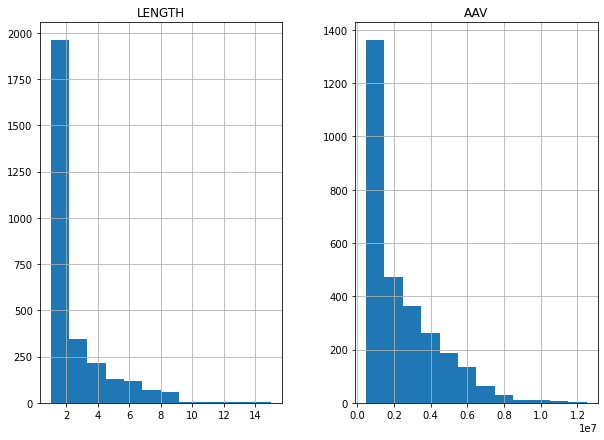

In [15]:
money= df[['LENGTH','AAV']]
money.hist(bins=12, figsize=(10,7))

In [16]:
pdf['PPG'] = pdf['PTS']/pdf['GP']

In [17]:
len(money[money['LENGTH']<5])/ len(money['LENGTH'])

0.8673328738800827

In [18]:
len(money[money['LENGTH']<=2])/ len(money['LENGTH'])

0.6750516884906961

87% of contracts are for less than 5 years. 1 and 2 year contracts comprise 68% of all contracts, with one year deals being the most common (138 more than 2 year deals)

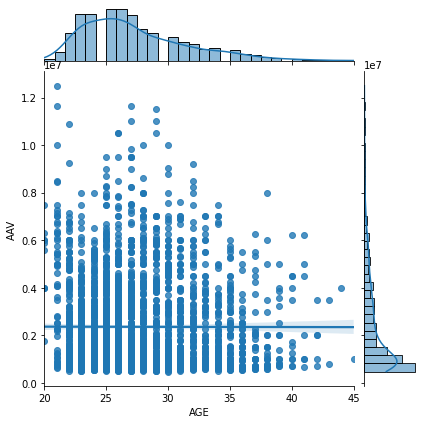

In [19]:
sns.jointplot(x='AGE', y='AAV', data=df, kind="reg")

While the data for individual players seems to fluctuate drastically, it is interesting to see almost no slope on the regression line and that the 'norm' for contracts is approximately $2 million. The distribution of ages makes sense, with the heavy left skew indicating that this is indeed a 'young man's game'

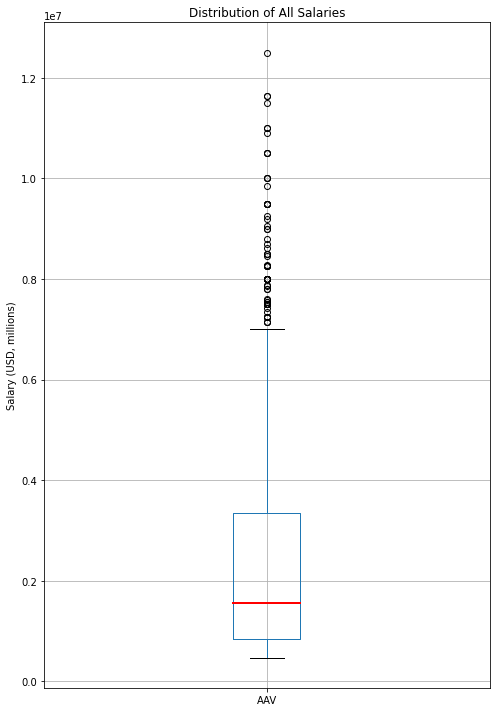

In [20]:
df.boxplot(column= 'AAV', figsize=(7,10), medianprops = dict(color="red",linewidth=2))
plt.title('Distribution of All Salaries')
plt.ylabel('Salary (USD, millions)')
plt.tight_layout()

WOW this is a very intriguing graphic. While it seems like the vast majority of players make between $ 1 and $ 3 million annually, the low median bar suggests that most actually make less than $2 million. This is especially fascinating to notice in spite of the large number of outliers at the high end of the salary spectrum. Marquee players will obviously be paid higher amounts of money, but it is worth investigating how much better they are in major statistical categories comparative to their peers.

In [21]:
q3, q1 = np.percentile(df.AAV, [75 ,25])
iqr = q3 - q1

upper_bound= q3 + 1.5*iqr
upper_bound

7099250.0

In [22]:
top_earners = df[df["AAV"] > upper_bound]
top_earners

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
122    Alex Pietrangelo    2020  30.0      0       0       0      1      0   
129         Taylor Hall    2020  28.0      0       1       0      0      0   
287   Nicklas Backstrom    2020  32.0      1       0       0      0      0   
295          Roman Josi    2019  30.0      0       0       0      1      0   
298       Nico Hischier    2019  21.0      1       0       0      0      0   
...                 ...     ...   ...    ...     ...     ...    ...    ...   
2190      Sidney Crosby    2012  25.0      1       0       0      0      0   
2349         Shea Weber    2011  25.0      0       0       0      1      0   
2366     Steven Stamkos    2011  21.0      1       0       1      0      0   
2900          Rick Nash    2009  26.0      0       1       1      0      0   
2937     Marian Gaborik    2009  27.0      0       0       1      0      0   

             GP          G          A        PTS       PPG  PlusMinus  \
122   73.000000  14.666667  34.333333  49.000000  0.671233   7.000000   
129   58.000000  22.000000  38.666667  60.666667  1.045977  -2.000000   
287   74.000000  18.333333  48.000000  66.333333  0.896396   2.000000   
295   76.333333  13.666667  39.000000  52.666667  0.689956  13.333333   
298   75.500000  18.500000  31.000000  49.500000  0.655629   5.000000   
...         ...        ...        ...        ...       ...        ...   
2190  48.000000  30.333333  40.333333  70.666667  1.472222  16.666667   
2349  80.333333  18.333333  29.666667  48.000000  0.597510   2.666667   
2366  81.000000  39.666667  37.666667  77.333333  0.954733  -4.000000   
2900  78.000000  40.000000  39.000000  79.000000  1.012821  11.000000   
2937  17.000000  13.000000  10.000000  23.000000  1.352941   3.000000   

           ATOI    TOI(EV)        PIM         PS       EV_A       PP_A  \
122   24.666667  19.494444  21.333333   8.733333  10.666667   4.000000   
129   19.333333  15.761111  28.000000   6.866667  15.666667   6.000000   
287   19.544444  15.155556  30.000000   6.033333  13.000000   5.333333   
295   24.900000  19.261111  28.000000   9.533333   8.333333   5.333333   
298   17.208333  13.975000  25.000000   5.350000  16.500000   2.000000   
...         ...        ...        ...        ...        ...        ...   
2190  20.777778  15.450000  38.666667   9.933333  21.000000   8.333333   
2349  24.150000  18.533333  57.333333   9.600000  10.000000   7.666667   
2366  18.561111  13.788889  50.333333   9.833333  22.666667  16.666667   
2900  21.166667  15.250000  52.000000  10.100000  29.000000   6.000000   
2937  20.000000  15.933333   2.000000   3.400000  10.000000   2.000000   

          SH_A        GW           S      S_Pct         BLK         HIT  \
122   0.000000  3.333333  203.000000   7.233333  130.666667   52.333333   
129   0.333333  3.666667  207.666667  10.200000   34.000000   47.000000   
287   0.000000  3.000000  155.333333  11.600000   42.000000   40.333333   
295   0.000000  2.666667  248.000000   5.500000  127.666667   62.333333   
298   0.000000  2.500000  170.000000  10.850000   41.500000   54.500000   
...        ...       ...         ...        ...         ...         ...   
2190  1.000000  4.000000  178.000000  15.900000   24.000000   34.666667   
2349  0.666667  3.333333  242.333333   7.566667  104.666667  189.333333   
2366  0.333333  4.666667  250.000000  15.466667   30.666667   75.666667   
2900  5.000000  5.000000  263.000000  15.200000   29.000000   71.000000   
2937  1.000000  2.000000   68.000000  19.100000    5.000000   15.000000   

             FOW         FOL     FO_Pct           CF           CA     CF_Pct  \
122     0.000000    0.333333   0.000000  1429.333333  1285.000000  52.733333   
129    39.333333   46.333333  44.200000   919.666667   879.000000  51.500000   
287   639.333333  646.666667  49.666667  1155.666667  1087.000000  51.733333   
295     0.000000    0.333333   0.000000  1580.000000  1430.333333  52.533333   
298   429.500

One of the most interesting things about this graphic is the seemingly copious amount of outliers for salary. Thus, we should calculate an Interquartile Range and determine what an constitutes an 'outlier'. Upon further inspection, we determined outliers to be players who earned more than $7.1 million annually. These 70 players make more than 97.5 percent of rest of the league. Later, we will inspect how much better they are statistically than other players.

In [23]:
1-(len(top_earners)/ (len(df)-90))

0.9751066856330014

In [24]:
top_forwards= top_earners.query('(Pos_C==1 or Pos_RW==1 or Pos_LW==1 and Pos_D==0 and Pos_G==0)')
other_forwards= df.query('(Pos_C==1 or Pos_RW==1 or Pos_LW==1 and Pos_D==0 and Pos_G==0 and AAV<=7099250.0)')

top_dmen= top_earners.query('(Pos_D==1 and Pos_RW==0 and Pos_LW==0 and Pos_C==0 and Pos_G==0)')
other_dmen= df.query('(Pos_D==1 and Pos_RW==0 and Pos_LW==0 and Pos_C==0 and Pos_G==0 and AAV<=7099250.0)')

top_goalies= top_earners.query('Pos_G==1')
other_goalies= df.query('Pos_G==1 and AAV<=7099250.0')

In [25]:
top_forwards

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
129          Taylor Hall    2020  28.0      0       1       0      0      0   
287    Nicklas Backstrom    2020  32.0      1       0       0      0      0   
298        Nico Hischier    2019  21.0      1       0       0      0      0   
303          Kyle Connor    2019  22.0      0       1       0      0      0   
304       Mikko Rantanen    2019  22.0      0       0       1      0      0   
317      Mitchell Marner    2019  22.0      0       0       1      0      0   
334       Clayton Keller    2019  21.0      0       1       1      0      0   
414        Sebastian Aho    2019  21.0      1       1       0      0      0   
444       Artemi Panarin    2019  27.0      0       1       0      0      0   
458         Matt Duchene    2019  28.0      1       1       0      0      0   
494          Kevin Hayes    2019  27.0      1       0       0      0      0   
501         Jeff Skinner    2019  27.0      0       1       1      0      0   
526           Mark Stone    2019  27.0      0       0       1      0      0   
537      Auston Matthews    2019  21.0      1       0       0      0      0   
571         Tyler Seguin    2018  27.0      1       0       1      0      0   
573        Blake Wheeler    2018  32.0      1       0       1      0      0   
586           Mark Stone    2018  26.0      0       0       1      0      0   
637      Nikita Kucherov    2018  26.0      0       0       1      0      0   
680         John Tavares    2018  27.0      1       0       0      0      0   
716        Logan Couture    2018  30.0      1       1       0      0      0   
818          Jack Eichel    2017  21.0      1       0       0      0      0   
840       Leon Draisaitl    2017  21.0      1       1       1      0      0   
851        Ryan Johansen    2017  24.0      1       0       1      0      0   
895       Connor McDavid    2017  21.0      1       0       0      0      0   
910     Evgeny Kuznetsov    2017  25.0      1       0       0      0      0   
911         Joe Thornton    2017  38.0      1       1       0      0      0   
1119          Jamie Benn    2016  27.0      1       1       0      0      0   
1234      Steven Stamkos    2016  26.0      1       0       1      0      0   
1307        Anze Kopitar    2016  28.0      1       0       0      0      0   
1349       Jakub Voracek    2015  25.0      0       1       1      0      0   
1396  Vladimir Tarasenko    2015  23.0      0       0       1      0      0   
1405       Ryan O'Reilly    2015  25.0      1       0       0      0      0   
1541        Jason Spezza    2014  32.0      1       0       1      0      0   
1558          Bobby Ryan    2014  28.0      0       1       1      0      0   
1569        David Krejci    2014  28.0      1       0       0      0      0   
1636        Patrick Kane    2014  26.0      0       0       1      0      0   
1637      Jonathan Toews    2014  26.0      1       0       0      0      0   
1974       Claude Giroux    2013  25.0      1       1       1      0      0   
1985       Evgeni Malkin    2013  27.0      1       0       0      0      0   
2009       Pavel Datsyuk    2013  34.0      1       1       0      0      0   
2055         Corey Perry    2013  28.0      0       0       1      0      0   
2059        Ryan Getzlaf    2013  27.0      1       0       0      0      0   
2176         Zach Parise    2012  27.0      0       1       0      0      0   
2190       Sidney Crosby    2012  25.0      1       0       0      0      0   
2366      Steven Stamkos    2011  21.0      1       0       1      0      0   
2900           Rick Nash    2009  26.0      0       1       1      0      0   
2937      Marian Gaborik    2009  27.0      0       0       1      0      0   

             GP          G          A        PTS       PPG  PlusMinus  \
129   58.000000  22.000000  38.666667  60.666667  1.045977  -2.000000   
287   74.000000  18.333333  48.000000  66.333333  0.896396   2.000000   
298   

In [26]:
top_forwards.describe()

Season        AGE      Pos_C     Pos_LW     Pos_RW  Pos_D  Pos_G  \
count    47.000000  47.000000  47.000000  47.000000  47.000000   47.0   47.0   
mean   2016.148936  26.063830   0.617021   0.361702   0.468085    0.0    0.0   
std       2.919043   3.709003   0.491369   0.485688   0.504375    0.0    0.0   
min    2009.000000  21.000000   0.000000   0.000000   0.000000    0.0    0.0   
25%    2014.000000  23.500000   0.000000   0.000000   0.000000    0.0    0.0   
50%    2017.000000  26.000000   1.000000   0.000000   0.000000    0.0    0.0   
75%    2019.000000  27.500000   1.000000   1.000000   1.000000    0.0    0.0   
max    2020.000000  38.000000   1.000000   1.000000   1.000000    0.0    0.0   

              GP          G          A        PTS        PPG  PlusMinus  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean   68.489362  24.407801  36.668440  61.076241   0.904586   4.913121   
std    12.057752   7.157629  10.068643  12.975926   0.172906   9.083898   
min    17.000000  12.333333  10.000000  23.000000   0.655629 -19.666667   
25%    63.583333  19.333333  29.291667  52.000000   0.757777  -0.500000   
50%    68.666667  23.000000  37.666667  60.666667   0.908696   5.666667   
75%    78.333333  27.666667  44.333333  70.166667   0.980293  10.333333   
max    81.666667  40.000000  56.000000  85.000000   1.472222  23.666667   

            ATOI    TOI(EV)         PIM         PS       EV_A       PP_A  \
count  47.000000  47.000000   47.000000  47.000000  47.000000  47.000000   
mean   18.957742  15.180201   30.507092   7.275887  17.359929   6.429078   
std     1.465668   0.910941   17.094330   1.813862   4.928783   3.034174   
min    15.400000  13.094444    2.000000   3.400000   9.000000   1.666667   
25%    17.809722  14.733333   19.750000   6.100000  13.666667   4.416667   
50%    19.344444  15.377778   28.000000   7.033333  16.666667   6.000000   
75%    20.004167  15.794444   37.500000   8.616667  20.833333   8.333333   
max    21.216667  16.800000  101.000000  11.233333  29.000000  16.666667   

            SH_A         GW           S      S_Pct        BLK         HIT  \
count  47.000000  47.000000   47.000000  47.000000  47.000000   47.000000   
mean    0.618794   3.955674  186.774823  12.922340  31.556738   50.093972   
std     0.868592   1.379177   48.821940   2.439265  13.792951   30.583430   
min     0.000000   1.666667   68.000000   5.933333   5.000000    7.666667   
25%     0.000000   3.000000  155.500000  11.033333  20.666667   29.833333   
50%     0.333333   3.750000  174.000000  12.866667  28.333333   43.333333   
75%     1.000000   4.666667  219.833333  14.350000  40.250000   61.833333   
max     5.000000   7.333333  304.666667  19.100000  60.666667  151.666667   

              FOW         FOL     FO_Pct           CF           CA     CF_Pct  \
count   47.000000   47.000000  47.000000    47.000000    47.000000  47.000000   
mean   303.900709  297.244681  44.685638  1071.517730   963.599291  52.503546   
std    269.701429  245.288556  11.415467   214.675168   192.996288   3.006318   
min      0.000000    1.000000   0.000000   213.000000   229.000000  44.100000   
25%     22.666667   29.000000  42.316667   925.500000   887.833333  50.883333   
50%    308.666667  338.333333  46.600000  1083.666667   983.666667  52.566667   
75%    508.000000  499.833333  52.716667  1232.833333  1103.666667  54.100000   
max    826.000000  748.666667  58.866667  1474.333333  1251.666667  58.366667   

       CF_Pct_rel           FF          FA     FF_Pct  FF_Pct_rel   oiSH_Pct  \
count   47.000000    47.000000   47.000000  47.000000   47.000000  47.000000   
mean     2.735638   799.345745  724.801418  52.325532    2.421277   9.936525   
std      2.715572   156.761049  148.168450   3.227265    2.867123   1.026000   
min     -2.700000   166.000000  171.000000  40.466667   -6.133333   7.933333   
25%      0.750000   692.333333  644.166667  50.700000    0.333333   9.350000   
50%      2.800000   810.00

In [27]:
other_forwards.describe()

Season          AGE        Pos_C       Pos_LW       Pos_RW  \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean   2014.693757    26.959953     0.446408     0.564193     0.546525   
std       3.465186     4.178069     0.497266     0.496008     0.497977   
min    2009.000000    20.000000     0.000000     0.000000     0.000000   
25%    2012.000000    24.000000     0.000000     0.000000     0.000000   
50%    2015.000000    26.000000     0.000000     1.000000     1.000000   
75%    2018.000000    29.000000     1.000000     1.000000     1.000000   
max    2021.000000    45.000000     1.000000     1.000000     1.000000   

             Pos_D   Pos_G           GP            G            A  \
count  1698.000000  1698.0  1698.000000  1698.000000  1698.000000   
mean      0.004122     0.0    57.743424    10.907146    14.749460   
std       0.064093     0.0    17.978606     7.498367    10.627747   
min       0.000000     0.0    10.333333     0.000000     0.000000   
25%       0.000000     0.0    46.541667     5.000000     6.666667   
50%       0.000000     0.0    61.666667     9.583333    12.166667   
75%       0.000000     0.0    72.000000    15.500000    21.333333   
max       1.000000     0.0    82.000000    42.000000    67.000000   

               PTS          PPG    PlusMinus         ATOI      TOI(EV)  \
count  1698.000000  1698.000000  1698.000000  1698.000000  1697.000000   
mean     25.656606     0.416668    -0.481792    13.968404    11.808450   
std      17.317925     0.214591     7.153692     3.114259     2.092794   
min       1.000000     0.035714   -24.000000     4.016667     4.000000   
25%      12.000000     0.251691    -4.666667    11.822917    10.483333   
50%      22.000000     0.377660    -1.000000    13.950000    11.950000   
75%      37.000000     0.552474     3.000000    16.279167    13.333333   
max      94.500000     1.472222    37.000000    21.916667    16.655556   

               PIM           PS         EV_A         PP_A         SH_A  \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean     34.166961     2.518002     8.371270     2.180408     0.355467   
std      30.699818     2.224632     5.206213     2.698034     0.589364   
min       0.000000    -1.200000     0.000000     0.000000     0.000000   
25%      14.333333     0.754167     4.333333     0.000000     0.000000   
50%      25.666667     1.900000     7.666667     1.000000     0.000000   
75%      42.916667     3.833333    11.666667     3.333333     0.500000   
max     230.500000    11.233333    30.000000    19.000000     5.000000   

                GW            S        S_Pct          BLK          HIT  \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean      1.706861   102.369503     9.984197    25.331567    70.990332   
std       1.429722    56.035197     4.147653    14.304799    48.489039   
min       0.000000     5.000000     0.000000     0.000000     1.000000   
25%       0.666667    60.083333     7.308333    14.666667    35.375000   
50%       1.333333    96.000000     9.900000    23.333333    61.000000   
75%       2.333333   139.000000    12.262500    34.000000    93.666667   
max       9.000000   330.500000    42.733333    89.000000   368.666667   

               FOW          FOL       FO_Pct           CF           CA  \
count  1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean    128.181782   130.509128    40.353205   652.301629   645.608166   
std     183.723680   173.467704    14.565931   289.556783   263.588565   
min       0.000000     0.000000     0.000000    51.333333    64.000000   
25%       4.333333     7.333333    33.675000   429.375000   447.750000   
50%      26.333333    33.333333    43.766667   655.000000   669.500000   
75%     204.916667   212.500000    50.000000   878.250000   848.250000   
max     971.666667   776.333333   100.000000  1464.500000  1251.666667   

            CF_Pct   CF_Pct_rel           FF           

In [28]:
other_forwards[other_forwards['G']==42]

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G    GP  \
2587  Ilya Kovalchuk    2010  27.0      0       1       1      0      0  77.5   

         G     A   PTS       PPG  PlusMinus       ATOI    TOI(EV)   PIM  \
2587  42.0  46.0  88.0  1.135484       -1.0  21.916667  16.091667  51.5   

         PS  EV_A  PP_A  SH_A   GW      S  S_Pct   BLK   HIT  FOW   FOL  \
2587  10.65  30.0  12.0   0.0  5.0  282.5  14.85  17.5  36.5  6.0  16.0   

      FO_Pct      CF      CA  CF_Pct  CF_Pct_rel     FF     FA  FF_Pct  \
2587    29.5  1088.5  1142.5   48.85       -1.05  821.5  885.0    48.2   

      FF_Pct_rel  oiSH_Pct  oiSV_Pct    PDO  oZS_Pct  dZS_Pct    TK    GV  \
2587       -2.35     11.75     90.25  102.0     48.8     51.2  41.0  80.0   

      SAtt.  Thru_Pct  SOT_Att  SOT_Scored  SOT_Saved  SOT_Pct  GS   W   L  \
2587  533.5     52.85      6.5         1.5        5.0     22.5 NaN NaN NaN   

      TplusOTL  GA  SA  SV  SV_Pct  GAA  SUT  GPS  MIN  QS  RBS      TYPE  \
2587       NaN NaN NaN NaN     NaN  NaN  NaN  NaN  NaN NaN  NaN  Standard   

      LENGTH        AAV  
2587      15  6666666.0

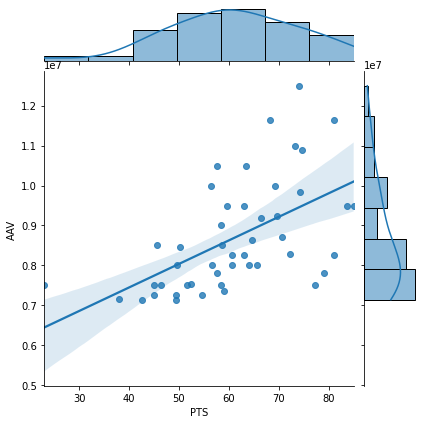

In [29]:
sns.jointplot(x='PTS', y='AAV', data=top_forwards, kind="reg");

In [30]:
from scipy.stats import linregress
linregress(top_forwards['PTS'], top_forwards['AAV'])

LinregressResult(slope=58956.81522316535, intercept=5090001.741148268, rvalue=0.5574256089234816, pvalue=4.699057716705223e-05, stderr=13089.939449351074)

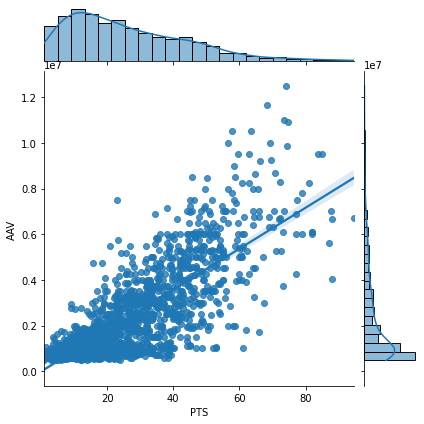

In [31]:
sns.jointplot(x='PTS', y="AAV", data=other_forwards, kind='reg');

In [32]:
linregress(other_forwards['PTS'], other_forwards['AAV'])

LinregressResult(slope=89709.25250304655, intercept=-15736.59394828137, rvalue=0.797680366917599, pvalue=0.0, stderr=1646.9130202456463)

In [33]:
top_dmen

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
122       Alex Pietrangelo    2020  30.0      0       0       0      1      0   
295             Roman Josi    2019  30.0      0       0       0      1      0   
310          Thomas Chabot    2019  23.0      0       0       0      1      0   
316         Jared Spurgeon    2019  30.0      0       0       0      1      0   
373           Jacob Trouba    2019  25.0      0       0       0      1      0   
497          Erik Karlsson    2019  29.0      0       0       0      1      0   
691           Drew Doughty    2018  29.0      0       0       0      1      0   
717   Oliver Ekman-Larsson    2018  27.0      0       0       0      1      0   
752           John Carlson    2018  28.0      0       0       0      1      0   
1062           Brent Burns    2016  32.0      0       0       0      1      0   
1187         Victor Hedman    2016  25.0      0       0       0      1      0   
1190          Aaron Ekblad    2016  20.0      0       0       0      1      0   
1303      Dustin Byfuglien    2016  31.0      0       0       0      1      0   
1583           P.K. Subban    2014  25.0      0       0       0      1      0   
1986           Kris Letang    2013  27.0      0       0       0      1      0   
2121            Shea Weber    2012  26.0      0       0       0      1      0   
2175            Ryan Suter    2012  27.0      0       0       0      1      0   
2349            Shea Weber    2011  25.0      0       0       0      1      0   

             GP          G          A        PTS       PPG  PlusMinus  \
122   73.000000  14.666667  34.333333  49.000000  0.671233   7.000000   
295   76.333333  13.666667  39.000000  52.666667  0.689956  13.333333   
310   44.666667   7.666667  19.000000  26.666667  0.597015  -8.666667   
316   73.000000  11.000000  28.333333  39.333333  0.538813   8.666667   
373   65.666667   6.333333  29.333333  35.666667  0.543147   7.000000   
497   67.000000   9.666667  49.666667  59.333333  0.885572  -3.000000   
691   82.000000  12.000000  39.666667  51.666667  0.630081  18.333333   
717   78.666667  15.666667  29.666667  45.333333  0.576271 -19.666667   
752   70.000000  10.666667  37.333333  48.000000  0.685714   7.666667   
1062  77.666667  22.000000  39.000000  61.000000  0.785408   4.000000   
1187  70.666667  11.000000  35.666667  46.666667  0.660377  12.666667   
1190  79.500000  13.500000  24.000000  37.500000  0.471698  15.000000   
1303  76.000000  19.000000  32.333333  51.333333  0.675439  -3.666667   
1583  68.333333   9.333333  33.000000  42.333333  0.619512   5.666667   
1986  56.000000   7.666667  35.666667  43.333333  0.773810  17.333333   
2121  79.333333  17.000000  29.666667  46.666667  0.588235   9.333333   
2175  77.000000   5.000000  35.666667  40.666667  0.528139  13.000000   
2349  80.333333  18.333333  29.666667  48.000000  0.597510   2.666667   

           ATOI    TOI(EV)         PIM         PS       EV_A      PP_A  \
122   24.666667  19.494444   21.333333   8.733333  10.666667  4.000000   
295   24.900000  19.261111   28.000000   9.533333   8.333333  5.333333   
310   16.316667  14.400000   15.333333   3.633333   7.000000  0.333333   
316   24.244444  19.266667   16.000000   7.700000   8.333333  2.666667   
373   23.250000  18.822222   48.666667   5.666667   4.333333  1.666667   
497   26.016667  20.727778   28.666667   8.700000   6.666667  3.000000   
691   27.333333  21.400000   50.666667  11.266667   5.666667  5.666667   
717   24.355556  18.983333   62.666667   7.066667   7.000000  8.666667   
752   23.733333  17.905556   18.666667   8.000000   7.666667  3.000000   
1062  22.211111  17.516667   50.666667   9.766667  16.333333  5.333333   
1187  22.727778  17.977778   46.333333   8.700000   8.666667  2.333333   
1190  21.750000  18.316667   36.500000   8.350000   9.000000  4.500000   
1303  23.655556  18.444444  109.666667   8.933333  13.333333  5.333333   
1583  24.055556  18.172222   85.666667   8.100000   4.00

In [34]:
top_dmen.describe()

Season        AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G         GP  \
count    18.000000  18.000000   18.0    18.0    18.0   18.0   18.0  18.000000   
mean   2016.388889  27.166667    0.0     0.0     0.0    1.0    0.0  71.953704   
std       2.872566   3.053445    0.0     0.0     0.0    0.0    0.0   9.409668   
min    2011.000000  20.000000    0.0     0.0     0.0    1.0    0.0  44.666667   
25%    2014.500000  25.000000    0.0     0.0     0.0    1.0    0.0  68.750000   
50%    2017.000000  27.000000    0.0     0.0     0.0    1.0    0.0  74.500000   
75%    2019.000000  29.750000    0.0     0.0     0.0    1.0    0.0  78.416667   
max    2020.000000  32.000000    0.0     0.0     0.0    1.0    0.0  82.000000   

               G          A        PTS        PPG  PlusMinus       ATOI  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean   12.453704  33.388889  45.842593   0.639885   5.925926  23.795062   
std     4.671498   6.770997   8.302782   0.102313   9.686967   2.282123   
min     5.000000  19.000000  26.666667   0.471698 -19.666667  16.316667   
25%     9.416667  29.666667  41.083333   0.579262   3.000000  23.351389   
50%    11.500000  33.666667  46.666667   0.624797   7.333333  24.197222   
75%    15.416667  36.916667  50.750000   0.683145  12.916667  24.870833   
max    22.000000  49.666667  61.000000   0.885572  18.333333  27.333333   

         TOI(EV)         PIM         PS       EV_A       PP_A       SH_A  \
count  18.000000   18.000000  18.000000  18.000000  18.000000  18.000000   
mean   18.701852   45.212963   8.326852   7.907407   4.305556   0.240741   
std     1.448406   24.241689   1.687624   3.354454   2.269613   0.298264   
min    14.400000   15.333333   3.633333   2.666667   0.333333   0.000000   
25%    18.208333   28.166667   8.016667   5.916667   2.750000   0.000000   
50%    18.677778   46.166667   8.525000   8.000000   4.250000   0.166667   
75%    19.333333   50.666667   9.383333   8.916667   5.333333   0.333333   
max    21.400000  109.666667  11.266667  16.333333   8.666667   1.000000   

              GW           S      S_Pct         BLK         HIT        FOW  \
count  18.000000   18.000000  18.000000   18.000000   18.000000  18.000000   
mean    2.388889  187.851852   6.452778  105.898148  101.703704   1.222222   
std     1.156115   48.170886   1.399583   23.878857   52.753328   4.854753   
min     0.333333   93.333333   3.966667   58.666667   38.666667   0.000000   
25%     1.333333  155.666667   5.541667   87.416667   57.833333   0.000000   
50%     2.666667  186.000000   6.716667  109.333333   97.500000   0.000000   
75%     3.333333  227.250000   7.629167  128.666667  130.250000   0.250000   
max     4.000000  281.000000   8.133333  137.333333  213.000000  20.666667   

             FOL     FO_Pct           CF           CA     CF_Pct  CF_Pct_rel  \
count  18.000000  18.000000    18.000000    18.000000  18.000000   18.000000   
mean    1.574074   9.196296  1345.703704  1234.555556  52.086111    2.820370   
std     5.447078  16.227733   209.313409   167.842752   2.276121    1.704095   
min     0.000000   0.000000   815.666667   857.666667  46.900000   -1.400000   
25%     0.000000   0.000000  1234.000000  1165.750000  50.941667    1.908333   
50%     0.333333   0.000000  1382.333333  1276.500000  52.450000    2.983333   
75%     0.333333  12.500000  1424.750000  1317.666667  53.433333    3.975000   
max    23.333333  48.866667  1792.000000  1444.666667  55.500000    5.666667   

                FF           FA     FF_Pct  FF_Pct_rel   oiSH_Pct   oiSV_Pct  \
count    18.000000    18.000000  18.000000   18.000000  18.000000  18.000000   
mean   1004.574074   928.657407  51.970370    2.336111   8.983333  90.923148   
std     157.884702   135.082043   2.263865    1.723447   0.853310   1.860346   
min     597.666667   631.666667  47.166667   -1.533333   6.500000  84.466667   
25%     915.250000   889.125000  50.766667    1.500000   8.641667  90.383333   
50%    1042.66666

In [35]:
other_dmen.describe()

Season         AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
count   891.000000  891.000000  891.0   891.0   891.0  891.0  891.0   
mean   2014.631874   27.359147    0.0     0.0     0.0    1.0    0.0   
std       3.452284    4.203940    0.0     0.0     0.0    0.0    0.0   
min    2009.000000   20.000000    0.0     0.0     0.0    1.0    0.0   
25%    2012.000000   24.000000    0.0     0.0     0.0    1.0    0.0   
50%    2014.000000   26.000000    0.0     0.0     0.0    1.0    0.0   
75%    2018.000000   30.000000    0.0     0.0     0.0    1.0    0.0   
max    2021.000000   43.000000    0.0     0.0     0.0    1.0    0.0   

               GP           G           A         PTS         PPG   PlusMinus  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean    53.609615    3.426861   12.026188   15.453049    0.270867    0.698653   
std     18.116343    2.832074    8.230125   10.587240    0.132855    7.689143   
min     10.333333    0.000000    0.500000    0.666667    0.038462  -26.500000   
25%     40.666667    1.333333    6.000000    7.416667    0.176263   -4.000000   
50%     56.333333    2.666667   10.000000   12.666667    0.236842    0.333333   
75%     68.333333    4.666667   16.333333   21.000000    0.338761    5.166667   
max     83.000000   17.333333   45.000000   59.000000    0.800995   33.000000   

             ATOI     TOI(EV)         PIM          PS        EV_A        PP_A  \
count  891.000000  890.000000  891.000000  891.000000  891.000000  891.000000   
mean    18.302351   15.583596   31.719042    3.042929    2.512720    0.855780   
std      3.013841    1.936570   22.360945    1.903955    1.810057    1.431541   
min      9.727778    9.322222    0.000000   -0.300000    0.000000    0.000000   
25%     15.980556   14.133333   15.500000    1.650000    1.000000    0.000000   
50%     18.188889   15.663889   26.666667    2.733333    2.000000    0.000000   
75%     20.555556   17.050000   41.333333    4.116667    3.500000    1.000000   
max     26.983333   20.000000  196.000000   10.950000   11.666667    9.000000   

             SH_A          GW           S       S_Pct         BLK         HIT  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.058361    0.579686   70.798167    4.411354   75.703891   74.008230   
std      0.161410    0.705833   40.996973    2.541735   39.004802   46.586291   
min      0.000000    0.000000    5.666667    0.000000    7.500000    2.500000   
25%      0.000000    0.000000   39.416667    2.741667   46.000000   39.666667   
50%      0.000000    0.333333   62.500000    4.166667   72.666667   61.000000   
75%      0.000000    1.000000   95.416667    5.933333  101.000000  100.000000   
max      1.000000    4.333333  253.333333   20.950000  237.000000  289.333333   

              FOW         FOL      FO_Pct           CF           CA  \
count  891.000000  891.000000  891.000000   891.000000   891.000000   
mean     0.615788    0.793303    4.800224   791.796670   794.811448   
std     12.015412   14.636216   13.407350   329.317107   326.263906   
min      0.000000    0.000000    0.000000   112.500000   112.500000   
25%      0.000000    0.000000    0.000000   524.500000   541.166667   
50%      0.000000    0.000000    0.000000   800.000000   811.000000   
75%      0.000000    0.000000    0.000000  1040.000000  1042.333333   
max    306.000000  373.000000  100.000000  1614.000000  1703.666667   

           CF_Pct  CF_Pct_rel           FF           FA      FF_Pct  \
count  891.000000  891.000000   891.000000   891.000000  891.000000   
mean    49.809353   -0.921399   591.002245   593.041900   49.799963   
std      3.191789    3.221199   247.242223   243.693041    3.137808   
min     37.500000  -15.100000    84.000000    83.000000   38.166667   
25%     47.816667   -3.183333   392.333333   397.166667   47.666667   
50%     49.833333   -0.900000   601.000000   600.666667   49.800000   
75%     51.950000    1.166667   780.666667   

In [36]:
## t test
# xbar sample mean,  s sample std, n sample size
# xbar +/- t*(s/sqrt(n))

In [37]:
top_goalies

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
354   Andrei Vasilevskiy    2019  25.0      0       0       0      0      1   
469     Sergei Bobrovsky    2019  30.0      0       0       0      0      1   
909          Carey Price    2017  29.0      0       0       0      0      1   
1533    Sergei Bobrovsky    2015  26.0      0       0       0      0      1   
1807    Henrik Lundqvist    2013  32.0      0       0       0      0      1   

             GP    G         A       PTS       PPG  PlusMinus  ATOI  TOI(EV)  \
354   56.000000  0.0  2.333333  2.333333  0.041667        NaN   NaN      NaN   
469   63.333333  0.0  1.000000  1.000000  0.015789        NaN   NaN      NaN   
909   64.666667  0.0  1.000000  1.000000  0.015464        NaN   NaN      NaN   
1533  49.500000  0.0  1.250000  1.250000  0.025253        NaN   NaN      NaN   
1807  57.666667  0.0  2.333333  2.333333  0.040462        NaN   NaN      NaN   

           PIM  PS  EV_A  PP_A  SH_A  GW   S  S_Pct  BLK  HIT  FOW  FOL  \
354   7.333333 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
469   3.333333 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
909   4.000000 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
1533  2.500000 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
1807  3.333333 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   

      FO_Pct  CF  CA  CF_Pct  CF_Pct_rel  FF  FA  FF_Pct  FF_Pct_rel  \
354      NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
469      NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
909      NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
1533     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
1807     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   

      oiSH_Pct  oiSV_Pct  PDO  oZS_Pct  dZS_Pct  TK  GV  SAtt.  Thru_Pct  \
354        NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
469        NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
909        NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
1533       NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
1807       NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   

        SOT_Att  SOT_Scored  SOT_Saved    SOT_Pct         GS          W  \
354   15.000000    2.333333  12.666667  84.133333  54.666667  35.333333   
469   15.000000    4.000000  11.000000  77.133333  63.000000  38.333333   
909   18.333333    3.666667  14.666667  78.766667  64.666667  41.666667   
1533  28.250000    4.750000  23.500000  81.050000  48.000000  28.250000   
1807  32.000000    6.666667  25.333333  77.600000  57.333333  33.000000   

              L  TplusOTL          GA           SA           SV    SV_Pct  \
354   14.666667  4.666667  139.333333  1756.000000  1616.666667  0.920667   
469   21.000000  4.000000  146.000000  1867.666667  1721.666667  0.921667   
909   17.333333  5.666667  132.666667  1900.000000  1767.333333  0.929667   
1533  16.250000  4.250000  118.250000  1511.750000  1393.500000  0.922750   
1807  20.333333  4.333333  121.000000  1636.000000  1515.000000  0.926333   

           GAA       SUT        GPS          MIN         QS       RBS  \
354   2.543333  5.333333  11.633333  3286.666667  31.666667  6.666667   
469   2.353333  7.000000  12.733333  3725.333333  36.666667  9.333333   
909   2.050000  7.000000  15.000000  3887.333333  38.666667  6.666667   
1533  2.435000  3.250000  10.525000  2876.500000  28.250000  3.750000   
1807  2.100000  7.000000  12.466667  3445.333333  35.000000  4.333333   

          TYPE  LENGTH         AAV  
354   Standard       8   9500000.0  
469   Standard       7  10000000.0  
909   Standard       8  10500000.0  
1533  Standard       4   7425000.0  
1807  Standard       7   8500000.0

In [38]:
top_goalies.describe()

Season        AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G         GP  \
count     5.000000   5.000000    5.0     5.0     5.0    5.0    5.0   5.000000   
mean   2016.600000  28.400000    0.0     0.0     0.0    0.0    1.0  58.233333   
std       2.607681   2.880972    0.0     0.0     0.0    0.0    0.0   6.102823   
min    2013.000000  25.000000    0.0     0.0     0.0    0.0    1.0  49.500000   
25%    2015.000000  26.000000    0.0     0.0     0.0    0.0    1.0  56.000000   
50%    2017.000000  29.000000    0.0     0.0     0.0    0.0    1.0  57.666667   
75%    2019.000000  30.000000    0.0     0.0     0.0    0.0    1.0  63.333333   
max    2019.000000  32.000000    0.0     0.0     0.0    0.0    1.0  64.666667   

         G         A       PTS       PPG  PlusMinus  ATOI  TOI(EV)       PIM  \
count  5.0  5.000000  5.000000  5.000000        0.0   0.0      0.0  5.000000   
mean   0.0  1.583333  1.583333  0.027727        NaN   NaN      NaN  4.100000   
std    0.0  0.692219  0.692219  0.012802        NaN   NaN      NaN  1.884144   
min    0.0  1.000000  1.000000  0.015464        NaN   NaN      NaN  2.500000   
25%    0.0  1.000000  1.000000  0.015789        NaN   NaN      NaN  3.333333   
50%    0.0  1.250000  1.250000  0.025253        NaN   NaN      NaN  3.333333   
75%    0.0  2.333333  2.333333  0.040462        NaN   NaN      NaN  4.000000   
max    0.0  2.333333  2.333333  0.041667        NaN   NaN      NaN  7.333333   

        PS  EV_A  PP_A  SH_A   GW    S  S_Pct  BLK  HIT  FOW  FOL  FO_Pct  \
count  0.0   0.0   0.0   0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0     0.0   
mean   NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
std    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
min    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
25%    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
50%    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
75%    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   
max    NaN   NaN   NaN   NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN     NaN   

        CF   CA  CF_Pct  CF_Pct_rel   FF   FA  FF_Pct  FF_Pct_rel  oiSH_Pct  \
count  0.0  0.0     0.0         0.0  0.0  0.0     0.0         0.0       0.0   
mean   NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
std    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
min    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
25%    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
50%    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
75%    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   
max    NaN  NaN     NaN         NaN  NaN  NaN     NaN         NaN       NaN   

       oiSV_Pct  PDO  oZS_Pct  dZS_Pct   TK   GV  SAtt.  Thru_Pct    SOT_Att  \
count       0.0  0.0      0.0      0.0  0.0  0.0    0.0       0.0   5.000000   
mean        NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  21.716667   
std         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN   7.907363   
min         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  15.000000   
25%         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  15.000000   
50%         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  18.333333   
75%         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  28.250000   
max         NaN  NaN      NaN      NaN  NaN  NaN    NaN       NaN  32.000000   

       SOT_Scored  SOT_Saved    SOT_Pct         GS          W          L  \
count    5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   
mean     4.283333  17.433333  79.736667  57.533333  35.316667  17.916667   
std      1.593825   6.537924   2.887002   6.706547   5.116830   2.693872   
min      2.333333  11.000000  77.133333  48.000000  28.250000  14.666667   
25%      3.666667  12.666667  77.600000  54.666667  33

## GOALIES

In [39]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      281 non-null    object 
 1   Season      281 non-null    int64  
 2   AGE         281 non-null    float64
 3   GP          281 non-null    float64
 4   GS          281 non-null    float64
 5   W           281 non-null    float64
 6   L           281 non-null    float64
 7   TplusOTL    281 non-null    float64
 8   GA          281 non-null    float64
 9   SA          281 non-null    float64
 10  SV          281 non-null    float64
 11  SV_Pct      281 non-null    float64
 12  GAA         281 non-null    float64
 13  SUT         281 non-null    float64
 14  GPS         281 non-null    float64
 15  MIN         281 non-null    float64
 16  QS          281 non-null    float64
 17  RBS         281 non-null    float64
 18  SOT_Att     281 non-null    float64
 19  SOT_Scored  281 non-null    f

In [40]:
gdf.describe()

Season         AGE          GP          GS           W  \
count   281.000000  281.000000  281.000000  281.000000  281.000000   
mean   2014.932384   28.918149   34.922598   32.146204   16.182681   
std       3.468077    3.955610   13.978094   14.641669    8.403263   
min    2009.000000   22.000000   11.000000    5.000000    1.000000   
25%    2012.000000   26.000000   23.500000   19.500000    9.666667   
50%    2015.000000   28.000000   33.500000   30.000000   15.000000   
75%    2018.000000   31.000000   45.333333   43.333333   21.333333   
max    2021.000000   42.000000   71.000000   71.000000   41.666667   

                L    TplusOTL          GA           SA           SV  \
count  281.000000  281.000000  281.000000   281.000000   281.000000   
mean    12.295077    3.821767   85.644721   986.156880   900.512159   
std      5.873353    1.987508   35.754279   426.725452   391.955994   
min      1.000000    0.000000   20.500000   280.000000   249.000000   
25%      7.000000    2.000000   57.500000   629.666667   570.666667   
50%     11.500000    3.666667   81.500000   921.000000   836.333333   
75%     16.333333    5.000000  114.333333  1283.000000  1171.000000   
max     31.000000   10.000000  170.333333  2059.000000  1900.000000   

           SV_Pct         GAA         SUT         GPS          MIN  \
count  281.000000  281.000000  281.000000  281.000000   281.000000   
mean     0.912007    2.648022    2.193654    5.936892  1956.449288   
std      0.009799    0.314765    1.794430    2.993890   835.224568   
min      0.873000    1.640000    0.000000    0.400000   518.000000   
25%      0.905500    2.432500    1.000000    3.500000  1274.666667   
50%      0.912667    2.640000    1.666667    5.300000  1825.333333   
75%      0.917667    2.860000    3.000000    7.900000  2574.500000   
max      0.941333    3.590000    9.000000   15.600000  4088.000000   

               QS         RBS     SOT_Att  SOT_Scored   SOT_Saved     SOT_Pct  \
count  281.000000  281.000000  281.000000  281.000000  281.000000  281.000000   
mean    17.360320    4.862396   13.386714    4.247628    9.139087   62.202046   
std      8.635474    2.527251    8.231338    2.752154    6.014785   18.178464   
min      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     10.500000    3.000000    7.333333    2.333333    4.666667   50.000000   
50%     16.000000    4.666667   12.000000    4.000000    8.000000   65.900000   
75%     23.333333    6.666667   18.000000    6.000000   12.000000   75.000000   
max     47.000000   14.000000   47.333333   13.666667   33.666667  100.000000   

              PTS      LENGTH           AAV  
count  281.000000  281.000000  2.810000e+02  
mean     0.717675    2.380783  2.538326e+06  
std      0.741866    1.744641  1.904610e+06  
min      0.000000    1.000000  5.000000e+05  
25%      0.000000    1.000000  1.050000e+06  
50%      0.500000    2.000000  1.850000e+06  
75%      1.000000    3.000000  3.666667e+06  
max      4.000000   12.000000  1.050000e+07

In [41]:
#gdf.isnull().sum()

In [42]:
gdf.corr()

Season       AGE        GP        GS         W         L  \
Season      1.000000  0.100086 -0.002343 -0.002993 -0.014035 -0.009508   
AGE         0.100086  1.000000  0.232013  0.223285  0.188406  0.211300   
GP         -0.002343  0.232013  1.000000  0.994667  0.914548  0.854979   
GS         -0.002993  0.223285  0.994667  1.000000  0.924561  0.848571   
W          -0.014035  0.188406  0.914548  0.924561  1.000000  0.606740   
L          -0.009508  0.211300  0.854979  0.848571  0.606740  1.000000   
TplusOTL    0.045741  0.215168  0.731732  0.726173  0.600794  0.576667   
GA          0.033274  0.223007  0.966948  0.962910  0.827053  0.908060   
SA          0.027478  0.217415  0.985477  0.985324  0.891634  0.865488   
SV          0.026880  0.216359  0.984692  0.984893  0.895285  0.859429   
SV_Pct      0.059198 -0.016471  0.151856  0.166355  0.290758 -0.046606   
GAA         0.071417  0.000924 -0.091149 -0.110686 -0.311623  0.194564   
SUT        -0.098701  0.121028  0.717329  0.720951  0.785864  0.451775   
GPS        -0.044165  0.185324  0.927011  0.932694  0.905860  0.734866   
MIN        -0.008744  0.226703  0.996554  0.997480  0.927730  0.843251   
QS         -0.042373  0.200661  0.955320  0.965619  0.945987  0.746820   
RBS        -0.042628  0.152043  0.785568  0.785545  0.644927  0.778352   
SOT_Att    -0.221334  0.056615  0.674509  0.679373  0.647535  0.518009   
SOT_Scored -0.226801  0.102611  0.588070  0.590900  0.507494  0.480167   
SOT_Saved  -0.199123  0.030527  0.653998  0.659359  0.653952  0.489197   
SOT_Pct     0.163525 -0.031402  0.240863  0.235825  0.275701  0.148032   
PTS        -0.032664  0.219176  0.512253  0.519545  0.508488  0.411842   
LENGTH     -0.060068 -0.149687  0.419107  0.431079  0.533709  0.190189   
AAV         0.087557 -0.060313  0.591179  0.612300  0.693825  0.343411   

            TplusOTL        GA        SA        SV    SV_Pct       GAA  \
Season      0.045741  0.033274  0.027478  0.026880  0.059198  0.071417   
AGE         0.215168  0.223007  0.217415  0.216359 -0.016471  0.000924   
GP          0.731732  0.966948  0.985477  0.984692  0.151856 -0.091149   
GS          0.726173  0.962910  0.985324  0.984893  0.166355 -0.110686   
W           0.600794  0.827053  0.891634  0.895285  0.290758 -0.311623   
L           0.576667  0.908060  0.865488  0.859429 -0.046606  0.194564   
TplusOTL    1.000000  0.717948  0.735002  0.734711  0.113064 -0.058086   
GA          0.717948  1.000000  0.974732  0.969978  0.002574  0.118787   
SA          0.735002  0.974732  1.000000  0.999792  0.184689 -0.043935   
SV          0.734711  0.969978  0.999792  1.000000  0.200838 -0.058668   
SV_Pct      0.113064  0.002574  0.184689  0.200838  1.000000 -0.788611   
GAA        -0.058086  0.118787 -0.043935 -0.058668 -0.788611  1.000000   
SUT         0.506197  0.576570  0.682072  0.689982  0.416063 -0.474928   
GPS         0.690408  0.856336  0.948691  0.954731  0.416093 -0.264995   
MIN         0.733305  0.962356  0.986387  0.986101  0.169961 -0.117746   
QS          0.693298  0.881172  0.948504  0.952263  0.325072 -0.271919   
RBS         0.547823  0.833103  0.749765  0.740279 -0.240048  0.217584   
SOT_Att     0.617800  0.621608  0.662010  0.664032  0.151870 -0.171703   
SOT_Scored  0.670567  0.545690  0.572334  0.573327  0.120895 -0.125185   
SOT_Saved   0.538642  0.600993  0.644093  0.646406  0.152520 -0.177699   
SOT_Pct     0.115500  0.229919  0.250926  0.252212  0.115511 -0.087635   
PTS         0.385882  0.502131  0.512889  0.512582  0.097897 -0.069928   
LENGTH      0.289925  0.322872  0.413534  0.420765  0.305677 -0.313134   
AAV         0.410113  0.493066  0.597312  0.605320  0.375604 -0.352482   

                 SUT       GPS       MIN        QS       RBS   SOT_Att  \
Season     -0.098701 -0.044165 -0.008744 -0.042373 -0.042628 -0.221334   
AGE         0.121028  0.185324  0.226703  0.200661  0.152043  0.056615   
GP          0.717329  0.927011  0.996554  0.955320  0.785568  0.674509   
GS          0.72

Interesting how two of the seemingly most important goalie descriptive stats, SV% and GAA, have almost no signicant correlation with salary. Oddly enough points as a goalie seemed to have a higher correlation

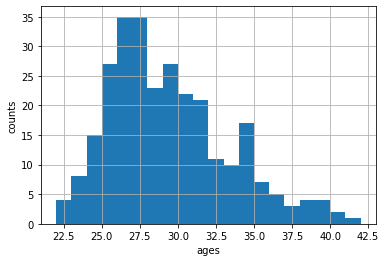

In [43]:
#plot age dist'n

age= gdf['AGE'].astype(float)
age.hist(bins=20)
plt.xlabel('ages')
plt.ylabel('counts')
plt.show()

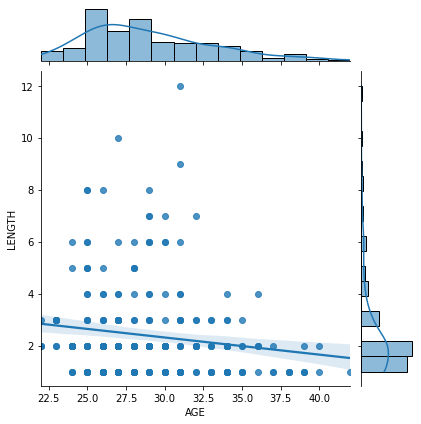

In [44]:
# age vs contract length
sns.jointplot(x='AGE', y='LENGTH', data=gdf, kind="reg");

In [45]:
### plot avg aav per season to see if there is a trend of more $$

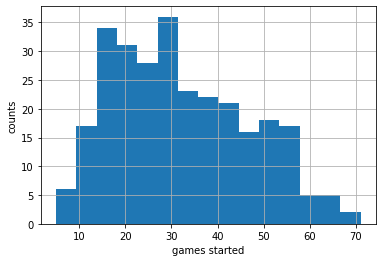

In [46]:
# dist'n of games started
gamestart= gdf['GS']
gamestart.hist(bins=15)
plt.xlabel('games started')
plt.ylabel('counts')
plt.show()

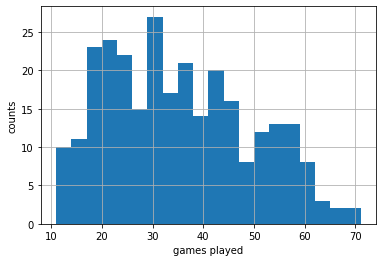

In [47]:
# games played
gamesplayed_g= gdf['GP']
gamesplayed_g.hist(bins=20)
plt.xlabel('games played')
plt.ylabel('counts')
plt.show()

In [48]:
print(  min(gdf.AAV))
print(  max(gdf.AAV))

500000.0
10500000.0


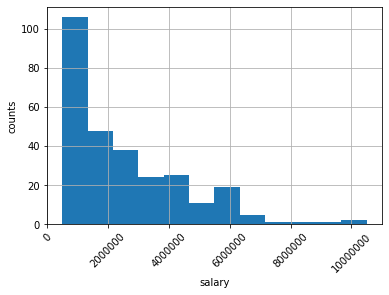

In [49]:
# distribution of goalie salaries

g_salary= gdf['AAV']
g_salary.hist(range=[500000, 10500000],bins=12, log=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation= 45)
plt.xlabel('salary')
plt.ylabel('counts')
plt.show()

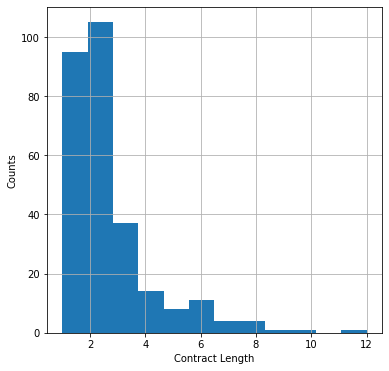

In [50]:
# distribution of goalie contract lengths

length= gdf['LENGTH'].astype(float)
length.hist(bins=12, figsize=(6,6))
plt.xlabel('Contract Length')
plt.ylabel('Counts')
plt.show()

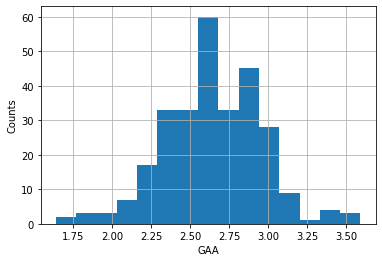

In [51]:
# distribution of goals against average

gaa= gdf['GAA']
gaa.hist(bins=15)
plt.xlabel('GAA')
plt.ylabel('Counts')
plt.show()

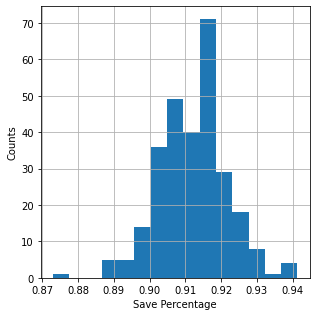

In [52]:
# distribution of save percentage

svp= gdf['SV_Pct']
svp.hist(bins=15, figsize=(4.5, 4.5))
plt.xlabel('Save Percentage')
plt.ylabel('Counts')
#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.tight_layout()
plt.show()

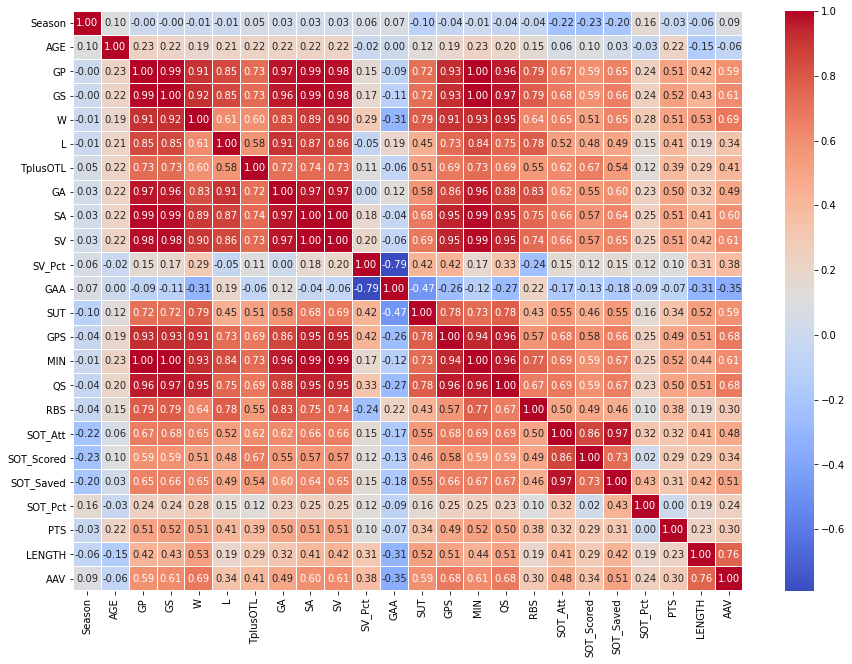

In [53]:
corrmat = gdf.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

This plot highlights a peculiar set of correlations. When discussing goaltenders, the big statistics that are always brought up in conversation are always wins, goals against average, and save percentage. Interestingly, age has little to do with salary, while goals against average and save percentage are somewhat insignicant as well. It seems as if the biggest factors in determining a goalie's salary are games played/started, goals against (most likely indicative of playing more games), shots against, saves, and goalie point shares. It is worth noting, as well, that losses are not negatively correlated with salary. This may be due to top paid goaltenders playing more, and thus losing more games than someone who does not play often. The relatively high correlation of GPS (goalie point shares) vs salary seems to be indicative of teams valuing goalies that can play the puck effectively, in addition to their main duty of keeping pucks out of their own net.

### DENOTE STRONG AND MODERATE CORRELATIONS (pos and neg) ****

In [54]:
gdf.pivot_table(index='AGE', values=['GP','GAA',"SV_Pct",'AAV'], aggfunc=['count','mean'])

count                         mean                               
       AAV GAA  GP SV_Pct           AAV       GAA         GP    SV_Pct
AGE                                                                   
22.0     4   4   4      4  1.875000e+06  2.897500  30.125000  0.904625
23.0     8   8   8      8  2.194792e+06  2.508333  30.291667  0.919292
24.0    15  15  15     15  2.530000e+06  2.662000  31.744444  0.911778
25.0    27  27  27     27  3.393210e+06  2.631883  35.043210  0.913170
26.0    35  35  35     35  2.381029e+06  2.696786  31.764286  0.910760
27.0    35  35  35     35  2.088719e+06  2.678905  30.645238  0.911033
28.0    23  23  23     23  2.532833e+06  2.579348  31.347826  0.915717
29.0    27  27  27     27  3.050463e+06  2.566605  36.938272  0.912293
30.0    22  22  22     22  2.763258e+06  2.608182  35.469697  0.910765
31.0    21  21  21     21  2.509405e+06  2.705992  36.742063  0.909464
32.0    11  11  11     11  2.912879e+06  2.609242  38.954545  0.911636
33.0    10  10  10     10  2.037500e+06  2.747167  37.566667  0.910017
34.0    17  17  17     17  2.246373e+06  2.667549  39.078431  0.912422
35.0     7   7   7      7  2.652381e+06  2.665000  42.976190  0.913262
36.0     5   5   5      5  2.660000e+06  2.525667  41.900000  0.916333
37.0     3   3   3      3  2.583333e+06  2.746111  42.444444  0.911278
38.0     4   4   4      4  1.343750e+06  2.827500  41.416667  0.909167
39.0     4   4   4      4  1.400000e+06  2.708333  41.916667  0.915667
40.0     2   2   2      2  3.100000e+06  2.483333  45.000000  0.912750
42.0     1   1   1      1  7.000000e+05  2.315000  44.000000  0.904500

From this pivot table, it seems as if most Starting Goaltenders are usually aged between 25 and 30. We also can see that outside this range, goalies seem to have a lower GAA, which is most likely indicative of only playing a select few games since they are most likely not the starter at that point in time.

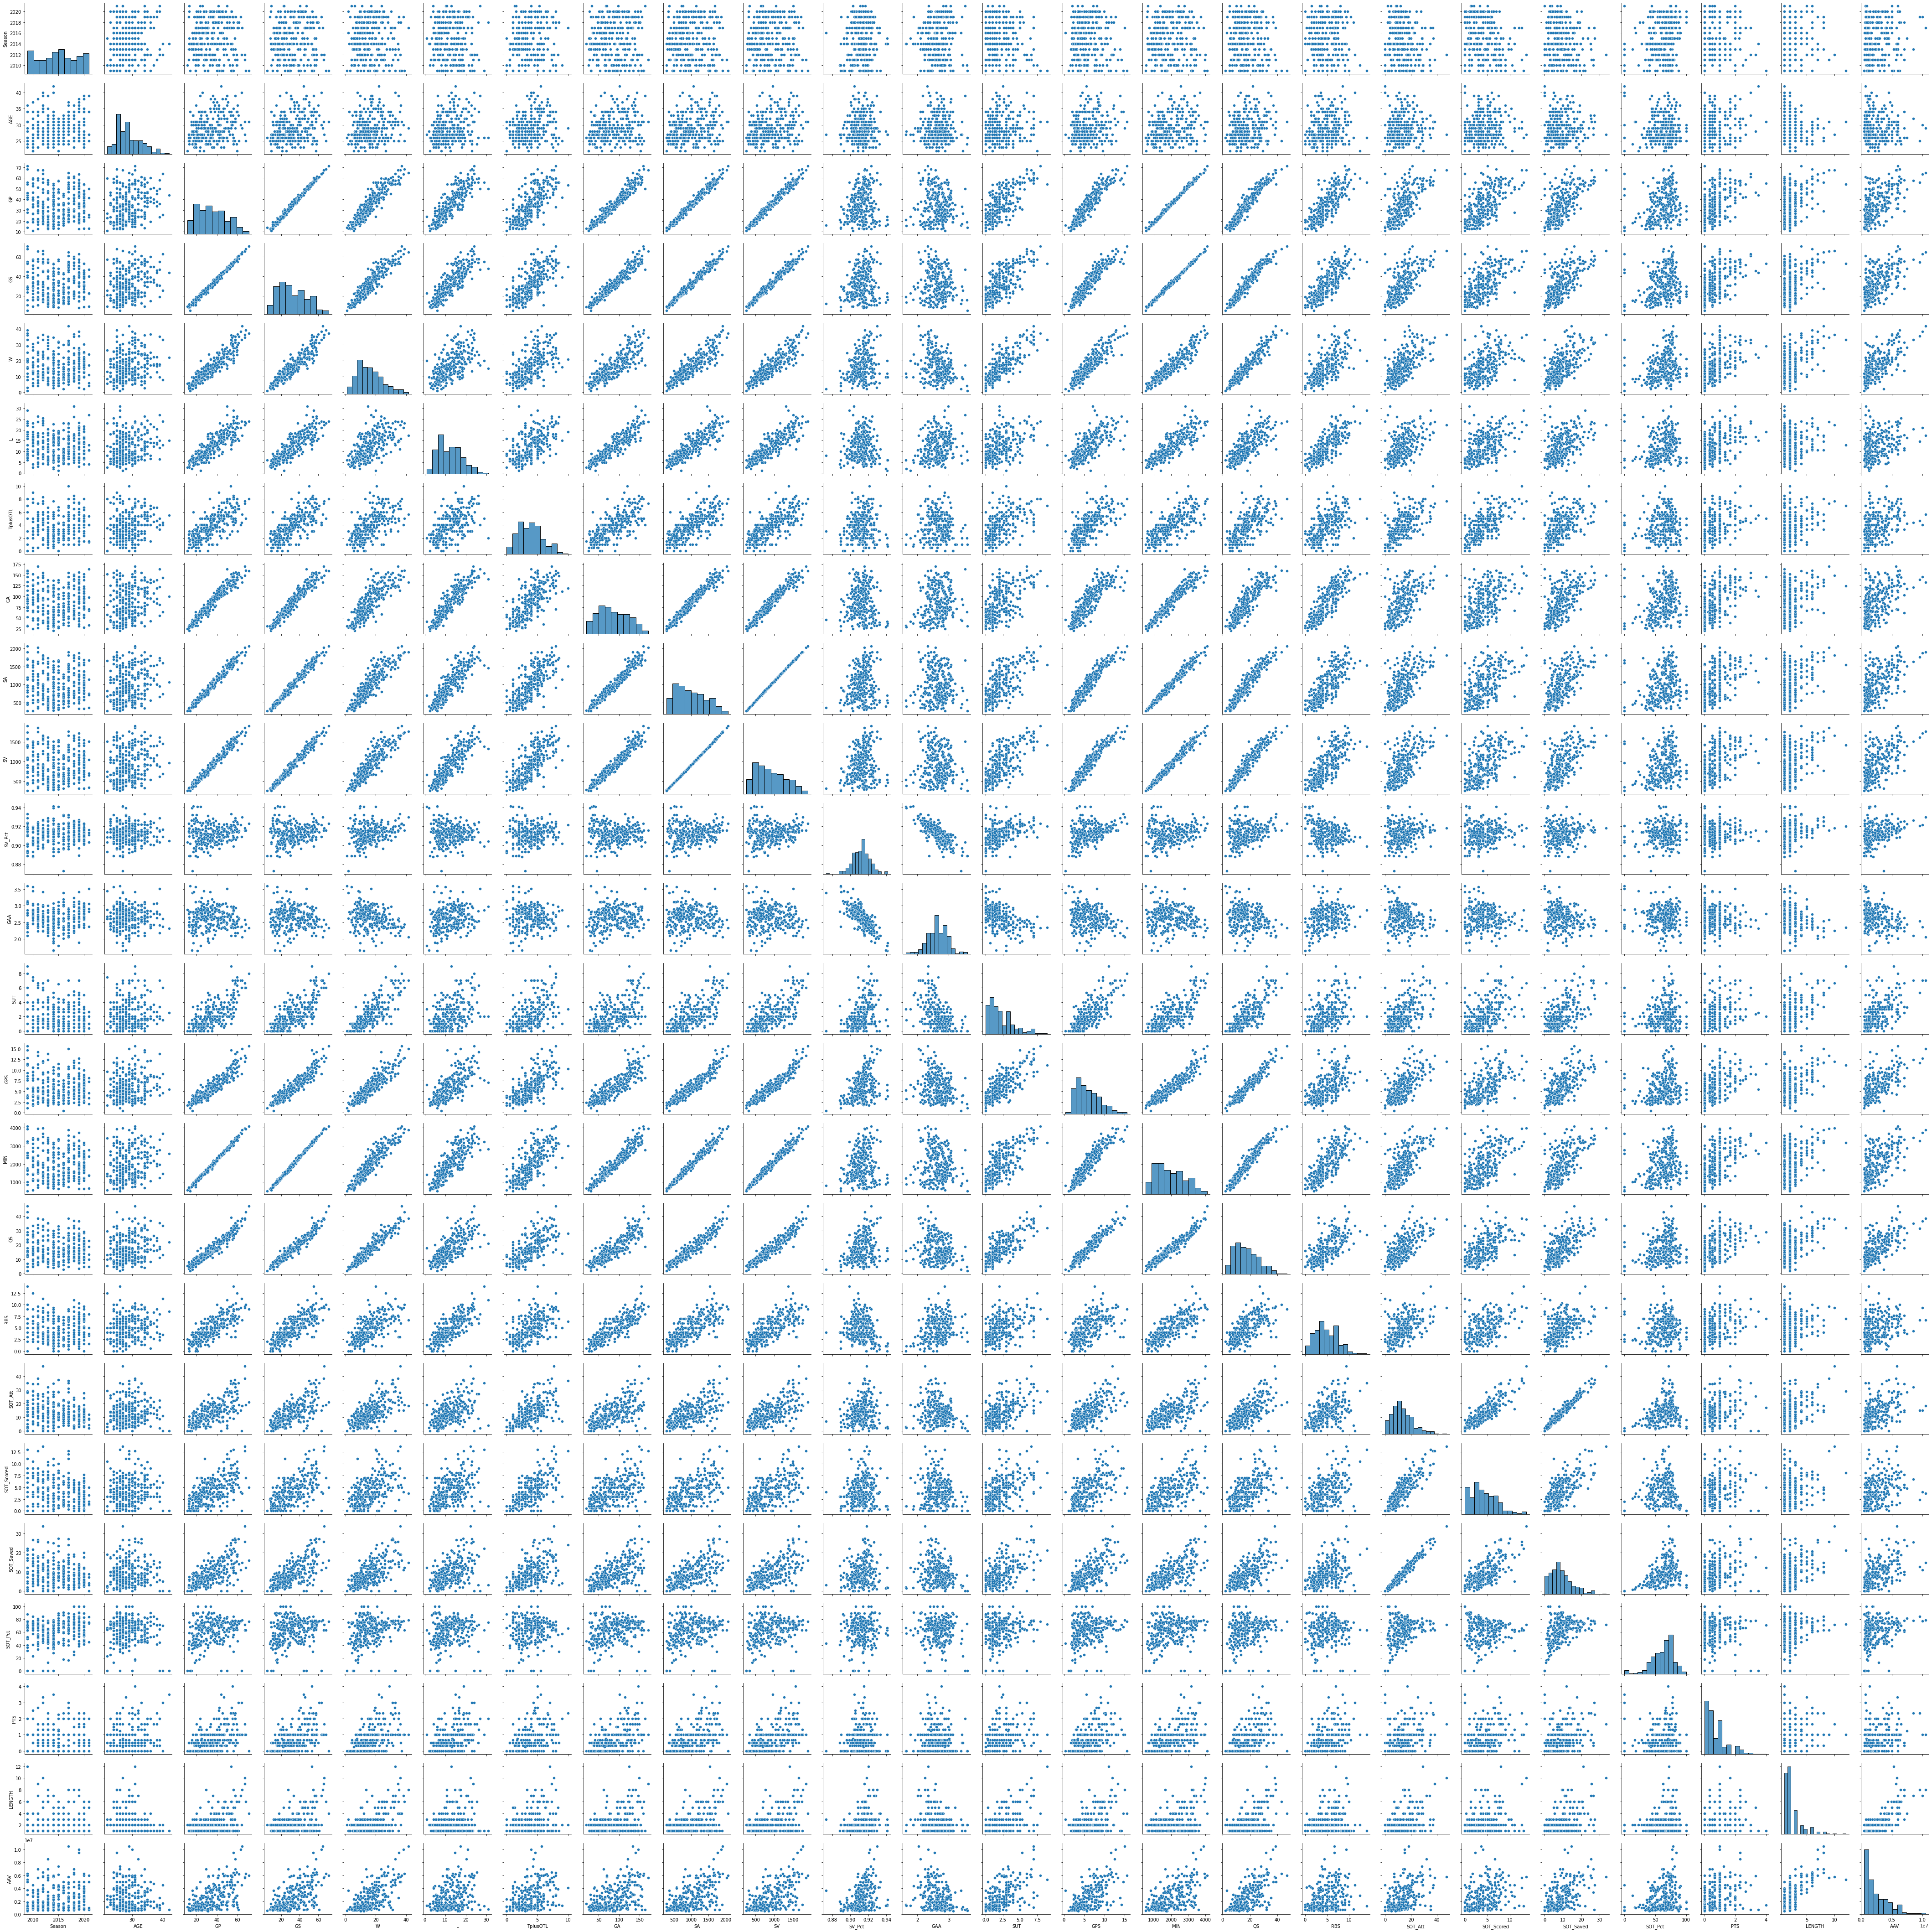

In [55]:
sns.pairplot(gdf)

## PLAYERS

In [56]:
pdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2621 entries, 0 to 2620
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2621 non-null   object 
 1   Season      2621 non-null   int64  
 2   AGE         2621 non-null   float64
 3   Pos_C       2621 non-null   int64  
 4   Pos_LW      2621 non-null   int64  
 5   Pos_RW      2621 non-null   int64  
 6   Pos_D       2621 non-null   int64  
 7   GP          2621 non-null   float64
 8   G           2621 non-null   float64
 9   A           2621 non-null   float64
 10  PTS         2621 non-null   float64
 11  PPG         2621 non-null   float64
 12  PlusMinus   2621 non-null   float64
 13  ATOI        2621 non-null   float64
 14  TOI(EV)     2619 non-null   float64
 15  PIM         2621 non-null   float64
 16  PS          2621 non-null   float64
 17  EV_A        2621 non-null   float64
 18  PP_A        2621 non-null   float64
 19  SH_A        2621 non-null  

In [57]:
pdf.describe()

Season          AGE        Pos_C       Pos_LW       Pos_RW  \
count  2621.00000  2621.000000  2621.000000  2621.000000  2621.000000   
mean   2014.68409    27.099580     0.289203     0.370851     0.354063   
std       3.45806     4.176224     0.453479     0.483125     0.478320   
min    2009.00000    20.000000     0.000000     0.000000     0.000000   
25%    2012.00000    24.000000     0.000000     0.000000     0.000000   
50%    2015.00000    26.000000     0.000000     0.000000     0.000000   
75%    2018.00000    29.000000     1.000000     1.000000     1.000000   
max    2021.00000    45.000000     1.000000     1.000000     1.000000   

             Pos_D           GP            G            A          PTS  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean      0.353300    56.374348     8.357942    13.938668    22.296611   
std       0.478086    18.138183     7.244365    10.105042    16.233200   
min       0.000000    10.333333     0.000000     0.000000     0.666667   
25%       0.000000    44.333333     2.666667     6.333333    10.000000   
50%       0.000000    60.333333     6.000000    11.333333    18.000000   
75%       1.000000    70.500000    12.333333    19.333333    31.666667   
max       1.000000    83.000000    42.000000    67.000000    94.500000   

               PPG    PlusMinus         ATOI      TOI(EV)          PIM  \
count  2621.000000  2621.000000  2621.000000  2619.000000  2621.000000   
mean      0.368222    -0.030745    15.506713    13.139101    33.466361   
std       0.204740     7.386590     3.774605     2.760399    28.127106   
min       0.016000   -26.500000     4.016667     4.000000     0.000000   
25%       0.208955    -4.333333    12.850000    11.222222    15.000000   
50%       0.320225    -0.500000    15.472222    13.138889    26.333333   
75%       0.491803     3.666667    18.027778    14.986111    42.333333   
max       1.472222    37.000000    27.333333    21.400000   230.500000   

                PS         EV_A         PP_A         SH_A           GW  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean      2.737174     6.362552     1.742846     0.252544     1.326116   
std       2.186671     5.169707     2.433610     0.504795     1.346828   
min      -1.200000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     2.333333     0.000000     0.000000     0.333333   
50%       2.300000     5.000000     0.666667     0.000000     1.000000   
75%       4.000000     9.333333     2.666667     0.333333     2.000000   
max      11.266667    30.000000    19.000000     5.000000     9.000000   

                 S        S_Pct          BLK          HIT          FOW  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean     92.096115     8.040671    42.999682    72.069153    83.282971   
std      54.232882     4.520936    35.348894    47.891653   160.071583   
min       5.000000     0.000000     0.000000     1.000000     0.000000   
25%      49.666667     4.600000    18.500000    37.333333     0.000000   
50%      83.333333     7.650000    31.000000    61.000000     3.666667   
75%     126.000000    10.966667    55.500000    96.000000    76.666667   
max     330.500000    42.733333   237.000000   368.666667   971.666667   

               FOL       FO_Pct           CF           CA       CF_Pct  \
count  2621.000000  2621.000000  2621.000000  2621.000000  2621.000000   
mean     84.861122    27.893428   703.960257   699.639005    49.748792   
std     152.967496    22.088468   315.619565   298.415699     3.669303   
min       0.000000     0.000000    51.333333    64.000000    30.050000   
25%       0.000000     0.000000   459.500000   472.000000    47.500000   
50%       6.500000    33.600000   701.666667   708.000000    49.866667   
75%      93.000000    46.933333   941.500000   915.000000    52.150000   
max     776.333333   100.000000  1792.000000  1703.666667    62.500000   

        CF_Pct_rel

In [58]:
#pdf.isnull().sum()

In [59]:
pdf.corr()

Season       AGE     Pos_C    Pos_LW    Pos_RW     Pos_D  \
Season      1.000000 -0.055066  0.060717  0.098480  0.079417 -0.005649   
AGE        -0.055066  1.000000 -0.048063 -0.080737 -0.060839  0.045648   
Pos_C       0.060717 -0.048063  1.000000  0.031176 -0.058737 -0.471464   
Pos_LW      0.098480 -0.080737  0.031176  1.000000  0.235941 -0.550946   
Pos_RW      0.079417 -0.060839 -0.058737  0.235941  1.000000 -0.535542   
Pos_D      -0.005649  0.045648 -0.471464 -0.550946 -0.535542  1.000000   
GP         -0.107020  0.268070  0.095687  0.045863  0.038873 -0.110014   
G          -0.069452  0.086060  0.215675  0.286601  0.280787 -0.489405   
A          -0.096035  0.189306  0.128998  0.026493  0.025855 -0.120130   
PTS        -0.090775  0.156247  0.176549  0.144393  0.141401 -0.293186   
PPG        -0.071782  0.081555  0.177241  0.173688  0.178453 -0.334542   
PlusMinus  -0.033590  0.014666 -0.059435 -0.037829 -0.072501  0.080049   
ATOI       -0.061952  0.194269 -0.171050 -0.339113 -0.325050  0.547816   
TOI(EV)     0.043878  0.125734 -0.254357 -0.371709 -0.359183  0.650983   
PIM        -0.289198  0.192337 -0.126508  0.040049  0.020059 -0.034061   
PS         -0.095356  0.160437 -0.059191 -0.069982 -0.071055  0.126254   
EV_A       -0.029761  0.053499  0.226130  0.327160  0.310952 -0.539143   
PP_A       -0.132596  0.132773  0.111799  0.125346  0.155302 -0.253324   
SH_A       -0.052672  0.047059  0.240358  0.158242  0.096383 -0.280757   
GW         -0.065723  0.095095  0.194386  0.211520  0.195732 -0.394868   
S          -0.078683  0.156404  0.116669  0.136354  0.164161 -0.269373   
S_Pct      -0.016691 -0.002333  0.270229  0.353337  0.319463 -0.585851   
BLK        -0.023018  0.208651 -0.240638 -0.409875 -0.401577  0.678097   
HIT        -0.043012  0.115100 -0.112108  0.046492  0.021799  0.029261   
FOW        -0.043320  0.104132  0.706145 -0.013187 -0.092948 -0.381773   
FOL        -0.032305  0.069612  0.726659 -0.001110 -0.078323 -0.406247   
FO_Pct      0.003985  0.042486  0.564686  0.358619  0.326258 -0.768598   
CF         -0.017643  0.224973 -0.055822 -0.126508 -0.129555  0.213553   
CA         -0.007312  0.245717 -0.046874 -0.144818 -0.151965  0.238098   
CF_Pct     -0.016698 -0.031019 -0.056160  0.012608  0.023401  0.020278   
CF_Pct_rel  0.147342 -0.114589 -0.042587  0.030174  0.044452  0.020262   
FF         -0.028535  0.225799 -0.058811 -0.127273 -0.130228  0.214763   
FA         -0.018863  0.244293 -0.052674 -0.144102 -0.149459  0.237249   
FF_Pct     -0.025229 -0.030500 -0.046021  0.019188  0.022712  0.012204   
FF_Pct_rel  0.149331 -0.111368 -0.034690  0.031564  0.049392  0.011154   
oiSH_Pct    0.005105  0.013417 -0.005774 -0.007425 -0.007710  0.048047   
oiSV_Pct   -0.034614  0.028549 -0.019077  0.004962 -0.031266  0.008624   
PDO        -0.025071  0.030969 -0.028359 -0.003771 -0.020884  0.046106   
oZS_Pct    -0.059211 -0.122256 -0.157703  0.025635  0.030351  0.065258   
dZS_Pct     0.059217  0.122258  0.157715 -0.025624 -0.030347 -0.065271   
TK         -0.063274  0.113815  0.245915  0.118883  0.116593 -0.293178   
GV          0.029398  0.216293 -0.089604 -0.180614 -0.176474  0.284295   
SAtt.      -0.066535  0.161502  0.039730  0.050060  0.081663 -0.104847   
Thru_Pct   -0.001655  0.024541  0.329712  0.403378  0.365378 -0.725864   
SOT_Att    -0.126060  0.010671  0.211955  0.126444  0.208051 -0.331223   
SOT_Scored -0.112103  0.022193  0.195557  0.080139  0.180640 -0.271808   
SOT_Saved  -0.124595  0.002830  0.205197  0.144601  0.208293 -0.341191   
SOT_Pct    -0.076292  0.008444  0.190140  0.118950  0.181334 -0.279061   
LENGTH     -0.013422 -0.142499  0.024089 -0.029942 -0.020842  0.025472   
AAV         0.060338 -0.000325  0.041604 -0.022727 -0.032371  0.022080   

                  GP         G         A       PTS       PPG  PlusMinus  \
Season     -0.107020 -0.069452 -0.096035 -0.090775 -0.071782  -0.033590   
AGE         0.268070  0.086060  0.189306  0.156247  0.081555   0.014666   
Pos_C       0.

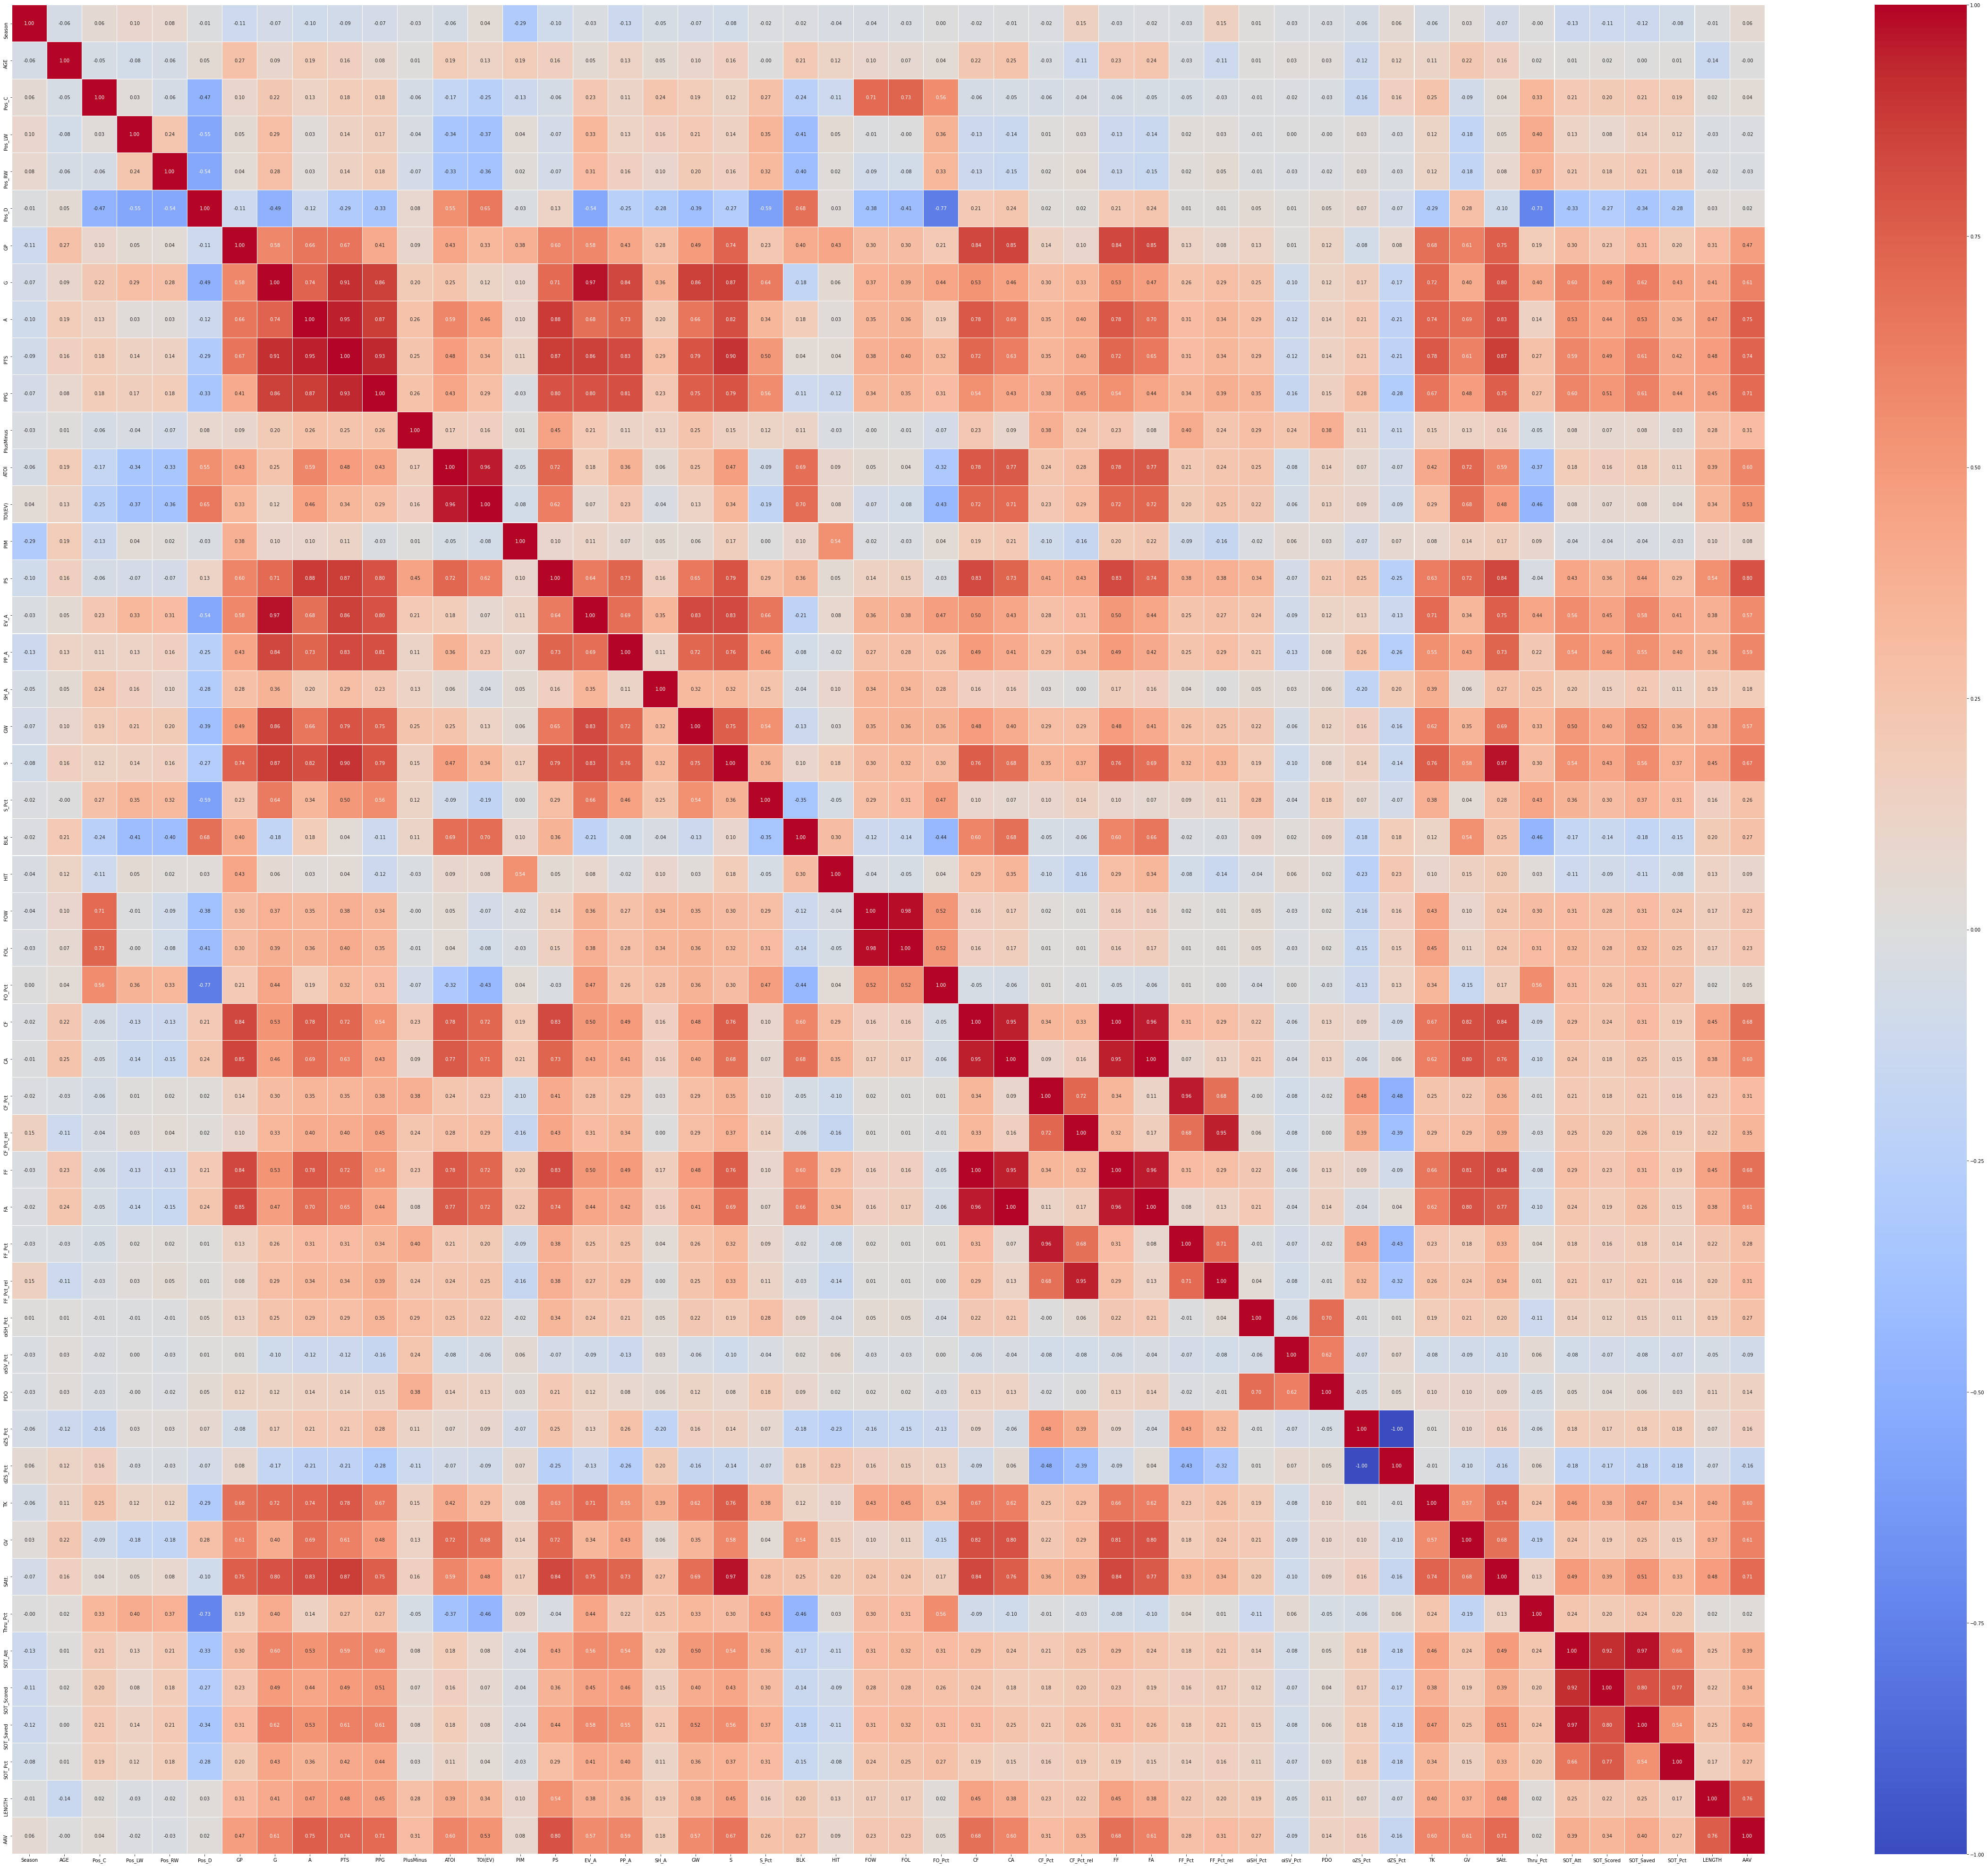

In [60]:
corrmat = pdf.corr()
f, ax = plt.subplots(figsize=(65, 55))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05);
#,  annot_kws={'size': 25}), xticklabels={'size' : 25},
                #yticklabels= {'size': 25}#
#sns.set(font_scale=2)
#hm= f.set_xticklabels(f.get_xmajorticklabels(), fontsize = 16)
#hm= f.set_yticklabels(f.get_ymajorticklabels(), fontsize = 16)
#f.subplots_adjust(top=0.93)
plt.tight_layout()

### Notable Correlations with AAV
##### Point Share (PS) - 0.80
##### Assists (A) - 0.75
##### Points (PTS) - 0.74
##### Points Per Game (PPG) - 0.71
##### Shot Attempts (SAtt.) - 0.71
##### Fenwick For (FF) - 0.68
##### Corsi For (CF) - 0.68
##### Goals (G) - 0.61
##### Average Time On Ice (ATOI) - 0.60
##### Takeaways (TK) - 0.60

In [61]:
pdf.describe().T

count          mean           std            min            25%  \
Season      2621.0  2.014684e+03  3.458060e+00    2009.000000    2012.000000   
AGE         2621.0  2.709958e+01  4.176224e+00      20.000000      24.000000   
Pos_C       2621.0  2.892026e-01  4.534787e-01       0.000000       0.000000   
Pos_LW      2621.0  3.708508e-01  4.831248e-01       0.000000       0.000000   
Pos_RW      2621.0  3.540633e-01  4.783197e-01       0.000000       0.000000   
Pos_D       2621.0  3.533003e-01  4.780862e-01       0.000000       0.000000   
GP          2621.0  5.637435e+01  1.813818e+01      10.333333      44.333333   
G           2621.0  8.357942e+00  7.244365e+00       0.000000       2.666667   
A           2621.0  1.393867e+01  1.010504e+01       0.000000       6.333333   
PTS         2621.0  2.229661e+01  1.623320e+01       0.666667      10.000000   
PPG         2621.0  3.682220e-01  2.047400e-01       0.016000       0.208955   
PlusMinus   2621.0 -3.074526e-02  7.386590e+00     -26.500000      -4.333333   
ATOI        2621.0  1.550671e+01  3.774605e+00       4.016667      12.850000   
TOI(EV)     2619.0  1.313910e+01  2.760399e+00       4.000000      11.222222   
PIM         2621.0  3.346636e+01  2.812711e+01       0.000000      15.000000   
PS          2621.0  2.737174e+00  2.186671e+00      -1.200000       1.000000   
EV_A        2621.0  6.362552e+00  5.169707e+00       0.000000       2.333333   
PP_A        2621.0  1.742846e+00  2.433610e+00       0.000000       0.000000   
SH_A        2621.0  2.525436e-01  5.047945e-01       0.000000       0.000000   
GW          2621.0  1.326116e+00  1.346828e+00       0.000000       0.333333   
S           2621.0  9.209611e+01  5.423288e+01       5.000000      49.666667   
S_Pct       2621.0  8.040671e+00  4.520936e+00       0.000000       4.600000   
BLK         2621.0  4.299968e+01  3.534889e+01       0.000000      18.500000   
HIT         2621.0  7.206915e+01  4.789165e+01       1.000000      37.333333   
FOW         2621.0  8.328297e+01  1.600716e+02       0.000000       0.000000   
FOL         2621.0  8.486112e+01  1.529675e+02       0.000000       0.000000   
FO_Pct      2621.0  2.789343e+01  2.208847e+01       0.000000       0.000000   
CF          2621.0  7.039603e+02  3.156196e+02      51.333333     459.500000   
CA          2621.0  6.996390e+02  2.984157e+02      64.000000     472.000000   
CF_Pct      2621.0  4.974879e+01  3.669303e+00      30.050000      47.500000   
CF_Pct_rel  2621.0 -9.356575e-01  3.639389e+00     -18.466667      -3.250000   
FF          2621.0  5.250685e+02  2.358368e+02      40.333333     342.333333   
FA          2621.0  5.220188e+02  2.241588e+02      48.333333     351.333333   
FF_Pct      2621.0  4.978478e+01  3.623811e+00      26.150000      47.500000   
FF_Pct_rel  2621.0 -9.488745e-01  3.612731e+00     -19.300000      -3.166667   
oiSH_Pct    2621.0  8.004305e+00  2.438605e+00       1.100000       6.933333   
oiSV_Pct    2621.0  9.172621e+01  2.244067e+00      46.750000      90.933333   
PDO         2621.0  9.970615e+01  3.340891e+00      50.000000      98.600000   
oZS_Pct     2621.0  5.043127e+01  6.687932e+00      19.400000      46.650000   
dZS_Pct     2621.0  4.956921e+01  6.687947e+00      21.800000      45.450000   
TK          2621.0  2.116231e+01  1.349550e+01       0.000000      10.666667   
GV          2621.0  2.392589e+01  1.563249e+01       0.000000      12.000000   
SAtt.       2619.0  1.700985e+02  9.522275e+01       6.000000      96.666667   
Thru_Pct    2621.0  5.344138e+01  8.323265e+00      13.533333      47.400000   
SOT_Att     2621.0  1.191212e+00  2.114791e+00       0.000000       0.000000   
SOT_Scored  2621.0  3.770507e-01  8.404714e-01       0.000000       0.000000   
SOT_Saved   2621.0  8.141613e-01  1.383451e+00       0.000000       0.000000   
SOT_Pct     2621.0  8.618854e+00  1.644902e+01       0.000000       0.000000   
LENGTH      2621.0  2.493705e+00  1.843821e+00       1.000000       1.000000   
AAV         2

## SUBSETS

In [62]:
pos_v_sal= df[['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G', 'AAV']]
pos_v_sal

Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        AAV
0         0       1       1      0      0   900000.0
1         1       1       0      0      0  5125000.0
2         1       1       0      0      0  1050000.0
3         1       0       0      0      0   800000.0
4         0       1       1      0      0   850000.0
...     ...     ...     ...    ...    ...        ...
2992      1       0       0      0      0  4700000.0
2993      0       0       1      0      0   875000.0
2994      1       0       0      0      0  6083333.0
2995      0       1       0      0      0   800000.0
2996      1       1       0      0      0  4000000.0

[2902 rows x 6 columns]

In [63]:
pvs_copy= pos_v_sal.copy()

In [64]:
#giving the boolean values labels for their corresponding position
pvs_copy['Pos_C']= pvs_copy.Pos_C.replace(to_replace=1, value='C')
pvs_copy['Pos_LW']= pvs_copy.Pos_LW.replace(to_replace=1, value='LW')
pvs_copy['Pos_RW']= pvs_copy.Pos_RW.replace(to_replace=1, value='RW')
pvs_copy['Pos_D']= pvs_copy.Pos_D.replace(to_replace=1, value='D')
pvs_copy['Pos_G']= pvs_copy.Pos_G.replace(to_replace=1, value='G')


In [65]:
pvs_copy

Pos_C Pos_LW Pos_RW Pos_D Pos_G        AAV
0        0     LW     RW     0     0   900000.0
1        C     LW      0     0     0  5125000.0
2        C     LW      0     0     0  1050000.0
3        C      0      0     0     0   800000.0
4        0     LW     RW     0     0   850000.0
...    ...    ...    ...   ...   ...        ...
2992     C      0      0     0     0  4700000.0
2993     0      0     RW     0     0   875000.0
2994     C      0      0     0     0  6083333.0
2995     0     LW      0     0     0   800000.0
2996     C     LW      0     0     0  4000000.0

[2902 rows x 6 columns]

In [66]:
pvs_copy.columns

Index(['Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D', 'Pos_G', 'AAV'], dtype='object')

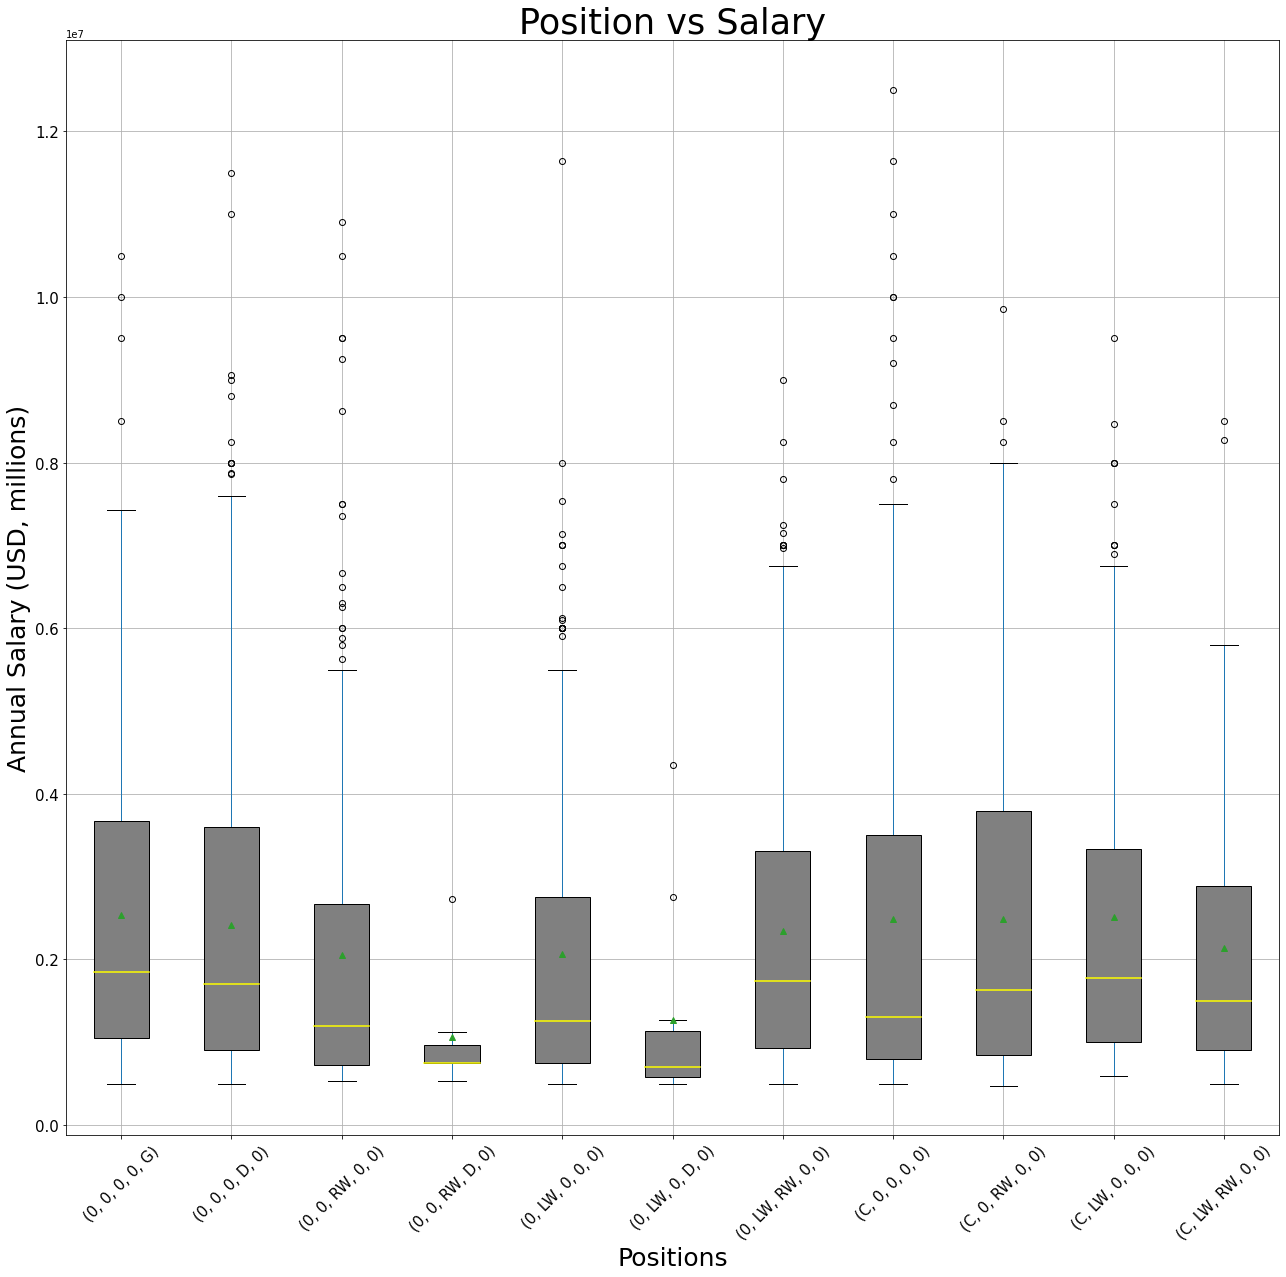

In [67]:
pvs_copy.boxplot(by=['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G'], column =['AAV'], figsize=(18,18),
                 rot=45, fontsize=15, patch_artist=True, showmeans=True, boxprops=dict(facecolor='grey'),
                 medianprops = dict(color="yellow",linewidth=1.5))
plt.title('Position vs Salary', fontsize=35)
plt.xlabel('Positions', fontsize=25)
plt.ylabel('Annual Salary (USD, millions)', fontsize=25)
plt.suptitle('')
#ticks=['G','D','RW','RW/D', 'LW','LW/RW','C','C/RW', 'C/LW','C/LW/RW']
#plt.axes.Axes.set_xticklabels(ticks=['G','D','RW','RW/D', 'LW','LW/RW','C','C/RW', 'C/LW','C/LW/RW']) 
#plt.xticks(ticks)
plt.tight_layout()

##sns.boxplot(x=['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G'], y="AAV", data=pos_v_sal)

When first considering pay vs position, one of my first thoughts was of Brent Burns -- a player who has received all-star nominations for his seasons as a RW as well as for his seasons as D. In fantasy hockey he, and a few others, are highly coveted for their versatility. This led me to question whether or not there was a correlation with position versatility and salary. One caveat in the hockey world, however, is that teams at times will put 'lower-tier/skill' players into this role depending on the roster needs on any given night. At first glance, this seems to primarily be the case as the LW/D and RW/D boxes on the plot above appear to have median salaries below the rest of the population. In either situation, this is worth delving into further.

It is also worth noting how for single-position players the top earner overall is a Center, while position with the lowest top salary is for Goaltenders. Thus, we will test the null hypothesis that goalies make less than the league average, despite being labeled as the 'most important' position. We will also test the hypothesis that forwards make more than any other subgroup of players, and as well as testing the claim that Centers earn more than any other position category.

In [68]:
grpb= df.groupby(by='Season')['AAV'].mean().astype(int)
grpb

Season
2009    2113433
2010    1973867
2011    2177326
2012    2415741
2013    2438631
2014    2369181
2015    2319484
2016    2405108
2017    2358273
2018    2634661
2019    2806282
2020    2194220
2021    2173660
Name: AAV, dtype: int32

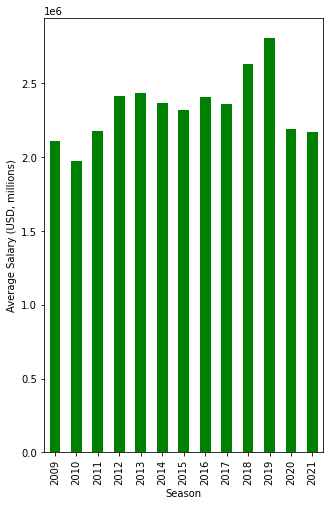

In [69]:
grpb.plot(kind='bar', color='green',figsize=(5,8))
plt.xlabel('Season')
plt.ylabel('Average Salary (USD, millions)')
plt.show()



Here we see a quite peculiar trend for average salary by season. From 2009 to 2019 there is a steady, somewhat consistent trend in average player salary increasing, followed by a $ 500,000 drop in 2020, where the average remained the following season as well.

##### Goalies only

In [70]:
# Goalies only

g_sal= pos_v_sal[pos_v_sal['Pos_G']==1]
g_sal= g_sal[['Pos_G','AAV']]

In [71]:
g_sal

Pos_G        AAV
23        1  5000000.0
26        1  6000000.0
29        1   700000.0
31        1   700000.0
41        1   950000.0
...     ...        ...
2951      1  1812500.0
2957      1  1250000.0
2972      1   535000.0
2983      1  5000000.0
2991      1  6000000.0

[281 rows x 2 columns]

In [72]:
print ('The Averge Annual salary for a G is $%s with a standard deviation of $%s, and a median of $%s' % (round(g_sal.AAV.mean(),2),
                                                                                                          round(g_sal.AAV.std(), 2), 
                                                                                                          round(g_sal.AAV.median()) ) )

The Averge Annual salary for a G is $2538326.2 with a standard deviation of $1904609.89, and a median of $1850000.0


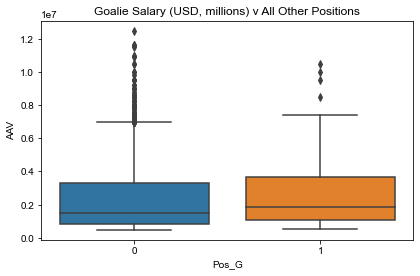

In [73]:
sns.boxplot(data= df, x='Pos_G', y='AAV')
plt.title('Goalie Salary (USD, millions) v All Other Positions')
sns.set(rc= {"figure.figsize": (10, 15)});
plt.tight_layout()

##### Players only

In [74]:
# Players only

plrs= pos_v_sal[pos_v_sal['Pos_G']==0]
plrs= plrs.drop(columns='Pos_G')

In [75]:
plrs


Pos_C  Pos_LW  Pos_RW  Pos_D        AAV
0         0       1       1      0   900000.0
1         1       1       0      0  5125000.0
2         1       1       0      0  1050000.0
3         1       0       0      0   800000.0
4         0       1       1      0   850000.0
...     ...     ...     ...    ...        ...
2992      1       0       0      0  4700000.0
2993      0       0       1      0   875000.0
2994      1       0       0      0  6083333.0
2995      0       1       0      0   800000.0
2996      1       1       0      0  4000000.0

[2621 rows x 5 columns]

In [76]:
plrs.AAV.describe()

count    2.621000e+03
mean     2.337284e+06
std      1.929026e+06
min      4.750000e+05
25%      8.500000e+05
50%      1.500000e+06
75%      3.300000e+06
max      1.250000e+07
Name: AAV, dtype: float64

In [77]:
print ('The Averge Annual salary for a Non-Goalie Player is $%s with a standard deviation of $%s, and a median of $%s' % (round(plrs.AAV.mean(),2),
                                                                                                          round(plrs.AAV.std(), 2), 
                                                                                                          round(plrs.AAV.median()) ) )

The Averge Annual salary for a Non-Goalie Player is $2337284.42 with a standard deviation of $1929026.24, and a median of $1500000.0


##### Center only

In [78]:
# Center only


c_only = pos_v_sal[pos_v_sal['Pos_C']==1]
c_only= c_only[c_only['Pos_RW']==0]
c_only= c_only[c_only['Pos_LW']==0]
c_only= c_only[c_only['Pos_D']==0]
c_only = c_only.drop(columns=['Pos_LW','Pos_RW','Pos_D','Pos_G'])
c_only

Pos_C        AAV
3         1   800000.0
16        1  3250000.0
38        1  7000000.0
47        1  5000000.0
55        1  4800000.0
...     ...        ...
2976      1  1450000.0
2986      1   812500.0
2989      1  4500000.0
2992      1  4700000.0
2994      1  6083333.0

[299 rows x 2 columns]

In [79]:
print ('The Averge Annual salary for a (pure) C is $%s with a standard deviation of $%s, and a median of $%s' % (round(c_only.AAV.mean(),2),
                                                                                                          round(c_only.AAV.std(), 2), 
                                                                                                          round(c_only.AAV.median()) ) )

The Averge Annual salary for a (pure) C is $2489963.04 with a standard deviation of $2343748.95, and a median of $1300000.0


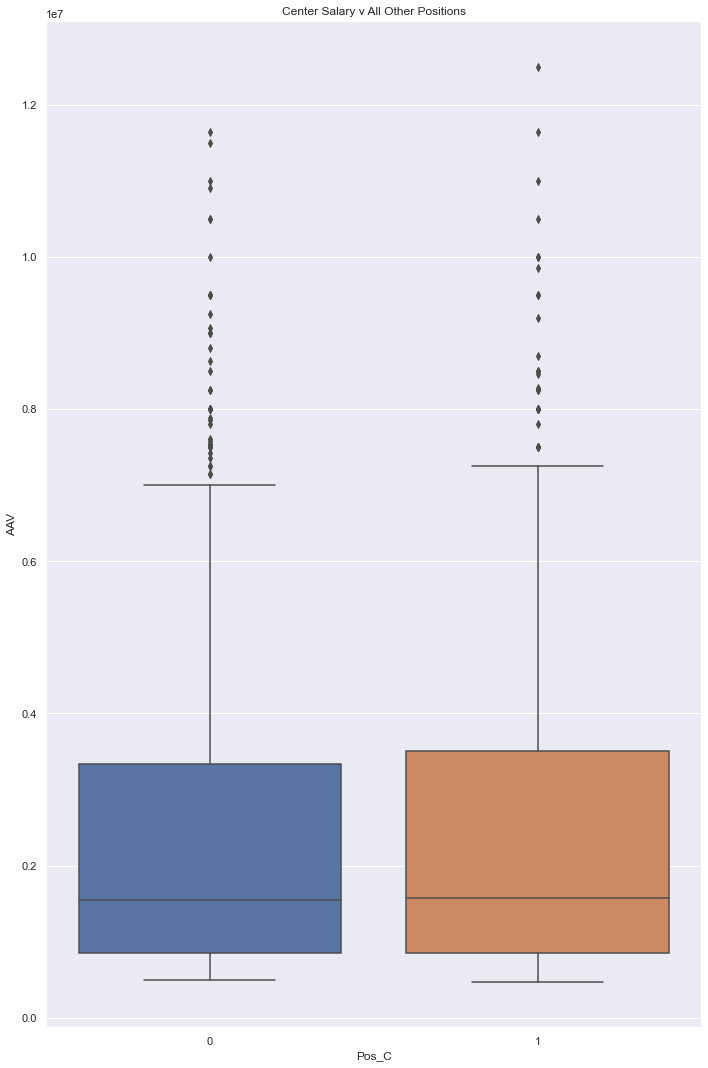

In [80]:
sns.boxplot(data= df, x='Pos_C', y='AAV')
plt.title('Center Salary v All Other Positions')
sns.set(rc= {"figure.figsize": (10, 15)})
plt.tight_layout()

##### RW only

In [81]:
# RW only

rw_only = pos_v_sal[pos_v_sal['Pos_RW']==1]
rw_only= rw_only[rw_only['Pos_C']==0]
rw_only= rw_only[rw_only['Pos_LW']==0]
rw_only= rw_only[rw_only['Pos_D']==0]
rw_only = rw_only.drop(columns=['Pos_LW','Pos_C','Pos_D','Pos_G'])
rw_only

Pos_RW        AAV
30         1   750000.0
52         1   750000.0
114        1  6500000.0
136        1  2000000.0
188        1  1750000.0
...      ...        ...
2977       1  1633333.0
2978       1  2000000.0
2981       1  1300000.0
2985       1   550000.0
2993       1   875000.0

[274 rows x 2 columns]

In [82]:
print ('The Averge Annual salary for a (pure) RW is $%s with a standard deviation of $%s, and a median of $%s' % (round(rw_only.AAV.mean(),2),
                                                                                                          round(rw_only.AAV.std(), 2), 
                                                                                                          round(rw_only.AAV.median()) ) )

The Averge Annual salary for a (pure) RW is $2049003.04 with a standard deviation of $1965619.59, and a median of $1200000.0


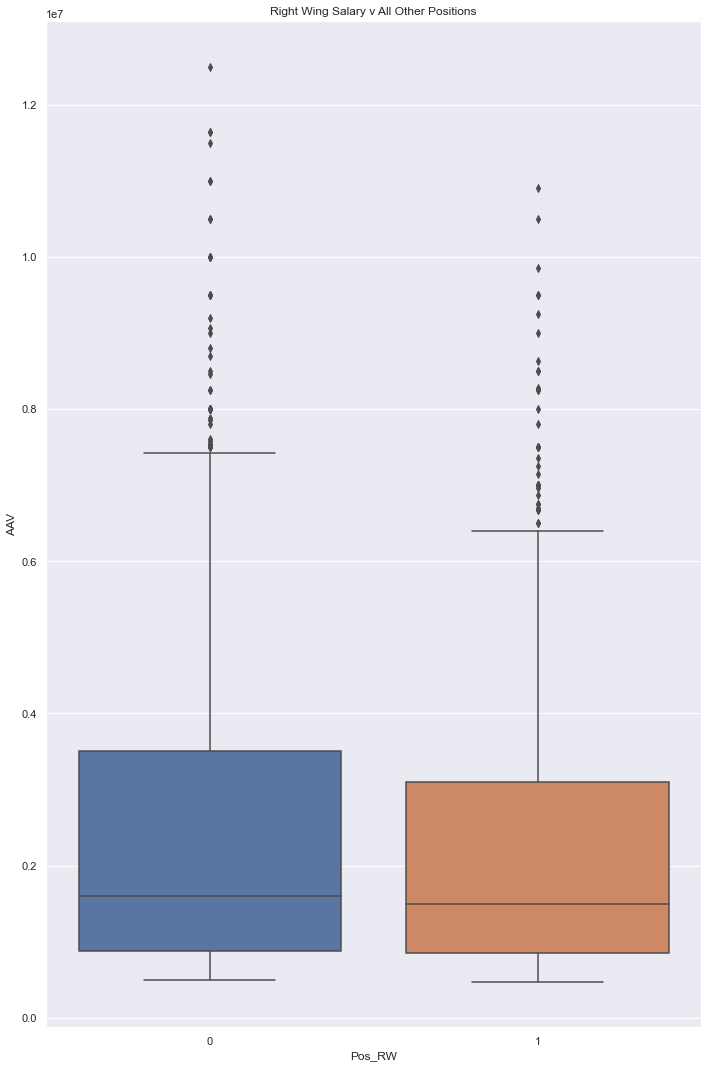

In [83]:
sns.boxplot(data= df, x='Pos_RW', y='AAV')
plt.title('Right Wing Salary v All Other Positions')
sns.set(rc= {"figure.figsize": (10, 15)})
plt.tight_layout()

##### LW only

In [84]:
# LW only

lw_only = pos_v_sal[pos_v_sal['Pos_LW']==1]
lw_only= lw_only[lw_only['Pos_C']==0]
lw_only= lw_only[lw_only['Pos_RW']==0]
lw_only= lw_only[lw_only['Pos_D']==0]
lw_only = lw_only.drop(columns=['Pos_RW','Pos_C','Pos_D','Pos_G'])
lw_only

Pos_LW        AAV
21         1  3250000.0
70         1  3675000.0
129        1  8000000.0
132        1  1000000.0
246        1  1700000.0
...      ...        ...
2932       1   750000.0
2945       1  2900000.0
2961       1   800000.0
2969       1  2150000.0
2995       1   800000.0

[251 rows x 2 columns]

In [85]:
print ('The Averge Annual salary for a (pure) LW is $%s with a standard deviation of $%s, and a median of $%s' % (round(lw_only.AAV.mean(),2),
                                                                                                          round(lw_only.AAV.std(), 2), 
                                                                                                          round(lw_only.AAV.median()) ) )

The Averge Annual salary for a (pure) LW is $2059032.6 with a standard deviation of $1828537.03, and a median of $1250000.0


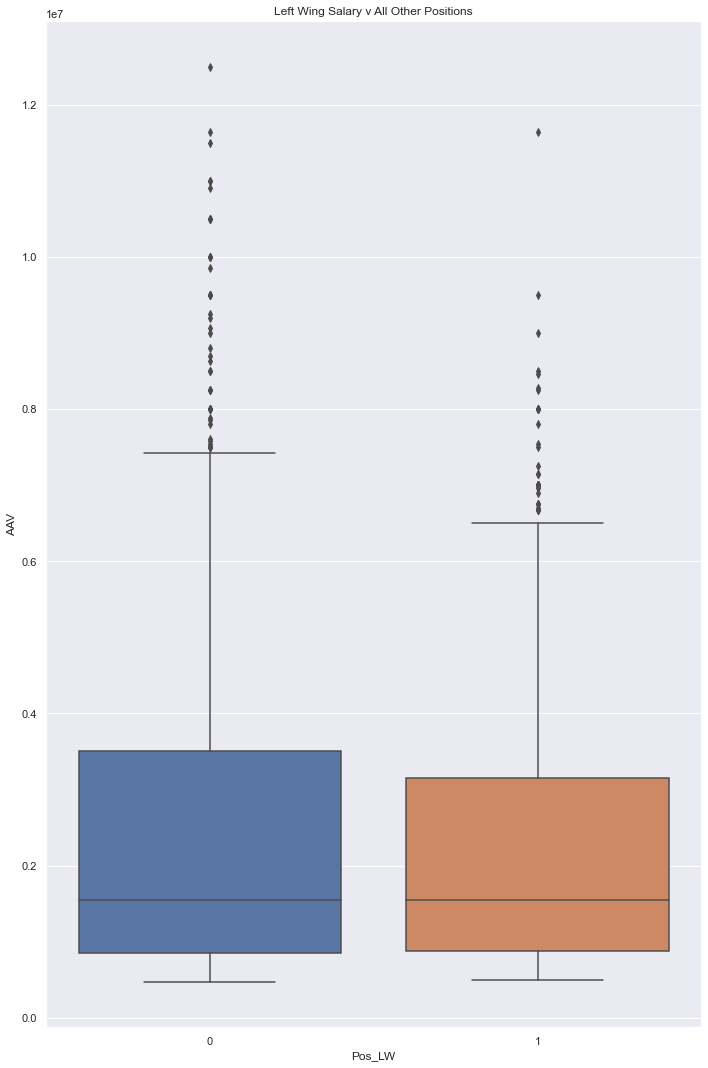

In [86]:
sns.boxplot(data= df, x='Pos_LW', y='AAV')
plt.title('Left Wing Salary v All Other Positions')
sns.set(rc= {"figure.figsize": (10, 15)})
plt.tight_layout()

##### Forwards only

In [87]:
# Forwards only

fwd_only= pos_v_sal[pos_v_sal['Pos_G']==0]
fwd_only= fwd_only[fwd_only['Pos_D']==0]
fwd_only= fwd_only.drop(columns=['Pos_D','Pos_G'])
fwd_only

Pos_C  Pos_LW  Pos_RW        AAV
0         0       1       1   900000.0
1         1       1       0  5125000.0
2         1       1       0  1050000.0
3         1       0       0   800000.0
4         0       1       1   850000.0
...     ...     ...     ...        ...
2992      1       0       0  4700000.0
2993      0       0       1   875000.0
2994      1       0       0  6083333.0
2995      0       1       0   800000.0
2996      1       1       0  4000000.0

[1695 rows x 4 columns]

In [88]:
print ('The Averge Annual salary for a Forward is $%s with a standard deviation of $%s, and a median of $%s' % (round(fwd_only.AAV.mean(),2),
                                                                                                          round(fwd_only.AAV.std(), 2), 
                                                                                                          round(fwd_only.AAV.median()) ) )

The Averge Annual salary for a Forward is $2305808.98 with a standard deviation of $1972939.3, and a median of $1500000.0


##### Non Forwards only

In [89]:
non_fwd= pos_v_sal.query('Pos_C==0 and Pos_LW==0 and Pos_RW==0')
non_fwd= non_fwd.drop(columns=['Pos_C','Pos_LW', 'Pos_RW'])
non_fwd

Pos_D  Pos_G        AAV
10        1      0  2500000.0
12        1      0  3000000.0
13        1      0  1350000.0
15        1      0  1350000.0
23        0      1  5000000.0
...     ...    ...        ...
2973      1      0   612500.0
2982      1      0  2000000.0
2983      0      1  5000000.0
2988      1      0  3700000.0
2991      0      1  6000000.0

[1190 rows x 3 columns]

In [90]:
print ('The Averge Annual salary for a Non-Forward is $%s with a standard deviation of $%s, and a median of $%s' % (round(non_fwd.AAV.mean(),2),
                                                                                                          round(non_fwd.AAV.std(), 2), 
                                                                                                          round(non_fwd.AAV.median()) ) )

The Averge Annual salary for a Non-Forward is $2446060.98 with a standard deviation of $1862810.49, and a median of $1750000.0


##### Wingers only

In [91]:
# wingers only

wing_only= pos_v_sal[pos_v_sal['Pos_G']==0]
wing_only= wing_only[wing_only['Pos_D']==0]
wing_only= wing_only[wing_only['Pos_C']==0]
wing_only= wing_only.drop(columns=['Pos_D','Pos_G'])
wing_only


Pos_C  Pos_LW  Pos_RW        AAV
0         0       1       1   900000.0
4         0       1       1   850000.0
5         0       1       1  1000000.0
11        0       1       1  1000000.0
17        0       1       1  1500000.0
...     ...     ...     ...        ...
2981      0       0       1  1300000.0
2985      0       0       1   550000.0
2990      0       1       1  2000000.0
2993      0       0       1   875000.0
2995      0       1       0   800000.0

[937 rows x 4 columns]

In [92]:
print ('The Averge Annual salary for a Winger is $%s with a standard deviation of $%s, and a median of $%s' % (round(wing_only.AAV.mean(),2),
                                                                                                          round(wing_only.AAV.std(), 2), 
                                                                                                          round(wing_only.AAV.median()) ) )

The Averge Annual salary for a Winger is $2178584.16 with a standard deviation of $1835854.66, and a median of $1466667.0


##### Defensemen only

In [93]:
# Pure D only

dman= pos_v_sal[pos_v_sal['Pos_D']==1]
dman= dman[dman['Pos_RW']==0]
dman=dman[dman['Pos_LW']==0]
dman= dman[dman["Pos_C"]==0]

In [94]:
dman

Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        AAV
10        0       0       0      1      0  2500000.0
12        0       0       0      1      0  3000000.0
13        0       0       0      1      0  1350000.0
15        0       0       0      1      0  1350000.0
24        0       0       0      1      0  3150000.0
...     ...     ...     ...    ...    ...        ...
2963      0       0       0      1      0   800000.0
2968      0       0       0      1      0  1833333.0
2973      0       0       0      1      0   612500.0
2982      0       0       0      1      0  2000000.0
2988      0       0       0      1      0  3700000.0

[909 rows x 6 columns]

In [95]:
print ('The Averge Annual salary for a (pure) D is $%s with a standard deviation of $%s, and a median of $%s' % (round(dman.AAV.mean(),2),
                                                                                                          round(dman.AAV.std(), 2), 
                                                                                                          round(dman.AAV.median()) ) )

The Averge Annual salary for a (pure) D is $2417538.95 with a standard deviation of $1849831.02, and a median of $1700000.0


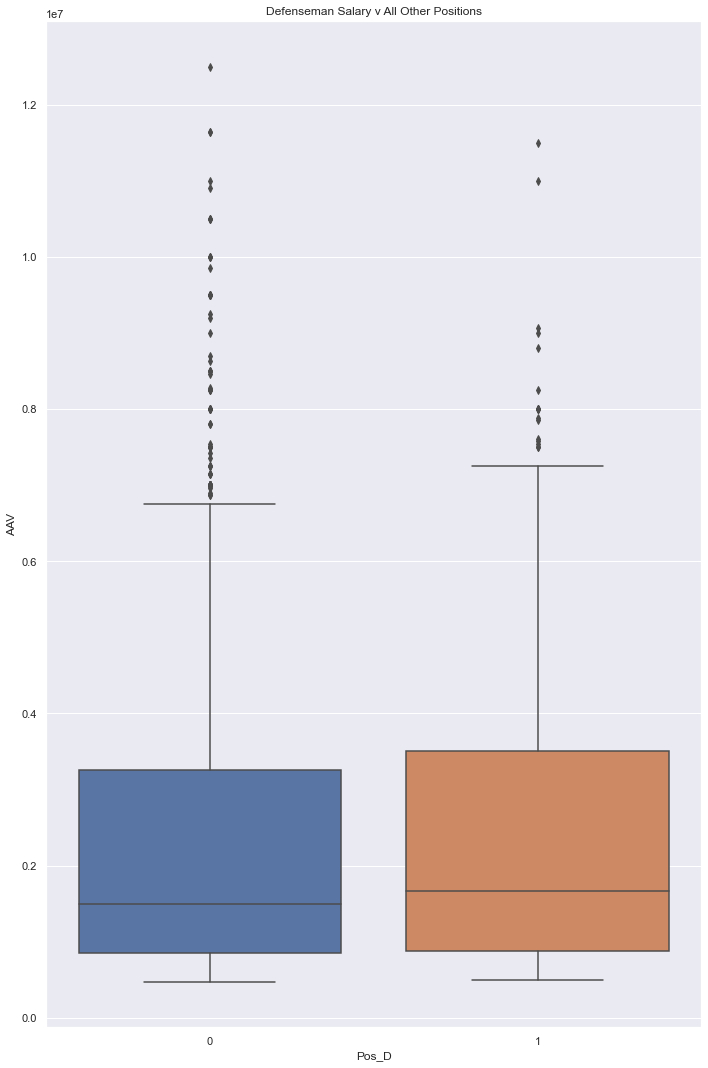

In [96]:
sns.boxplot(data= df, x='Pos_D', y='AAV')
plt.title('Defenseman Salary v All Other Positions')
sns.set(rc= {"figure.figsize": (10, 15)})
plt.tight_layout()

##### Non Defensemen only

In [97]:
non_d= pos_v_sal.query('Pos_D==0')
non_d= non_d.drop(columns=['Pos_D'])
non_d

Pos_C  Pos_LW  Pos_RW  Pos_G        AAV
0         0       1       1      0   900000.0
1         1       1       0      0  5125000.0
2         1       1       0      0  1050000.0
3         1       0       0      0   800000.0
4         0       1       1      0   850000.0
...     ...     ...     ...    ...        ...
2992      1       0       0      0  4700000.0
2993      0       0       1      0   875000.0
2994      1       0       0      0  6083333.0
2995      0       1       0      0   800000.0
2996      1       1       0      0  4000000.0

[1976 rows x 5 columns]

In [98]:
print ('The Averge Annual salary for a Non Defenseman is $%s with a standard deviation of $%s, and a median of $%s' % (round(non_d.AAV.mean(),2),
                                                                                                          round(non_d.AAV.std(), 2), 
                                                                                                          round(non_d.AAV.median()) ) )

The Averge Annual salary for a Non Defenseman is $2338874.43 with a standard deviation of $1964574.84, and a median of $1500000.0


##### C/LW/RW only

In [99]:
# C/LW/RW only

crwlw= pos_v_sal[pos_v_sal['Pos_C']==1]
crwlw= crwlw[crwlw['Pos_RW']==1]
crwlw= crwlw[crwlw['Pos_LW']==1]
crwlw= crwlw[crwlw['Pos_D']==0]
crwlw = crwlw.drop(columns=['Pos_D','Pos_G'])
crwlw

Pos_C  Pos_LW  Pos_RW        AAV
9         1       1       1   850000.0
51        1       1       1  1200000.0
56        1       1       1   737500.0
78        1       1       1   975000.0
84        1       1       1  1050000.0
...     ...     ...     ...        ...
2609      1       1       1   912500.0
2641      1       1       1  1200000.0
2688      1       1       1   500000.0
2720      1       1       1   750000.0
2723      1       1       1  3362500.0

[75 rows x 4 columns]

In [100]:
print ('The Averge Annual salary for a C/RW/LW is $%s with a standard deviation of $%s, and a median of $%s' % (round(crwlw.AAV.mean(),2),
                                                                                                          round(crwlw.AAV.std(), 2), 
                                                                                                          round(crwlw.AAV.median()) ) )

The Averge Annual salary for a C/RW/LW is $2133610.53 with a standard deviation of $1707734.39, and a median of $1500000.0


##### Winger-Defensemen only

In [101]:
# wing/D

wing_dman= pos_v_sal[pos_v_sal['Pos_D']==1]
wing_dman= wing_dman[wing_dman['Pos_C']==0]
wing_dman= wing_dman[wing_dman['Pos_G']==0]
wing_dman= wing_dman[wing_dman['Pos_LW'or 'Pos_RW'] ==1]
wing_dman= wing_dman.drop(columns=['Pos_C', 'Pos_G'])

In [102]:
wing_dman

Pos_LW  Pos_RW  Pos_D        AAV
885        1       0      1   700000.0
985        1       0      1  4350000.0
1389       1       0      1   575000.0
1468       1       0      1  2750000.0
1664       1       0      1   700000.0
1892       1       0      1  1262500.0
2026       1       0      1   750000.0
2221       1       0      1   600000.0
2721       1       0      1   512500.0
2979       1       0      1   500000.0

In [103]:
print ('The Averge Annual salary for a W/D is $%s with a standard deviation of $%s, and a median of $%s' % (round(wing_dman.AAV.mean(),2),
                                                                                                          round(wing_dman.AAV.std(), 2), 
                                                                                                          round(wing_dman.AAV.median()) ) )

The Averge Annual salary for a W/D is $1270000.0 with a standard deviation of $1277831.82, and a median of $700000.0


##### Center/Right Wing only

In [104]:
# C/RW

crw= pos_v_sal[pos_v_sal['Pos_C']==1]
crw= crw[crw['Pos_RW']==1]
crw= crw[crw['Pos_LW']==0]
crw= crw[crw['Pos_D']==0]
crw = crw.drop(columns=['Pos_D','Pos_G'])
crw

Pos_C  Pos_LW  Pos_RW        AAV
6         1       0       1  1050000.0
7         1       0       1   750000.0
8         1       0       1   825000.0
14        1       0       1  1700000.0
27        1       0       1  1838362.0
...     ...     ...     ...        ...
2807      1       0       1  1000000.0
2866      1       0       1   771750.0
2873      1       0       1   500000.0
2909      1       0       1  2900000.0
2987      1       0       1   475000.0

[160 rows x 4 columns]

In [105]:
print ('The Averge Annual salary for a C/RW is $%swith a standard deviation of $%s, and a median of $%s' % (round(crw.AAV.mean(),2),
                                                                                                          round(crw.AAV.std(), 2), 
                                                                                                          round(crw.AAV.median()) ) )

The Averge Annual salary for a C/RW is $2492332.96with a standard deviation of $2070801.51, and a median of $1625000.0


##### Center/Left Wing only

In [106]:
# C/LW

clw= pos_v_sal[pos_v_sal['Pos_C']==1]
clw= clw[clw['Pos_RW']==0]
clw= clw[clw['Pos_LW']==1]
clw= clw[clw['Pos_D']==0]
clw = clw.drop(columns=['Pos_D','Pos_G'])
clw

Pos_C  Pos_LW  Pos_RW        AAV
1         1       1       0  5125000.0
2         1       1       0  1050000.0
18        1       1       0  3000000.0
19        1       1       0  4000000.0
39        1       1       0   700000.0
...     ...     ...     ...        ...
2811      1       1       0  3750000.0
2817      1       1       0  3200000.0
2927      1       1       0  6000000.0
2950      1       1       0  1100000.0
2996      1       1       0  4000000.0

[224 rows x 4 columns]

In [107]:
print ('The Averge Annual salary for a C/LW is $%s with a standard deviation of $%s, and a median of $%s' % (round(clw.AAV.mean(),2),
                                                                                                          round(clw.AAV.std(), 2), 
                                                                                                          round(clw.AAV.median()) ) )

The Averge Annual salary for a C/LW is $2516606.45 with a standard deviation of $1965588.51, and a median of $1775000.0


##### Right/Left Wing only

In [108]:
# RW/LW

rwlw= pos_v_sal[pos_v_sal['Pos_C']==0]
rwlw= rwlw[rwlw['Pos_RW']==1]
rwlw= rwlw[rwlw['Pos_LW']==1]
rwlw= rwlw[rwlw['Pos_D']==0]
rwlw = rwlw.drop(columns=['Pos_D','Pos_G'])
rwlw

Pos_C  Pos_LW  Pos_RW        AAV
0         0       1       1   900000.0
4         0       1       1   850000.0
5         0       1       1  1000000.0
11        0       1       1  1000000.0
17        0       1       1  1500000.0
...     ...     ...     ...        ...
2910      0       1       1   660000.0
2960      0       1       1  1700000.0
2967      0       1       1  1033333.0
2980      0       1       1  3954545.0
2990      0       1       1  2000000.0

[412 rows x 4 columns]

In [109]:
print ('The Averge Annual salary for a RW/LW is $%s with a standard deviation of $%s, and a median of $%s' % (round(rwlw.AAV.mean(),2),
                                                                                                          round(rwlw.AAV.std(), 2), 
                                                                                                          round(rwlw.AAV.median()) ) )

The Averge Annual salary for a RW/LW is $2337595.49 with a standard deviation of $1740729.66, and a median of $1737500.0


##### 2+ Position players

In [110]:
mult_posn= pos_v_sal
mult_posn['Positions'] =  mult_posn.apply(lambda row: row.Pos_C + row.Pos_LW + row.Pos_RW + row.Pos_D + row.Pos_G, axis=1)
mult_posn= mult_posn[mult_posn['Positions']>1]

mult_posn

c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        AAV  Positions
0         0       1       1      0      0   900000.0        2.0
1         1       1       0      0      0  5125000.0        2.0
2         1       1       0      0      0  1050000.0        2.0
4         0       1       1      0      0   850000.0        2.0
5         0       1       1      0      0  1000000.0        2.0
...     ...     ...     ...    ...    ...        ...        ...
2979      0       1       0      1      0   500000.0        2.0
2980      0       1       1      0      0  3954545.0        2.0
2987      1       0       1      0      0   475000.0        2.0
2990      0       1       1      0      0  2000000.0        2.0
2996      1       1       0      0      0  4000000.0        2.0

[888 rows x 7 columns]

In [111]:
print ('The Averge Annual salary for a Multiple Position Player is $%s with a standard deviation of $%s, and a median of $%s' % (round(mult_posn.AAV.mean(),2),
                                                                                                          round(mult_posn.AAV.std(), 2), 
                                                                                                          round(mult_posn.AAV.median()) ) )

The Averge Annual salary for a Multiple Position Player is $2371324.98 with a standard deviation of $1856960.63, and a median of $1700000.0


##### One Position Players

In [112]:
one_posn= pos_v_sal
one_posn['Positions'] =  one_posn.apply(lambda row: row.Pos_C + row.Pos_LW + row.Pos_RW + row.Pos_D + row.Pos_G, axis=1)
one_posn= one_posn[one_posn['Positions']==1]
one_posn

c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        AAV  Positions
3         1       0       0      0      0   800000.0        1.0
10        0       0       0      1      0  2500000.0        1.0
12        0       0       0      1      0  3000000.0        1.0
13        0       0       0      1      0  1350000.0        1.0
15        0       0       0      1      0  1350000.0        1.0
...     ...     ...     ...    ...    ...        ...        ...
2991      0       0       0      0      1  6000000.0        1.0
2992      1       0       0      0      0  4700000.0        1.0
2993      0       0       1      0      0   875000.0        1.0
2994      1       0       0      0      0  6083333.0        1.0
2995      0       1       0      0      0   800000.0        1.0

[2014 rows x 7 columns]

In [113]:
print ('The Averge Annual salary for a One Position Player is $%s with a standard deviation of $%s, and a median of $%s' % (round(one_posn.AAV.mean(),2),
                                                                                                          round(one_posn.AAV.std(), 2), 
                                                                                                          round(one_posn.AAV.median()) ) )

The Averge Annual salary for a One Position Player is $2350325.49 with a standard deviation of $1957883.02, and a median of $1500000.0


In [114]:
### USET THIS FOR SUBSETTING WHEN ANALYZING DIFFERENT SUBGROUPS
test= df.query('(Pos_LW == 1 or Pos_RW ==1 and Pos_D==0 and Pos_C==0)')

In [115]:
test

Player  Season   AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G  \
0          Wayne Simmonds    2021  32.0      0       1       1      0      0   
1     Ryan Nugent-Hopkins    2021  28.0      1       1       0      0      0   
2          Trent Frederic    2021  23.0      1       1       0      0      0   
4              Matt Nieto    2021  28.0      0       1       1      0      0   
5            Blake Comeau    2021  35.0      0       1       1      0      0   
...                   ...     ...   ...    ...     ...     ...    ...    ...   
2985          Tim Jackman    2009  27.0      0       0       1      0      0   
2990    Alexandre Burrows    2009  27.0      0       1       1      0      0   
2993        George Parros    2009  29.0      0       0       1      0      0   
2995     Brendan Shanahan    2009  39.0      0       1       0      0      0   
2996         Jordan Staal    2009  20.0      1       1       0      0      0   

             GP          G          A        PTS       PPG  PlusMinus  \
0     61.666667  10.666667  10.666667  21.333333  0.345946 -13.333333   
1     66.333333  22.000000  33.000000  55.000000  0.829146  -5.333333   
2     19.666667   1.333333   0.333333   1.666667  0.084746  -4.333333   
4     54.000000   5.666667  11.333333  17.000000  0.314815   1.333333   
5     61.000000   6.333333   9.666667  16.000000  0.262295  -8.666667   
...         ...        ...        ...        ...       ...        ...   
2985  69.000000   5.000000   7.000000  12.000000  0.173913 -17.000000   
2990  82.000000  28.000000  23.000000  51.000000  0.621951  23.000000   
2993  74.000000   5.000000   5.000000  10.000000  0.135135   8.000000   
2995  34.000000   6.000000   8.000000  14.000000  0.411765  -2.000000   
2996  82.000000  22.000000  27.000000  49.000000  0.597561   5.000000   

           ATOI    TOI(EV)         PIM        PS       EV_A      PP_A  \
0     14.188889  12.458333   70.000000  1.166667   6.333333  4.333333   
1     20.444444  15.041667   27.000000  5.433333  13.666667  8.000000   
2      9.027778   7.691667   26.666667 -0.200000   1.333333  0.000000   
4     13.755556  10.966667    6.000000  1.066667   4.666667  0.000000   
5     15.466667  13.041667   38.333333  0.600000   6.000000  0.000000   
...         ...        ...         ...       ...        ...       ...   
2985  11.750000  10.283333  155.000000 -0.200000   4.000000  0.000000   
2990  16.850000  13.150000  150.000000  6.600000  24.000000  0.000000   
2993   6.266667   6.183333  135.000000  1.000000   5.000000  0.000000   
2995  14.900000  10.883333   29.000000  1.100000   4.000000  2.000000   
2996  19.850000  13.950000   37.000000  4.500000  19.000000  2.000000   

          SH_A        GW           S      S_Pct        BLK         HIT    FOW  \
0     0.000000  1.000000  112.666667   9.600000  24.000000  115.333333   13.0   
1     0.333333  3.000000  171.666667  12.733333  37.666667   42.666667  219.0   
2     0.000000  1.000000   21.333333   3.033333   6.000000   29.000000   26.0   
4     1.000000  1.333333   72.000000   8.400000  22.666667   37.333333    5.0   
5     0.333333  1.333333   84.000000   7.666667  27.333333  140.333333   40.0   
...        ...       ...         ...        ...        ...         ...    ...   
2985  1.000000  0.000000   99.000000   5.100000  50.000000  151.000000    7.0   
2990  4.000000  3.000000  175.000000  16.000000  38.000000   67.000000   37.0   
2993  0.000000  0.000000   47.000000  10.600000  14.000000   89.000000    0.0   
2995  0.000000  1.000000   77.000000   7.800000  21.000000   18.000000   12.0   
2996  1.000000  3.000000  166.000000  13.300000  55.000000  156.000000  567.0   

             FOL     FO_Pct           CF           CA     CF_Pct  CF_Pct_rel  \
0      21.333333  37.566667   670.666667   716.333333  48.900000   -0.533333   
1     249.000000  47.133333   893.000000   966.333333  48.600000    0.500000   
2      24.333333  34.500000   150.666667   171.333333  35.200000  -16.400000   
4       4.6

# HYPOTHESIS TESTING
### 1) Do players make more than goalies?
### 2) Do players who play more than 1 position make more than others?
### 3) Do forwards make more than defense?
### 4) Do forwards who play multiple positions make more than everyone else?
### 5) Do centers, specifically, make more than defensement?
### 6) Are the most expensive players that much better than their peers?

### 1) Do goalies make less than players?

In [116]:
# Hnull: mean_goalies = mean_players
# Halt: mean_goalies < mean_players
# confidence interval 95%

In [117]:
alpha= (1- 0.95)

xbar_a= plrs.AAV.mean()
s_a= plrs.AAV.std()
n_a= len(plrs.AAV)

xbar_b= g_sal.AAV.mean()
s_b= g_sal.AAV.std()
n_b= len(g_sal.AAV)

In [118]:
# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )
t

-1.6794860052135034

In [119]:
print (n_a, n_b)

2621 281


In [120]:
dof= n_b -1
dof

280

In [121]:
p= scipy.stats.t.cdf(t, df=dof)
p

0.04708639619285854

In [122]:
print(p < alpha)

True


Since our p value was less than our significance level, we are going to reject the null hypothesis that goalies make the equivalent of skaters. Instead, we will favor the alternative hypothesis that goalies do in fact make less than other players with 95% confidence.

### 2) Do 2+ Position players make more than others?

In [123]:
### also make a distribution of ages of all players 

In [124]:
# Hnull: mean_mult = mean_one
# Halt: mean_one < mean_mult 
# confidence interval 95%

In [125]:
alpha= (1- 0.95)

xbar_a= one_posn.AAV.mean()
s_a= one_posn.AAV.std()
n_a= len(one_posn.AAV)

xbar_b= mult_posn.AAV.mean()
s_b= mult_posn.AAV.std()
n_b= len(mult_posn.AAV)

In [126]:
# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )
t

-0.2760570638682616

In [127]:
print (n_a, n_b)

2014 888


In [128]:
one_posn

Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        AAV  Positions
3         1       0       0      0      0   800000.0        1.0
10        0       0       0      1      0  2500000.0        1.0
12        0       0       0      1      0  3000000.0        1.0
13        0       0       0      1      0  1350000.0        1.0
15        0       0       0      1      0  1350000.0        1.0
...     ...     ...     ...    ...    ...        ...        ...
2991      0       0       0      0      1  6000000.0        1.0
2992      1       0       0      0      0  4700000.0        1.0
2993      0       0       1      0      0   875000.0        1.0
2994      1       0       0      0      0  6083333.0        1.0
2995      0       1       0      0      0   800000.0        1.0

[2014 rows x 7 columns]

In [129]:
dof= n_b -1
dof

887

In [130]:
p= scipy.stats.t.cdf(t, df=dof)
p

0.3912842708874606

In [131]:
print(p < alpha)

False


In [132]:

p = scipy.stats.t.sf(abs(t), df=dof)
p

0.3912842708874606

In this sitation, since our p value is larger than our confidence level we fail to reject the null hypothesis than multi-position players earn more on average than all other players. This means that, with 95% certainty, we can claim that the difference between multi-position and singular-position players is not significant.

### 3) Do Forwards make more than other players?

In [133]:
# Hnull: mean_fwd = mean_non_fwd
# Halt: mean_non_fwd < mean_fwd
# confidence interval 95%

In [134]:
alpha= (1- 0.95)

xbar_a= non_fwd.AAV.mean()
s_a= non_fwd.AAV.std()
n_a= len(non_fwd.AAV)

xbar_b= fwd_only.AAV.mean()
s_b=fwd_only.AAV.std()
n_b= len(fwd_only.AAV)

In [135]:
(xbar_a - xbar_b)

140252.00536179077

In [136]:
# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )
t

1.9426168918581077

In [137]:
print (n_a, n_b)

1190 1695


In [138]:
dof= n_a -1
dof

1189

In [139]:
# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

In [140]:
p= scipy.stats.t.cdf(t, df=dof)
p

0.9738508497234669

In [141]:
print(p < alpha)

False


Here we have a p value smaller than our confidence level, thus we must reject the null hypothesis in favor of the alternative hypothesis. Furthermore, with 95% certainty we claim that there is a significant difference between forwards and non forwards, and that forwards do indeed make more money annually than defenseman or goaltenders 

### 4) Do Defensemen make more than other players

In [142]:
# Hnull: mean_dman = mean_non_d
# Halt: mean_non_d < mean_dman
# confidence interval 95%

In [143]:
alpha= (1- 0.95)

xbar_a= non_d.AAV.mean()
s_a= non_d.AAV.std()
n_a= len(non_d.AAV)

xbar_b= dman.AAV.mean()
s_b= dman.AAV.std()
n_b= len(dman.AAV)

In [144]:
# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )
t

-1.0403271471343445

In [145]:
print (n_a, n_b)

1976 909


In [146]:
dof= n_b -1
dof

908

In [147]:
p= scipy.stats.t.cdf(t, df=dof)
p

0.14923243185622895

In [148]:
print(p < alpha)

False


Here we have a p value that is greater than the confidence level, thus we will reject the null hypothesis that defensemen earn as much as forwards. Instead, we will favor the alternative hypothesis that defensemen actually make more than forwards and goalies. If you refer earlier to the positions vs salary boxplot, this is quite interesting since the top overall earners were actually centermen.

In fact, lets look into this discrepancy further by testing whether Centermen, specifically, earn as much or more than defensemen.

### 5) Do Centers make as much as Defensemen?

## T-Tests

###### 1 -- C Only vs RW,LW/RW, LW
###### 2 -- RW vs LW
###### 3 -- Fwd vs D
###### 4 -- Player vs G
###### 5 -- LW/D or RW/D vs Rest

In [149]:
# Hnull: mean_c = mean_d
# Halt: mean_c < mean_d
# confidence interval 95%

In [150]:
#define sample statistics and confidence level
alpha= (1- 0.95)
print('We are working with a confidence level of %s' % round(alpha,2))

xbar_a= c_only.AAV.mean()
s_a= c_only.AAV.std()
n_a= len(c_only.AAV)

xbar_b= dman.AAV.mean()
s_b= dman.AAV.std()
n_b= len(dman.AAV)

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )
print('Our t statistic is: %s' %t)

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)
print("Our p-value is: %s" %p)

q= (p < alpha)
print('Is our p-value less than the defined alpha? %s' %q)

We are working with a confidence level of 0.05
Our t statistic is: 0.4867785434139582
Our p-value is: 0.6866134485341377
Is our p-value less than the defined alpha? False


Again, our p value is actually bigger than our alpha level, thus we reject the null hypothesis and accept that even centers, on average, make less than defensemen.

### 6) Do top earning Players out-perform the others?

When examining KPI's for forwards, it is worth noting that there is a high degree of collinearity amongst the variables/columns, especially in scoring categories. We also notice that undesirable statistics, such as Giveaways, have a relatively high correlation (0.61) with salary. This could be due to top end players playing more (0.60 correlation) and thus having more opportunities to succeed, as well as to make mistakes. For that reason, we will be investigating more relevant measurements of Forwards' success in terms of Point Shares, Points Per Game, Shot Attempts, PDO, Fenwick-for Percentage, Faceoff Percentage, and Game Winning Goals. We will use points per game instead of overall points because an injury-shortened season would affect a player's point total, while PPG is a more reliable and consistent measure of productivity. PDO is calculated by adding a team's shooting percentage and save percentage while that player is on the ice. While it could be attributeed partly to luck (see https://www.arcticicehockey.com/2011/10/28/2520115/pdo-if-you-were-going-to-understand-just-one-nhl-statistic), a player who takes more chances offensively will suffer with the defensive aspect of this measure, and so this metric gives an indication of a more complete team player. FF_Pct is a measurement of a player's contribution to his team's puck possession while he is on the ice. Lastly, Faceoff Percentage was chosen because possession is a huge part of the game, and thus winning a faceoff is an integral part of that; moreover, often times Centermen are thrown out of the faceoff circle and so the onus of taking the faceoff then gets relegated to one of the other forwards. While the correlation is not very impressive (0.13), it is an interesting relationship worth exploring nonetheless.

For Defensemen we will analyze PPG, PS, Plus/Minus, Avg Time On Ice (per game), Blocks, Hits, and Takeaways. Scoring metrics need no explanation for their importance. Plus/Minus indicates if the player was on for more goals for or against his team so it gives an insight into whether they are helpful to their team's success(better players get put on the ice more, and thus can get scored on  more so this investigation will be interesting to keep tabs on), especially since defensemen are tasked primarily with keeping pucks out of their own net. ATOI is a good indicator of skill, stamina, and reliability. Finally defensemen typically play a more gritty role rather than the glamorous role a top scorer finds himself in, therefore blocked shots, hits, and takeways will be helpful in summarizing the duties of their role.

As for Goalies, our main interest lies with Quality Starts, Wins, Shutouts, Shootout Save Percentage, and Goalie Point Shares. Shootout save percentage seemed like an important feature to analyze because a shootout is the epitome of best-on-best skill without the aid of teammates. The better the goaltender, the better the team's chance of winning should the game end in a tie; teams play approximately 20 players and 1-2 goalies every night so it is imperitive to have a strong last line of defense. And finally, goalie point shares seemed like an interesting statistic to incorpoate because of how rare, yet valuable, it is to have a goalie who is skilled with handling pucks and capable of starting a play from their own zone (which makes life easier for forwards, and even easier for defensemen).

In [151]:
forwards= df.query('Pos_C==1 or Pos_LW==1 or Pos_RW==1 and Pos_D==0 and Pos_G==0')
forwards.corr()


Season       AGE     Pos_C    Pos_LW    Pos_RW     Pos_D  Pos_G  \
Season  1.000000 -0.046068  0.083060  0.144920  0.113479 -0.026411    NaN   
AGE    -0.046068  1.000000 -0.038567 -0.083995 -0.054042  0.019058    NaN   
Pos_C   0.083060 -0.038567  1.000000 -0.317391 -0.413149 -0.068719    NaN   
Pos_LW  0.144920 -0.083995 -0.317391  1.000000 -0.090452  0.066701    NaN   
Pos_RW  0.113479 -0.054042 -0.413149 -0.090452  1.000000 -0.083251    NaN   
...          ...       ...       ...       ...       ...       ...    ...   
MIN          NaN       NaN       NaN       NaN       NaN       NaN    NaN   
QS           NaN       NaN       NaN       NaN       NaN       NaN    NaN   
RBS          NaN       NaN       NaN       NaN       NaN       NaN    NaN   
LENGTH -0.010064 -0.130011  0.054258 -0.020529 -0.004631 -0.036373    NaN   
AAV     0.067739 -0.020925  0.074169 -0.011421 -0.020752 -0.040142    NaN   

              GP         G         A       PTS       PPG  PlusMinus      ATOI  \
Season -0.103205 -0.089684 -0.094812 -0.096977 -0.078806  -0.072039 -0.042068   
AGE     0.273103  0.131771  0.205246  0.182973  0.106067  -0.034575  0.167840   
Pos_C   0.067629 -0.013474  0.101654  0.056588  0.033420  -0.030876  0.151404   
Pos_LW -0.018057  0.021661 -0.051798 -0.022439 -0.013238   0.012453 -0.045225   
Pos_RW -0.015060  0.037255 -0.041458 -0.009350  0.011915  -0.042763 -0.040326   
...          ...       ...       ...       ...       ...        ...       ...   
MIN          NaN       NaN       NaN       NaN       NaN        NaN       NaN   
QS           NaN       NaN       NaN       NaN       NaN        NaN       NaN   
RBS          NaN       NaN       NaN       NaN       NaN        NaN       NaN   
LENGTH  0.294256  0.528304  0.482829  0.524803  0.513024   0.325032  0.445093   
AAV     0.437138  0.763196  0.763620  0.798733  0.794323   0.370566  0.698626   

         TOI(EV)       PIM        PS      EV_A      PP_A      SH_A        GW  \
Season  0.059981 -0.297659 -0.089649 -0.056702 -0.124569 -0.071354 -0.079172   
AGE     0.095509  0.193319  0.132071  0.097591  0.163360  0.068329  0.134363   
Pos_C   0.099713 -0.186757  0.004176 -0.031511 -0.005571  0.133037  0.016743   
Pos_LW -0.000480  0.024205  0.007228  0.041027 -0.019630  0.002712 -0.010054   
Pos_RW -0.007163  0.000248  0.005846  0.043474  0.033522 -0.063544 -0.012223   
...          ...       ...       ...       ...       ...       ...       ...   
MIN          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
QS           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RBS          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
LENGTH  0.422637  0.092907  0.553541  0.519130  0.418104  0.225592  0.476666   
AAV     0.681817  0.022567  0.817804  0.739446  0.651732  0.200125  0.669951   

               S     S_Pct       BLK       HIT       FOW       FOL    FO_Pct  \
Season -0.114337 -0.000079  0.038955 -0.068845 -0.057038 -0.042153  0.006862   
AGE     0.180231  0.021444  0.164966  0.094572  0.157847  0.113090  0.138809   
Pos_C  -0.007199 -0.000092  0.276076 -0.133513  0.647468  0.666593  0.442767   
Pos_LW -0.015159  0.045779 -0.092593  0.097330 -0.295998 -0.301644 -0.156852   
Pos_RW  0.042586  0.013982 -0.116892  0.064063 -0.378243 -0.380529 -0.179446   
...          ...       ...       ...       ...       ...       ...       ...   
MIN          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
QS           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RBS          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
LENGTH  0.485254  0.228009  0.241696  0.117317  0.247013  0.253601  0.084573   
AAV     0.693569  0.364270  0.293357  0.005903  0.312981  0.324114  0.127023   

              CF        CA    CF_Pct  CF_Pct_rel        FF        FA  \
Season -0.008471  0.002835 -0.004831    0.161991 -0.019376 -0.009605   
AGE     0.202166  0.227271 -0.033741   -0.0957

In [152]:
defense= df.query('Pos_C==0 and Pos_LW==0 and Pos_RW==0 and Pos_D==1 and Pos_G==0')
defense.corr()

Season       AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        GP  \
Season  1.000000 -0.071473    NaN     NaN     NaN    NaN    NaN -0.120046   
AGE    -0.071473  1.000000    NaN     NaN     NaN    NaN    NaN  0.278651   
Pos_C        NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
Pos_LW       NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
Pos_RW       NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
...          ...       ...    ...     ...     ...    ...    ...       ...   
MIN          NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
QS           NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
RBS          NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
LENGTH -0.018845 -0.168791    NaN     NaN     NaN    NaN    NaN  0.339822   
AAV     0.046194  0.037126    NaN     NaN     NaN    NaN    NaN  0.556160   

               G         A       PTS       PPG  PlusMinus      ATOI   TOI(EV)  \
Season -0.069068 -0.103990 -0.098930 -0.076433   0.034053 -0.133736  0.062811   
AGE     0.121117  0.176839  0.169246  0.095088   0.089647  0.276742  0.196804   
Pos_C        NaN       NaN       NaN       NaN        NaN       NaN       NaN   
Pos_LW       NaN       NaN       NaN       NaN        NaN       NaN       NaN   
Pos_RW       NaN       NaN       NaN       NaN        NaN       NaN       NaN   
...          ...       ...       ...       ...        ...       ...       ...   
MIN          NaN       NaN       NaN       NaN        NaN       NaN       NaN   
QS           NaN       NaN       NaN       NaN        NaN       NaN       NaN   
RBS          NaN       NaN       NaN       NaN        NaN       NaN       NaN   
LENGTH  0.446702  0.486851  0.497236  0.441508   0.201856  0.466611  0.450890   
AAV     0.689494  0.747805  0.764685  0.686272   0.201952  0.725811  0.673284   

             PIM        PS      EV_A      PP_A      SH_A        GW         S  \
Season -0.278593 -0.109936  0.042543 -0.198209  0.007228 -0.061164 -0.008961   
AGE     0.207705  0.206168  0.094607  0.118077  0.064657  0.098101  0.162889   
Pos_C        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pos_LW       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pos_RW       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
MIN          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
QS           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RBS          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
LENGTH  0.125743  0.530272  0.431871  0.328822  0.222966  0.349447  0.478718   
AAV     0.226322  0.775921  0.651061  0.533567  0.291758  0.538759  0.737904   

           S_Pct       BLK       HIT       FOW       FOL    FO_Pct        CF  \
Season -0.100658 -0.083399  0.005769 -0.069896 -0.071620 -0.000790 -0.034601   
AGE     0.061703  0.353089  0.150949  0.123507  0.124004  0.080261  0.253687   
Pos_C        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pos_LW       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pos_RW       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
MIN          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
QS           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RBS          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
LENGTH  0.196283  0.282525  0.140796 -0.030538 -0.029619  0.045349  0.450850   
AAV     0.280741  0.479612  0.251685 -0.013446 -0.012018  0.084752  0.699653   

              CA    CF_Pct  CF_Pct_rel        FF        FA    FF_Pct  \
Season -0.024481 -0.041005    0.115576 -0.046476 -0.036171 -0.048425   
AGE     0.270958 -0.034271   -0.159589  0.2558

In [153]:
goalies= df.query('Pos_C==0 and Pos_LW==0 and Pos_RW==0 and Pos_D==0 and Pos_G==1')
goalies.corr()

Season       AGE  Pos_C  Pos_LW  Pos_RW  Pos_D  Pos_G        GP  \
Season  1.000000  0.100086    NaN     NaN     NaN    NaN    NaN -0.002343   
AGE     0.100086  1.000000    NaN     NaN     NaN    NaN    NaN  0.232013   
Pos_C        NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
Pos_LW       NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
Pos_RW       NaN       NaN    NaN     NaN     NaN    NaN    NaN       NaN   
...          ...       ...    ...     ...     ...    ...    ...       ...   
MIN    -0.008744  0.226703    NaN     NaN     NaN    NaN    NaN  0.996554   
QS     -0.042373  0.200661    NaN     NaN     NaN    NaN    NaN  0.955320   
RBS    -0.042628  0.152043    NaN     NaN     NaN    NaN    NaN  0.785568   
LENGTH -0.060068 -0.149687    NaN     NaN     NaN    NaN    NaN  0.419107   
AAV     0.087557 -0.060313    NaN     NaN     NaN    NaN    NaN  0.591179   

               G         A       PTS       PPG  PlusMinus  ATOI  TOI(EV)  \
Season -0.016095 -0.032283 -0.032664 -0.031622        NaN   NaN      NaN   
AGE     0.197993  0.212973  0.219176  0.128602        NaN   NaN      NaN   
Pos_C        NaN       NaN       NaN       NaN        NaN   NaN      NaN   
Pos_LW       NaN       NaN       NaN       NaN        NaN   NaN      NaN   
Pos_RW       NaN       NaN       NaN       NaN        NaN   NaN      NaN   
...          ...       ...       ...       ...        ...   ...      ...   
MIN     0.044301  0.525036  0.522484  0.182022        NaN   NaN      NaN   
QS      0.032166  0.499746  0.496914  0.174871        NaN   NaN      NaN   
RBS     0.086171  0.384135  0.384429  0.112800        NaN   NaN      NaN   
LENGTH -0.047382  0.238073  0.234203  0.102825        NaN   NaN      NaN   
AAV    -0.057785  0.301716  0.296902  0.100777        NaN   NaN      NaN   

             PIM  PS  EV_A  PP_A  SH_A  GW   S  S_Pct  BLK  HIT  FOW  FOL  \
Season -0.041134 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
AGE     0.236015 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
Pos_C        NaN NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
Pos_LW       NaN NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
Pos_RW       NaN NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
...          ...  ..   ...   ...   ...  ..  ..    ...  ...  ...  ...  ...   
MIN     0.409810 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
QS      0.405590 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
RBS     0.255805 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
LENGTH  0.225200 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   
AAV     0.308432 NaN   NaN   NaN   NaN NaN NaN    NaN  NaN  NaN  NaN  NaN   

        FO_Pct  CF  CA  CF_Pct  CF_Pct_rel  FF  FA  FF_Pct  FF_Pct_rel  \
Season     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
AGE        NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
Pos_C      NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
Pos_LW     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
Pos_RW     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
...        ...  ..  ..     ...         ...  ..  ..     ...         ...   
MIN        NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
QS         NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
RBS        NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
LENGTH     NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   
AAV        NaN NaN NaN     NaN         NaN NaN NaN     NaN         NaN   

        oiSH_Pct  oiSV_Pct  PDO  oZS_Pct  dZS_Pct  TK  GV  SAtt.  Thru_Pct  \
Season       NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
AGE          NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
Pos_C        NaN       NaN  NaN      NaN      NaN NaN NaN    NaN       NaN   
Pos_LW       NaN       NaN  NaN      NaN      

In [154]:
def test_result(p,alpha, position, stat):
    print('t-statistic: %s' %t)
    print('p-value: %s' %p)
    print('alpha: %s' %alpha)

    if (p <= alpha) == True:
        print ("We REJECT the null hypothesis. Thus we accept the claim that top earning %s have a higher %s than all other %s is true." % (position, stat, position))
    elif (p > alpha) == True:
        print ('We FAIL TO REJECT the null hypothesis. Thus, we accept the claim that the differences in %s between top earning %s and other %s is insignificant.' % (stat, position, position))

##### 6.1a) Point shares -- Top vs The Rest (FORWARDS)

In [155]:
# Hnull: mean_topf_ps = mean_non_otherf_ps
# Halt: mean_of_ps < mean_tf_ps
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards.PS.mean()
s_a= other_forwards.PS.std()
n_a= len(other_forwards.PS)

xbar_b= top_forwards.PS.mean()
s_b= top_forwards.PS.std()
n_b= len(top_forwards.PS)

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Point Shares' )

t-statistic: -17.619789658378192
p-value: 2.20347982891535e-22
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Point Shares than all other Forwards is true.


##### 6.1b) PPG -- Top vs The Rest (FORWARDS)

In [156]:
# Hnull: mean_topf_PPG = mean_non_otherf_PPG
# Halt: mean_of_PPG < mean_tf_PPG
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards.PPG.mean()
s_a= other_forwards.PPG.std()
n_a= len(other_forwards.PPG)

xbar_b= top_forwards.PPG.mean()
s_b= top_forwards.PPG.std()
n_b= len(top_forwards.PPG)

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Points Per Game')

t-statistic: -18.946051746277885
p-value: 1.1623294908839454e-23
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Points Per Game than all other Forwards is true.


##### 6.1c) Shot Attempts -- Top vs The Rest (FORWARDS)

In [157]:
# Hnull: mean_topf_SAtt = mean_non_otherf_SAtt
# Halt: mean_of_SAtt < mean_tf_Att
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['SAtt.'].mean()
s_a= other_forwards['SAtt.'].std()
n_a= len(other_forwards['SAtt.'])

xbar_b= top_forwards['SAtt.'].mean()
s_b= top_forwards['SAtt.'].std()
n_b= len(top_forwards['SAtt.'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha,'Forwards', 'Shot Attempts' )

t-statistic: -11.52463235274618
p-value: 1.8479331485282868e-15
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Shot Attempts than all other Forwards is true.


##### 6.1d) PDO -- Top vs The Rest (FORWARDS)

In [158]:
# Hnull: mean_topf_PDO = mean_non_otherf_PDO
# Halt: mean_of_PDO < mean_tf_PDO
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['PDO'].mean()
s_a= other_forwards['PDO'].std()
n_a= len(other_forwards['PDO'])

xbar_b= top_forwards['PDO'].mean()
s_b= top_forwards['PDO'].std()
n_b= len(top_forwards['PDO'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha,'Forwards', 'PDO')

t-statistic: -3.8322852861887986
p-value: 0.00019173927938164834
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher PDO than all other Forwards is true.


In [159]:
#Just out of curiousity, it would be interesting to see which forward subgroup makes the most money. Is it centers? Is it a C/RW? Or is it a C/LW, C/RW/LW, LW, RW, or a LW/RW. Lets investigate further.

##### 6.1e) FF% -- Top vs The Rest (FORWARDS)

In [160]:
# Hnull: mean_topf_FF_Pct = mean_non_otherf_FF_Pct
# Halt: mean_of_FF_Pct < mean_tf_FF_Pct
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['FF_Pct'].mean()
s_a= other_forwards['FF_Pct'].std()
n_a= len(other_forwards['FF_Pct'])

xbar_b= top_forwards['FF_Pct'].mean()
s_b= top_forwards['FF_Pct'].std()
n_b= len(top_forwards['FF_Pct'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Fenwick-For Percentage')

t-statistic: -5.371349850007848
p-value: 1.2519641348743366e-06
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Fenwick-For Percentage than all other Forwards is true.


In [161]:
# Hnull: mean_topf_FF_Pct_rel = mean_non_otherf_FF_Pct_rel
# Halt: mean_of_FF_Pct_rel < mean_tf_FF_Pct_rel
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['FF_Pct_rel'].mean()
s_a= other_forwards['FF_Pct_rel'].std()
n_a= len(other_forwards['FF_Pct_rel'])

xbar_b= top_forwards['FF_Pct_rel'].mean()
s_b= top_forwards['FF_Pct_rel'].std()
n_b= len(top_forwards['FF_Pct_rel'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Relative Fenwick-For Percentage')

t-statistic: -7.947482855933681
p-value: 1.7674762370895082e-10
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Relative Fenwick-For Percentage than all other Forwards is true.


##### 6.1f) FO% -- Top vs The Rest (FORWARDS)

In [162]:
# Hnull: mean_topf_FO_Pct = mean_non_otherf_FO_Pct
# Halt: mean_of_FO_Pct < mean_tf_FO_Pct
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['FO_Pct'].mean()
s_a= other_forwards['FO_Pct'].std()
n_a= len(other_forwards['FO_Pct'])

xbar_b= top_forwards['FO_Pct'].mean()
s_b= top_forwards['FO_Pct'].std()
n_b= len(top_forwards['FO_Pct'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha,'Forwards', 'Faceoff Percentage')

t-statistic: -2.545161106441219
p-value: 0.007170413512298675
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Faceoff Percentage than all other Forwards is true.


##### 6.1g) GWG -- Top vs The Rest (FORWARDS)

In [163]:
# Hnull: mean_topf_ps = mean_non_otherf_ps
# Halt: mean_of_ps < mean_tf_ps
# confidence interval 95%

In [164]:
# Hnull: mean_topf_GW = mean_non_otherf_GW
# Halt: mean_of_GW < mean_tf_GW
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['GW'].mean()
s_a= other_forwards['GW'].std()
n_a= len(other_forwards['GW'])

xbar_b= top_forwards['GW'].mean()
s_b= top_forwards['GW'].std()
n_b= len(top_forwards['GW'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Game Winning Goals')

t-statistic: -11.015830938530803
p-value: 8.584668603212701e-15
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Game Winning Goals than all other Forwards is true.


In [165]:
# Hnull: mean_topf_PTS = mean_non_otherf_PTS
# Halt: mean_of_PTS < mean_tf_PTS
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_forwards['PTS'].mean()
s_a= other_forwards['PTS'].std()
n_a= len(other_forwards['PTS'])

xbar_b= top_forwards['PTS'].mean()
s_b= top_forwards['PTS'].std()
n_b= len(top_forwards['PTS'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Forwards', 'Total Points')

t-statistic: -18.2685536597831
p-value: 5.1193426258643267e-23
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Forwards have a higher Total Points than all other Forwards is true.


##### 6.2a) Point shares -- Top vs The Rest (DEFENSE)

In [166]:
# Hnull: mean_topd_PS = mean_non_otherd_PS
# Halt: mean_od_PS < mean_td_PS
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['PS'].mean()
s_a= other_dmen['PS'].std()
n_a= len(other_dmen['PS'])

xbar_b= top_dmen['PS'].mean()
s_b= top_dmen['PS'].std()
n_b= len(top_dmen['PS'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Point Shares')

t-statistic: -13.116075255265912
p-value: 1.2758778000107498e-10
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Point Shares than all other Defensemen is true.


##### 6.2b) PPG -- Top vs The Rest (DEFENSE)

In [167]:
# Hnull: mean_topd_PPG = mean_non_otherd_PPG
# Halt: mean_od_PPG < mean_td_PPG
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['PPG'].mean()
s_a= other_dmen['PPG'].std()
n_a= len(other_dmen['PPG'])

xbar_b= top_dmen['PPG'].mean()
s_b= top_dmen['PPG'].std()
n_b= len(top_dmen['PPG'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Points Per Game')

t-statistic: -15.04797108546917
p-value: 1.4715778845702696e-11
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Points Per Game than all other Defensemen is true.


##### 6.2c) Plus/Minus -- Top vs The Rest (DEFENSE)

In [168]:
# Hnull: mean_topd_PlusMinus = mean_non_otherd_PlusMinus
# Halt: mean_od_PlusMinus < mean_td_PlusMinus
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['PlusMinus'].mean()
s_a= other_dmen['PlusMinus'].std()
n_a= len(other_dmen['PlusMinus'])

xbar_b= top_dmen['PlusMinus'].mean()
s_b= top_dmen['PlusMinus'].std()
n_b= len(top_dmen['PlusMinus'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Plus/Minus')

t-statistic: -2.274977442320961
p-value: 0.018072579533713648
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Plus/Minus than all other Defensemen is true.


##### 6.2d) ATOI -- Top vs The Rest (DEFENSE)

In [169]:
# Hnull: mean_topd_ATOI = mean_non_otherd_ATOI
# Halt: mean_od_ATOI < mean_td_ATOI
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['ATOI'].mean()
s_a= other_dmen['ATOI'].std()
n_a= len(other_dmen['ATOI'])

xbar_b= top_dmen['ATOI'].mean()
s_b= top_dmen['ATOI'].std()
n_b= len(top_dmen['ATOI'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Average Time On Ice')

t-statistic: -10.036094617222297
p-value: 7.342987194572034e-09
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Average Time On Ice than all other Defensemen is true.


##### 6.2e) Blocked Shots -- Top vs The Rest (DEFENSE)

In [170]:
# Hnull: mean_topd_BLK = mean_non_otherd_BLK
# Halt: mean_od_BLK < mean_td_BLK
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['BLK'].mean()
s_a= other_dmen['BLK'].std()
n_a= len(other_dmen['BLK'])

xbar_b= top_dmen['BLK'].mean()
s_b= top_dmen['BLK'].std()
n_b= len(top_dmen['BLK'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Blocked Shots')

t-statistic: -5.225730227587518
p-value: 3.425956404469022e-05
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Blocked Shots than all other Defensemen is true.


##### 6.2f) Hits -- Top vs The Rest (DEFENSE)

In [171]:
# Hnull: mean_topd_HIT = mean_non_otherd_HIT
# Halt: mean_od_HIT < mean_td_HIT
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['HIT'].mean()
s_a= other_dmen['HIT'].std()
n_a= len(other_dmen['HIT'])

xbar_b= top_dmen['HIT'].mean()
s_b= top_dmen['HIT'].std()
n_b= len(top_dmen['HIT'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Defensemen', 'Hits')

t-statistic: -2.2100431514797783
p-value: 0.02055192377184083
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Hits than all other Defensemen is true.


##### 6.2g) Takeaways -- Top vs The Rest (DEFENSE)

In [172]:
# Hnull: mean_topd_TK = mean_non_otherd_TK
# Halt: mean_od_TK < mean_td_TK
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_dmen['TK'].mean()
s_a= other_dmen['TK'].std()
n_a= len(other_dmen['TK'])

xbar_b= top_dmen['TK'].mean()
s_b= top_dmen['TK'].std()
n_b= len(top_dmen['TK'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha,'Defensemen', 'Takeaways')

t-statistic: -6.429128244192997
p-value: 3.1162004042613784e-06
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Defensemen have a higher Takeaways than all other Defensemen is true.


##### 6.3a) Quality Starts -- Top vs The Rest (GOALIE)

In [173]:
# Hnull: mean_topg_QS = mean_non_otherg_QS
# Halt: mean_og_QS < mean_tg_QS
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['QS'].mean()
s_a= other_goalies['QS'].std()
n_a= len(other_goalies['QS'])

xbar_b= top_goalies['QS'].mean()
s_b= top_goalies['QS'].std()
n_b= len(top_goalies['QS'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Quality Starts')

t-statistic: -8.86411387160307
p-value: 0.0004473024294933284
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Quality Starts than all other Goalies is true.


##### 6.3b) Wins -- Top vs The Rest (GOALIE)

In [174]:
# Hnull: mean_topg_W = mean_non_otherg_W
# Halt: mean_og_W < mean_tg_W
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['W'].mean()
s_a= other_goalies['W'].std()
n_a= len(other_goalies['W'])

xbar_b= top_goalies['W'].mean()
s_b= top_goalies['W'].std()
n_b= len(top_goalies['W'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Wins')

t-statistic: -8.328581444508744
p-value: 0.0005678176126621464
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Wins than all other Goalies is true.


##### 6.3c) Shootout SP -- Top vs The Rest (GOALIE)

In [175]:
# Hnull: mean_topg_SOT_Pct = mean_non_otherg_SOT_Pct
# Halt: mean_og_SOT_Pct < mean_tg_SOT_Pct
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['SOT_Pct'].mean()
s_a= other_goalies['SOT_Pct'].std()
n_a= len(other_goalies['SOT_Pct'])

xbar_b= top_goalies['SOT_Pct'].mean()
s_b= top_goalies['SOT_Pct'].std()
n_b= len(top_goalies['SOT_Pct'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Shootout Percentage')

t-statistic: -10.547111483715925
p-value: 0.00022855891407281938
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Shootout Percentage than all other Goalies is true.


##### 6.3d) Shutouts -- Top vs The Rest (GOALIE)

In [176]:
# Hnull: mean_topg_SUT = mean_non_otherg_SUT
# Halt: mean_og_SUT < mean_tg_SUT
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['SUT'].mean()
s_a= other_goalies['SUT'].std()
n_a= len(other_goalies['SUT'])

xbar_b= top_goalies['SUT'].mean()
s_b= top_goalies['SUT'].std()
n_b= len(top_goalies['SUT'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Shutouts')

t-statistic: -5.067858758463852
p-value: 0.0035705575005892066
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Shutouts than all other Goalies is true.


##### 6.3e) Goalie Pt Share -- Top vs The Rest (GOALIE)

In [177]:
# Hnull: mean_topg_GPS = mean_non_otherg_GPS
# Halt: mean_og_GPS < mean_tg_GPS
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['GPS'].mean()
s_a= other_goalies['GPS'].std()
n_a= len(other_goalies['GPS'])

xbar_b= top_goalies['GPS'].mean()
s_b= top_goalies['GPS'].std()
n_b= len(top_goalies['GPS'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Point Shares')

t-statistic: -8.753231442492524
p-value: 0.00046943300227851906
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Point Shares than all other Goalies is true.


Just out of curiousity, lets take a look at Goals Against Average and Save Percentage (the more traditional goalie productivity metrics)

In [178]:
# Hnull: mean_topg_SV_Pct = mean_non_otherg_SV_Pct
# Halt: mean_og_SV_Pct < mean_tg_SV_Pct
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['SV_Pct'].mean()
s_a= other_goalies['SV_Pct'].std()
n_a= len(other_goalies['SV_Pct'])

xbar_b= top_goalies['SV_Pct'].mean()
s_b= top_goalies['SV_Pct'].std()
n_b= len(top_goalies['SV_Pct'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Save Percentage')

t-statistic: -7.0430089647437955
p-value: 0.0010711815827888795
alpha: 0.050000000000000044
We REJECT the null hypothesis. Thus we accept the claim that top earning Goalies have a higher Save Percentage than all other Goalies is true.


In [179]:
# Hnull: mean_topg_GAA = mean_non_otherg_GAA
# Halt: mean_og_GAA < mean_tg_GAA
# confidence interval 95%

#define sample statistics and confidence level
alpha= (1- 0.95)

xbar_a= other_goalies['GAA'].mean()
s_a= other_goalies['GAA'].std()
n_a= len(other_goalies['GAA'])

xbar_b= top_goalies['GAA'].mean()
s_b= top_goalies['GAA'].std()
n_b= len(top_goalies['GAA'])

# find t statistic
t = (xbar_a - xbar_b) /( np.sqrt( ((s_a**2)/n_a) + ((s_b**2)/n_b)) )

dof= min(n_a,n_b)-1

p= scipy.stats.t.cdf(t, df=dof)

test_result(p,alpha, 'Goalies', 'Goals Against Average')

t-statistic: 3.6754606333772952
p-value: 0.9893556557903538
alpha: 0.050000000000000044
We FAIL TO REJECT the null hypothesis. Thus, we accept the claim that the differences in Goals Against Average between top earning Goalies and other Goalies is insignificant.


WOW. This is is quite impressive. Top-earning players DOMINATED every statistic in their respective positions compared to their peers. As a result, it is safe to say that these players are worth the money. While there are a myriad of nuances to signing players to contracts and building successful teams under each season's designated salary cap, there's no denying that as expensive as some of these players are, they overwhelmingly live up to the hype (and the price tag). Top Goalies not having a significantly better GAA could be due backup goaltenders seeing limited action during the season, and thus not being scored on as much. By that same token, it could also possibly be posited that backup goalies are not as fatigued as the starter and whichc could tranlate into better play. Typically backup goalies are used to give the starting goalie a break during the season, and are not usually used when facing the toughest opponents. 

Next we will deploy a Random Forest model to determine which statistics we will use moving forward to build our predictive model for salary.

In [180]:
# First, lets make sure we only have the relevant columns ready to go for our subgroups.
# Due to the disparities in salary by positions, we should make a different model for each position.

forwards= forwards.drop(columns=['Pos_D','Pos_G','GS','GA', 'SA', 'SV','SV_Pct', 'GAA','SUT','GPS','MIN','QS', 'W','L','TplusOTL','RBS','TYPE'])

goalies= goalies.drop(columns=['Pos_C','Pos_G', 'Pos_LW','Pos_RW','Pos_D','G','A','PPG','PlusMinus','ATOI','TOI(EV)','PIM','PS','EV_A','PP_A','SH_A','GW','S','S_Pct','BLK','HIT', 'FOW','FOL','FO_Pct','CF','CA','CF_Pct','CF_Pct_rel','FF','FA','FF_Pct','FF_Pct_rel','oiSH_Pct','oiSV_Pct','PDO','oZS_Pct','dZS_Pct','TK','GV','SAtt.','Thru_Pct','TYPE'])

defense= defense.drop(columns=['Pos_C','Pos_D','Pos_RW','Pos_LW','Pos_G','GS','GA', 'W','L','TplusOTL','SA', 'SV','SV_Pct', 'GAA','SUT','GPS','MIN','QS', 'RBS','TYPE'])

In [181]:
!pip install sklearn==0.24.2

ERROR: Could not find a version that satisfies the requirement sklearn==0.24.2 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.24.2


In [182]:
!pip install shap

  ERROR: Command errored out with exit status 1:


  Using cached shap-0.39.0.tar.gz (356 kB)
  Running setup.py clean for shap
Failed to build shap
    Running setup.py install for shap: started
    Running setup.py install for shap: finished with status 'error'



   command: 'c:\users\squatch\appdata\local\programs\python\python36-32\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Squatch\\AppData\\Local\\Temp\\pip-install-nkxit8z_\\shap_deeb89bbb9fd4e96807ecdfd1ea3abf4\\setup.py'"'"'; __file__='"'"'C:\\Users\\Squatch\\AppData\\Local\\Temp\\pip-install-nkxit8z_\\shap_deeb89bbb9fd4e96807ecdfd1ea3abf4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Squatch\AppData\Local\Temp\pip-wheel-zqshnh03'
       cwd: C:\Users\Squatch\AppData\Local\Temp\pip-install-nkxit8z_\shap_deeb89bbb9fd4e96807ecdfd1ea3abf4\
  Complete output (114 lines):
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error build

In [184]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

ModuleNotFoundError: No module named 'shap'